# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4/2022-03-28_10-12-37"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,28/03/2022_10:12:46,526,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.44,44.69,44.75,56.63,43.38,Prendido
1,28/03/2022_10:12:51,526,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.44,44.69,44.81,56.56,43.38,Prendido
2,28/03/2022_10:12:57,526,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.50,44.69,44.75,56.56,43.38,Prendido
3,28/03/2022_10:13:03,526,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.44,44.69,44.81,56.50,43.38,Prendido
4,28/03/2022_10:13:09,527,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.44,44.69,44.81,56.63,43.38,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,28/03/2022_10:21:57,517,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.88,44.56,44.69,57.00,43.75,Prendido
95,28/03/2022_10:22:03,517,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.88,44.56,44.69,57.06,43.81,Prendido
96,28/03/2022_10:22:09,517,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.88,44.56,44.69,57.06,43.75,Prendido
97,28/03/2022_10:22:14,518,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,54.94,44.50,44.69,57.13,43.81,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

28/03/2022_10:12:46


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

744


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

28/03/2022_10:12:46
28/03/2022_10:12:51
28/03/2022_10:12:57
28/03/2022_10:13:03
28/03/2022_10:13:09
28/03/2022_10:13:15
28/03/2022_10:13:21
28/03/2022_10:13:27
28/03/2022_10:13:32
28/03/2022_10:13:38
28/03/2022_10:13:44
28/03/2022_10:13:50
28/03/2022_10:13:56
28/03/2022_10:14:02
28/03/2022_10:14:08
28/03/2022_10:14:14
28/03/2022_10:14:19
28/03/2022_10:14:25
28/03/2022_10:14:31
28/03/2022_10:14:37
28/03/2022_10:14:43
28/03/2022_10:14:49
28/03/2022_10:14:55
28/03/2022_10:15:00
28/03/2022_10:15:06
28/03/2022_10:15:12
28/03/2022_10:15:18
28/03/2022_10:15:24
28/03/2022_10:15:30
28/03/2022_10:15:36
28/03/2022_10:15:42
28/03/2022_10:15:47
28/03/2022_10:15:53
28/03/2022_10:15:59
28/03/2022_10:16:05
28/03/2022_10:16:11
28/03/2022_10:16:17
28/03/2022_10:16:23
28/03/2022_10:16:28
28/03/2022_10:16:34
28/03/2022_10:16:40
28/03/2022_10:16:46
28/03/2022_10:16:52
28/03/2022_10:16:58
28/03/2022_10:17:04
28/03/2022_10:17:09
28/03/2022_10:17:15
28/03/2022_10:17:21
28/03/2022_10:17:27
28/03/2022_10:17:33


28/03/2022_11:01:32
28/03/2022_11:01:38
28/03/2022_11:01:44
28/03/2022_11:01:50
28/03/2022_11:01:56
28/03/2022_11:02:02
28/03/2022_11:02:07
28/03/2022_11:02:13
28/03/2022_11:02:19
28/03/2022_11:02:25
28/03/2022_11:02:31
28/03/2022_11:02:37
28/03/2022_11:02:43
28/03/2022_11:02:48
28/03/2022_11:02:54
28/03/2022_11:03:00
28/03/2022_11:03:06
28/03/2022_11:03:12
28/03/2022_11:03:18
28/03/2022_11:03:24
28/03/2022_11:03:29
28/03/2022_11:03:35
28/03/2022_11:03:41
28/03/2022_11:03:47
28/03/2022_11:03:53
28/03/2022_11:03:59
28/03/2022_11:04:05
28/03/2022_11:04:11
28/03/2022_11:04:16
28/03/2022_11:04:22
28/03/2022_11:04:28
28/03/2022_11:04:34
28/03/2022_11:04:40
28/03/2022_11:04:46
28/03/2022_11:04:52
28/03/2022_11:04:57
28/03/2022_11:05:03
28/03/2022_11:05:09
28/03/2022_11:05:15
28/03/2022_11:05:21
28/03/2022_11:05:27
28/03/2022_11:05:33
28/03/2022_11:05:39
28/03/2022_11:05:44
28/03/2022_11:05:50
28/03/2022_11:05:56
28/03/2022_11:06:02
28/03/2022_11:06:08
28/03/2022_11:06:14
28/03/2022_11:06:20


28/03/2022_11:50:25
28/03/2022_11:50:31
28/03/2022_11:50:36
28/03/2022_11:50:42
28/03/2022_11:50:48
28/03/2022_11:50:54
28/03/2022_11:51:00
28/03/2022_11:51:06
28/03/2022_11:51:12
28/03/2022_11:51:17
28/03/2022_11:51:23
28/03/2022_11:51:29
28/03/2022_11:51:35
28/03/2022_11:51:41
28/03/2022_11:51:47
28/03/2022_11:51:53
28/03/2022_11:51:59
28/03/2022_11:52:04
28/03/2022_11:52:10
28/03/2022_11:52:16
28/03/2022_11:52:22
28/03/2022_11:52:28
28/03/2022_11:52:34
28/03/2022_11:52:40
28/03/2022_11:52:45
28/03/2022_11:52:51
28/03/2022_11:52:57
28/03/2022_11:53:03
28/03/2022_11:53:09
28/03/2022_11:53:15
28/03/2022_11:53:21
28/03/2022_11:53:27
28/03/2022_11:53:32
28/03/2022_11:53:38
28/03/2022_11:53:44
28/03/2022_11:53:50
28/03/2022_11:53:56
28/03/2022_11:54:02
28/03/2022_11:54:08
28/03/2022_11:54:13
28/03/2022_11:54:19
28/03/2022_11:54:25
28/03/2022_11:54:31
28/03/2022_11:54:37
28/03/2022_11:54:43
28/03/2022_11:54:49
28/03/2022_11:54:54
28/03/2022_11:55:00
28/03/2022_11:55:06
28/03/2022_11:55:12


28/03/2022_12:39:17
28/03/2022_12:39:23
28/03/2022_12:39:29
28/03/2022_12:39:35
28/03/2022_12:39:41
28/03/2022_12:39:47
28/03/2022_12:39:52
28/03/2022_12:39:58
28/03/2022_12:40:04
28/03/2022_12:40:10
28/03/2022_12:40:16
28/03/2022_12:40:22
28/03/2022_12:40:28
28/03/2022_12:40:33
28/03/2022_12:40:39
28/03/2022_12:40:45
28/03/2022_12:40:51
28/03/2022_12:40:57
28/03/2022_12:41:03
28/03/2022_12:41:09
28/03/2022_12:41:15
28/03/2022_12:41:20
28/03/2022_12:41:26
28/03/2022_12:41:32
28/03/2022_12:41:38
28/03/2022_12:41:44
28/03/2022_12:41:50
28/03/2022_12:41:56
28/03/2022_12:42:01
28/03/2022_12:42:07
28/03/2022_12:42:13
28/03/2022_12:42:19
28/03/2022_12:42:25
28/03/2022_12:42:31
28/03/2022_12:42:37
28/03/2022_12:42:42
28/03/2022_12:42:48
28/03/2022_12:42:54
28/03/2022_12:43:00
28/03/2022_12:43:06
28/03/2022_12:43:12
28/03/2022_12:43:18
28/03/2022_12:43:24
28/03/2022_12:43:29
28/03/2022_12:43:35
28/03/2022_12:43:41
28/03/2022_12:43:47
28/03/2022_12:43:53
28/03/2022_12:43:59
28/03/2022_12:44:05


28/03/2022_13:29:49
28/03/2022_13:29:55
28/03/2022_13:30:01
28/03/2022_13:30:07
28/03/2022_13:30:13
28/03/2022_13:30:19
28/03/2022_13:30:25
28/03/2022_13:30:30
28/03/2022_13:30:36
28/03/2022_13:30:42
28/03/2022_13:30:48
28/03/2022_13:30:54
28/03/2022_13:31:00
28/03/2022_13:31:06
28/03/2022_13:31:12
28/03/2022_13:31:17
28/03/2022_13:31:23
28/03/2022_13:31:29
28/03/2022_13:31:35
28/03/2022_13:31:41
28/03/2022_13:31:47
28/03/2022_13:31:53
28/03/2022_13:31:58
28/03/2022_13:32:04
28/03/2022_13:32:10
28/03/2022_13:32:16
28/03/2022_13:32:22
28/03/2022_13:32:28
28/03/2022_13:32:34
28/03/2022_13:32:40
28/03/2022_13:32:45
28/03/2022_13:32:51
28/03/2022_13:32:57
28/03/2022_13:33:03
28/03/2022_13:33:09
28/03/2022_13:33:15
28/03/2022_13:33:21
28/03/2022_13:33:26
28/03/2022_13:33:32
28/03/2022_13:33:38
28/03/2022_13:33:44
28/03/2022_13:33:50
28/03/2022_13:33:56
28/03/2022_13:34:02
28/03/2022_13:34:08
28/03/2022_13:34:13
28/03/2022_13:34:19
28/03/2022_13:34:25
28/03/2022_13:34:31
28/03/2022_13:34:37


28/03/2022_14:09:54
28/03/2022_14:10:00
28/03/2022_14:10:06
28/03/2022_14:10:12
28/03/2022_14:10:18
28/03/2022_14:10:24
28/03/2022_14:10:29
28/03/2022_14:10:35
28/03/2022_14:10:41
28/03/2022_14:10:47
28/03/2022_14:10:53
28/03/2022_14:10:59
28/03/2022_14:11:05
28/03/2022_14:11:10
28/03/2022_14:11:16
28/03/2022_14:11:22
28/03/2022_14:11:28
28/03/2022_14:11:34
28/03/2022_14:11:40
28/03/2022_14:11:46
28/03/2022_14:11:51
28/03/2022_14:11:57
28/03/2022_14:12:03
28/03/2022_14:12:09
28/03/2022_14:12:15
28/03/2022_14:12:21
28/03/2022_14:12:27
28/03/2022_14:12:33
28/03/2022_14:12:38
28/03/2022_14:12:44
28/03/2022_14:12:50
28/03/2022_14:12:56
28/03/2022_14:13:02
28/03/2022_14:13:08
28/03/2022_14:13:14
28/03/2022_14:13:19
28/03/2022_14:13:25
28/03/2022_14:13:31
28/03/2022_14:13:37
28/03/2022_14:13:43
28/03/2022_14:13:49
28/03/2022_14:13:55
28/03/2022_14:14:01
28/03/2022_14:14:06
28/03/2022_14:14:12
28/03/2022_14:14:18
28/03/2022_14:14:24
28/03/2022_14:14:30
28/03/2022_14:14:36
28/03/2022_14:14:42


28/03/2022_14:56:08
28/03/2022_14:56:14
28/03/2022_14:56:20
28/03/2022_14:56:26
28/03/2022_14:56:32
28/03/2022_14:56:38
28/03/2022_14:56:44
28/03/2022_14:56:49
28/03/2022_14:56:55
28/03/2022_14:57:01
28/03/2022_14:57:07
28/03/2022_14:57:13
28/03/2022_14:57:19
28/03/2022_14:57:25
28/03/2022_14:57:30
28/03/2022_14:57:36
28/03/2022_14:57:42
28/03/2022_14:57:48
28/03/2022_14:57:54
28/03/2022_14:58:00
28/03/2022_14:58:06
28/03/2022_14:58:12
28/03/2022_14:58:17
28/03/2022_14:58:23
28/03/2022_14:58:29
28/03/2022_14:58:35
28/03/2022_14:58:41
28/03/2022_14:58:47
28/03/2022_14:58:53
28/03/2022_14:58:58
28/03/2022_14:59:04
28/03/2022_14:59:10
28/03/2022_14:59:16
28/03/2022_14:59:22
28/03/2022_14:59:28
28/03/2022_14:59:34
28/03/2022_14:59:39
28/03/2022_14:59:45
28/03/2022_14:59:51
28/03/2022_14:59:57
28/03/2022_15:00:03
28/03/2022_15:00:09
28/03/2022_15:00:15
28/03/2022_15:00:21
28/03/2022_15:00:26
28/03/2022_15:00:32
28/03/2022_15:00:38
28/03/2022_15:00:44
28/03/2022_15:00:50
28/03/2022_15:00:56


28/03/2022_15:44:26
28/03/2022_15:44:32
28/03/2022_15:44:37
28/03/2022_15:44:43
28/03/2022_15:44:49
28/03/2022_15:44:55
28/03/2022_15:45:01
28/03/2022_15:45:07
28/03/2022_15:45:13
28/03/2022_15:45:18
28/03/2022_15:45:24
28/03/2022_15:45:30
28/03/2022_15:45:36
28/03/2022_15:45:42
28/03/2022_15:45:48
28/03/2022_15:45:54
28/03/2022_15:45:59
28/03/2022_15:46:05
28/03/2022_15:46:11
28/03/2022_15:46:17
28/03/2022_15:46:23
28/03/2022_15:46:29
28/03/2022_15:46:35
28/03/2022_15:46:41
28/03/2022_15:46:46
28/03/2022_15:46:52
28/03/2022_15:46:58
28/03/2022_15:47:04
28/03/2022_15:47:10
28/03/2022_15:47:16
28/03/2022_15:47:22
28/03/2022_15:47:27
28/03/2022_15:47:33
28/03/2022_15:47:39
28/03/2022_15:47:45
28/03/2022_15:47:51
28/03/2022_15:47:57
28/03/2022_15:48:03
28/03/2022_15:48:09
28/03/2022_15:48:14
28/03/2022_15:48:20
28/03/2022_15:48:26
28/03/2022_15:48:32
28/03/2022_15:48:38
28/03/2022_15:48:44
28/03/2022_15:48:50
28/03/2022_15:48:55
28/03/2022_15:49:01
28/03/2022_15:49:07
28/03/2022_15:49:13


28/03/2022_16:33:53
28/03/2022_16:33:59
28/03/2022_16:34:05
28/03/2022_16:34:11
28/03/2022_16:34:17
28/03/2022_16:34:23
28/03/2022_16:34:28
28/03/2022_16:34:34
28/03/2022_16:34:40
28/03/2022_16:34:46
28/03/2022_16:34:52
28/03/2022_16:34:58
28/03/2022_16:35:04
28/03/2022_16:35:10
28/03/2022_16:35:15
28/03/2022_16:35:21
28/03/2022_16:35:27
28/03/2022_16:35:33
28/03/2022_16:35:39
28/03/2022_16:35:45
28/03/2022_16:35:51
28/03/2022_16:35:56
28/03/2022_16:36:02
28/03/2022_16:36:08
28/03/2022_16:36:14
28/03/2022_16:36:20
28/03/2022_16:36:26
28/03/2022_16:36:32
28/03/2022_16:36:38
28/03/2022_16:36:43
28/03/2022_16:36:49
28/03/2022_16:36:55
28/03/2022_16:37:01
28/03/2022_16:37:07
28/03/2022_16:37:13
28/03/2022_16:37:19
28/03/2022_16:37:24
28/03/2022_16:37:30
28/03/2022_16:37:36
28/03/2022_16:37:42
28/03/2022_16:37:48
28/03/2022_16:37:54
28/03/2022_16:38:00
28/03/2022_16:38:05
28/03/2022_16:38:11
28/03/2022_16:38:17
28/03/2022_16:38:23
28/03/2022_16:38:29
28/03/2022_16:38:35
28/03/2022_16:38:41


28/03/2022_17:25:24
28/03/2022_17:25:30
28/03/2022_17:25:36
28/03/2022_17:25:42
28/03/2022_17:25:48
28/03/2022_17:25:53
28/03/2022_17:25:59
28/03/2022_17:26:05
28/03/2022_17:26:11
28/03/2022_17:26:17
28/03/2022_17:26:23
28/03/2022_17:26:29
28/03/2022_17:26:34
28/03/2022_17:26:40
28/03/2022_17:26:46
28/03/2022_17:26:52
28/03/2022_17:26:58
28/03/2022_17:27:04
28/03/2022_17:27:10
28/03/2022_17:27:16
28/03/2022_17:27:21
28/03/2022_17:27:27
28/03/2022_17:27:33
28/03/2022_17:27:39
28/03/2022_17:27:45
28/03/2022_17:27:51
28/03/2022_17:27:57
28/03/2022_17:28:02
28/03/2022_17:28:08
28/03/2022_17:28:14
28/03/2022_17:28:20
28/03/2022_17:28:26
28/03/2022_17:28:32
28/03/2022_17:28:38
28/03/2022_17:28:43
28/03/2022_17:28:49
28/03/2022_17:28:55
28/03/2022_17:29:01
28/03/2022_17:29:07
28/03/2022_17:29:13
28/03/2022_17:29:19
28/03/2022_17:29:25
28/03/2022_17:29:30
28/03/2022_17:29:36
28/03/2022_17:29:42
28/03/2022_17:29:48
28/03/2022_17:29:54
28/03/2022_17:30:00
28/03/2022_17:30:06
28/03/2022_17:30:11


28/03/2022_18:09:53
28/03/2022_18:09:58
28/03/2022_18:10:04
28/03/2022_18:10:10
28/03/2022_18:10:16
28/03/2022_18:10:22
28/03/2022_18:10:28
28/03/2022_18:10:34
28/03/2022_18:10:40
28/03/2022_18:10:45
28/03/2022_18:10:51
28/03/2022_18:10:57
28/03/2022_18:11:03
28/03/2022_18:11:09
28/03/2022_18:11:15
28/03/2022_18:11:21
28/03/2022_18:11:26
28/03/2022_18:11:32
28/03/2022_18:11:38
28/03/2022_18:11:44
28/03/2022_18:11:50
28/03/2022_18:11:56
28/03/2022_18:12:02
28/03/2022_18:12:08
28/03/2022_18:12:13
28/03/2022_18:12:19
28/03/2022_18:12:25
28/03/2022_18:12:31
28/03/2022_18:12:37
28/03/2022_18:12:43
28/03/2022_18:12:49
28/03/2022_18:12:54
28/03/2022_18:13:00
28/03/2022_18:13:06
28/03/2022_18:13:12
28/03/2022_18:13:18
28/03/2022_18:13:24
28/03/2022_18:13:30
28/03/2022_18:13:35
28/03/2022_18:13:41
28/03/2022_18:13:47
28/03/2022_18:13:53
28/03/2022_18:13:59
28/03/2022_18:14:05
28/03/2022_18:14:11
28/03/2022_18:14:17
28/03/2022_18:14:22
28/03/2022_18:14:28
28/03/2022_18:14:34
28/03/2022_18:14:40


28/03/2022_18:50:44
28/03/2022_18:50:50
28/03/2022_18:50:56
28/03/2022_18:51:02
28/03/2022_18:51:08
28/03/2022_18:51:14
28/03/2022_18:51:19
28/03/2022_18:51:25
28/03/2022_18:51:31
28/03/2022_18:51:37
28/03/2022_18:51:43
28/03/2022_18:51:49
28/03/2022_18:51:55
28/03/2022_18:52:00
28/03/2022_18:52:06
28/03/2022_18:52:12
28/03/2022_18:52:18
28/03/2022_18:52:24
28/03/2022_18:52:30
28/03/2022_18:52:36
28/03/2022_18:52:41
28/03/2022_18:52:47
28/03/2022_18:52:53
28/03/2022_18:52:59
28/03/2022_18:53:05
28/03/2022_18:53:11
28/03/2022_18:53:17
28/03/2022_18:53:23
28/03/2022_18:53:28
28/03/2022_18:53:34
28/03/2022_18:53:40
28/03/2022_18:53:46
28/03/2022_18:53:52
28/03/2022_18:53:58
28/03/2022_18:54:04
28/03/2022_18:54:09
28/03/2022_18:54:15
28/03/2022_18:54:21
28/03/2022_18:54:27
28/03/2022_18:54:33
28/03/2022_18:54:39
28/03/2022_18:54:45
28/03/2022_18:54:51
28/03/2022_18:54:56
28/03/2022_18:55:02
28/03/2022_18:55:08
28/03/2022_18:55:14
28/03/2022_18:55:20
28/03/2022_18:55:26
28/03/2022_18:55:32


28/03/2022_19:39:37
28/03/2022_19:39:43
28/03/2022_19:39:48
28/03/2022_19:39:54
28/03/2022_19:40:00
28/03/2022_19:40:06
28/03/2022_19:40:12
28/03/2022_19:40:18
28/03/2022_19:40:24
28/03/2022_19:40:29
28/03/2022_19:40:35
28/03/2022_19:40:41
28/03/2022_19:40:47
28/03/2022_19:40:53
28/03/2022_19:40:59
28/03/2022_19:41:05
28/03/2022_19:41:10
28/03/2022_19:41:16
28/03/2022_19:41:22
28/03/2022_19:41:28
28/03/2022_19:41:34
28/03/2022_19:41:40
28/03/2022_19:41:46
28/03/2022_19:41:52
28/03/2022_19:41:57
28/03/2022_19:42:03
28/03/2022_19:42:09
28/03/2022_19:42:15
28/03/2022_19:42:21
28/03/2022_19:42:27
28/03/2022_19:42:33
28/03/2022_19:42:38
28/03/2022_19:42:44
28/03/2022_19:42:50
28/03/2022_19:42:56
28/03/2022_19:43:02
28/03/2022_19:43:08
28/03/2022_19:43:14
28/03/2022_19:43:20
28/03/2022_19:43:25
28/03/2022_19:43:31
28/03/2022_19:43:37
28/03/2022_19:43:43
28/03/2022_19:43:49
28/03/2022_19:43:55
28/03/2022_19:44:01
28/03/2022_19:44:06
28/03/2022_19:44:12
28/03/2022_19:44:18
28/03/2022_19:44:24


28/03/2022_20:38:15
28/03/2022_20:38:21
28/03/2022_20:38:27
28/03/2022_20:38:33
28/03/2022_20:38:39
28/03/2022_20:38:45
28/03/2022_20:38:51
28/03/2022_20:38:56
28/03/2022_20:39:02
28/03/2022_20:39:08
28/03/2022_20:39:14
28/03/2022_20:39:20
28/03/2022_20:39:26
28/03/2022_20:39:32
28/03/2022_20:39:37
28/03/2022_20:39:43
28/03/2022_20:39:49
28/03/2022_20:39:55
28/03/2022_20:40:01
28/03/2022_20:40:07
28/03/2022_20:40:13
28/03/2022_20:40:19
28/03/2022_20:40:24
28/03/2022_20:40:30
28/03/2022_20:40:36
28/03/2022_20:40:42
28/03/2022_20:40:48
28/03/2022_20:40:54
28/03/2022_20:41:00
28/03/2022_20:41:05
28/03/2022_20:41:11
28/03/2022_20:41:17
28/03/2022_20:41:23
28/03/2022_20:41:29
28/03/2022_20:41:35
28/03/2022_20:41:41
28/03/2022_20:41:47
28/03/2022_20:41:52
28/03/2022_20:41:58
28/03/2022_20:42:04
28/03/2022_20:42:10
28/03/2022_20:42:16
28/03/2022_20:42:22
28/03/2022_20:42:28
28/03/2022_20:42:33
28/03/2022_20:42:39
28/03/2022_20:42:45
28/03/2022_20:42:51
28/03/2022_20:42:57
28/03/2022_20:43:03


28/03/2022_21:27:49
28/03/2022_21:27:55
28/03/2022_21:28:01
28/03/2022_21:28:07
28/03/2022_21:28:13
28/03/2022_21:28:18
28/03/2022_21:28:24
28/03/2022_21:28:30
28/03/2022_21:28:36
28/03/2022_21:28:42
28/03/2022_21:28:48
28/03/2022_21:28:54
28/03/2022_21:29:00
28/03/2022_21:29:05
28/03/2022_21:29:11
28/03/2022_21:29:17
28/03/2022_21:29:23
28/03/2022_21:29:29
28/03/2022_21:29:35
28/03/2022_21:29:41
28/03/2022_21:29:46
28/03/2022_21:29:52
28/03/2022_21:29:58
28/03/2022_21:30:04
28/03/2022_21:30:10
28/03/2022_21:30:16
28/03/2022_21:30:22
28/03/2022_21:30:27
28/03/2022_21:30:33
28/03/2022_21:30:39
28/03/2022_21:30:45
28/03/2022_21:30:51
28/03/2022_21:30:57
28/03/2022_21:31:03
28/03/2022_21:31:09
28/03/2022_21:31:14
28/03/2022_21:31:20
28/03/2022_21:31:26
28/03/2022_21:31:32
28/03/2022_21:31:38
28/03/2022_21:31:44
28/03/2022_21:31:50
28/03/2022_21:31:55
28/03/2022_21:32:01
28/03/2022_21:32:07
28/03/2022_21:32:13
28/03/2022_21:32:19
28/03/2022_21:32:25
28/03/2022_21:32:31
28/03/2022_21:32:37


28/03/2022_22:16:41
28/03/2022_22:16:47
28/03/2022_22:16:53
28/03/2022_22:16:59
28/03/2022_22:17:05
28/03/2022_22:17:11
28/03/2022_22:17:17
28/03/2022_22:17:22
28/03/2022_22:17:28
28/03/2022_22:17:34
28/03/2022_22:17:40
28/03/2022_22:17:46
28/03/2022_22:17:52
28/03/2022_22:17:58
28/03/2022_22:18:04
28/03/2022_22:18:09
28/03/2022_22:18:15
28/03/2022_22:18:21
28/03/2022_22:18:27
28/03/2022_22:18:33
28/03/2022_22:18:39
28/03/2022_22:18:45
28/03/2022_22:18:50
28/03/2022_22:18:56
28/03/2022_22:19:02
28/03/2022_22:19:08
28/03/2022_22:19:14
28/03/2022_22:19:20
28/03/2022_22:19:26
28/03/2022_22:19:32
28/03/2022_22:19:37
28/03/2022_22:19:43
28/03/2022_22:19:49
28/03/2022_22:19:55
28/03/2022_22:20:01
28/03/2022_22:20:07
28/03/2022_22:20:13
28/03/2022_22:20:18
28/03/2022_22:20:24
28/03/2022_22:20:30
28/03/2022_22:20:36
28/03/2022_22:20:42
28/03/2022_22:20:48
28/03/2022_22:20:54
28/03/2022_22:20:59
28/03/2022_22:21:05
28/03/2022_22:21:11
28/03/2022_22:21:17
28/03/2022_22:21:23
28/03/2022_22:21:29


28/03/2022_23:04:53
28/03/2022_23:04:59
28/03/2022_23:05:05
28/03/2022_23:05:11
28/03/2022_23:05:17
28/03/2022_23:05:22
28/03/2022_23:05:28
28/03/2022_23:05:34
28/03/2022_23:05:40
28/03/2022_23:05:46
28/03/2022_23:05:52
28/03/2022_23:05:58
28/03/2022_23:06:04
28/03/2022_23:06:09
28/03/2022_23:06:15
28/03/2022_23:06:21
28/03/2022_23:06:27
28/03/2022_23:06:33
28/03/2022_23:06:39
28/03/2022_23:06:45
28/03/2022_23:06:50
28/03/2022_23:06:56
28/03/2022_23:07:02
28/03/2022_23:07:08
28/03/2022_23:07:14
28/03/2022_23:07:20
28/03/2022_23:07:26
28/03/2022_23:07:31
28/03/2022_23:07:37
28/03/2022_23:07:43
28/03/2022_23:07:49
28/03/2022_23:07:55
28/03/2022_23:08:01
28/03/2022_23:08:07
28/03/2022_23:08:13
28/03/2022_23:08:18
28/03/2022_23:08:24
28/03/2022_23:08:30
28/03/2022_23:08:36
28/03/2022_23:08:42
28/03/2022_23:08:48
28/03/2022_23:08:54
28/03/2022_23:08:59
28/03/2022_23:09:05
28/03/2022_23:09:11
28/03/2022_23:09:17
28/03/2022_23:09:23
28/03/2022_23:09:29
28/03/2022_23:09:35
28/03/2022_23:09:41


29/03/2022_00:03:32
29/03/2022_00:03:38
29/03/2022_00:03:44
29/03/2022_00:03:50
29/03/2022_00:03:55
29/03/2022_00:04:01
29/03/2022_00:04:07
29/03/2022_00:04:13
29/03/2022_00:04:19
29/03/2022_00:04:25
29/03/2022_00:04:31
29/03/2022_00:04:37
29/03/2022_00:04:42
29/03/2022_00:04:48
29/03/2022_00:04:54
29/03/2022_00:05:00
29/03/2022_00:05:06
29/03/2022_00:05:12
29/03/2022_00:05:18
29/03/2022_00:05:23
29/03/2022_00:05:29
29/03/2022_00:05:35
29/03/2022_00:05:41
29/03/2022_00:05:47
29/03/2022_00:05:53
29/03/2022_00:05:59
29/03/2022_00:06:05
29/03/2022_00:06:10
29/03/2022_00:06:16
29/03/2022_00:06:22
29/03/2022_00:06:28
29/03/2022_00:06:34
29/03/2022_00:06:40
29/03/2022_00:06:46
29/03/2022_00:06:51
29/03/2022_00:06:57
29/03/2022_00:07:03
29/03/2022_00:07:09
29/03/2022_00:07:15
29/03/2022_00:07:21
29/03/2022_00:07:27
29/03/2022_00:07:32
29/03/2022_00:07:38
29/03/2022_00:07:44
29/03/2022_00:07:50
29/03/2022_00:07:56
29/03/2022_00:08:02
29/03/2022_00:08:08
29/03/2022_00:08:14
29/03/2022_00:08:19


29/03/2022_01:03:46
29/03/2022_01:03:52
29/03/2022_01:03:58
29/03/2022_01:04:04
29/03/2022_01:04:09
29/03/2022_01:04:15
29/03/2022_01:04:21
29/03/2022_01:04:27
29/03/2022_01:04:33
29/03/2022_01:04:39
29/03/2022_01:04:45
29/03/2022_01:04:51
29/03/2022_01:04:56
29/03/2022_01:05:02
29/03/2022_01:05:08
29/03/2022_01:05:14
29/03/2022_01:05:20
29/03/2022_01:05:26
29/03/2022_01:05:32
29/03/2022_01:05:37
29/03/2022_01:05:43
29/03/2022_01:05:49
29/03/2022_01:05:55
29/03/2022_01:06:01
29/03/2022_01:06:07
29/03/2022_01:06:13
29/03/2022_01:06:19
29/03/2022_01:06:24
29/03/2022_01:06:30
29/03/2022_01:06:36
29/03/2022_01:06:42
29/03/2022_01:06:48
29/03/2022_01:06:54
29/03/2022_01:07:00
29/03/2022_01:07:05
29/03/2022_01:07:11
29/03/2022_01:07:17
29/03/2022_01:07:23
29/03/2022_01:07:29
29/03/2022_01:07:35
29/03/2022_01:07:41
29/03/2022_01:07:47
29/03/2022_01:07:52
29/03/2022_01:07:58
29/03/2022_01:08:04
29/03/2022_01:08:10
29/03/2022_01:08:16
29/03/2022_01:08:22
29/03/2022_01:08:28
29/03/2022_01:08:33


29/03/2022_01:51:05
29/03/2022_01:51:11
29/03/2022_01:51:17
29/03/2022_01:51:23
29/03/2022_01:51:29
29/03/2022_01:51:35
29/03/2022_01:51:41
29/03/2022_01:51:47
29/03/2022_01:51:52
29/03/2022_01:51:58
29/03/2022_01:52:04
29/03/2022_01:52:10
29/03/2022_01:52:16
29/03/2022_01:52:22
29/03/2022_01:52:28
29/03/2022_01:52:33
29/03/2022_01:52:39
29/03/2022_01:52:45
29/03/2022_01:52:51
29/03/2022_01:52:57
29/03/2022_01:53:03
29/03/2022_01:53:09
29/03/2022_01:53:15
29/03/2022_01:53:20
29/03/2022_01:53:26
29/03/2022_01:53:32
29/03/2022_01:53:38
29/03/2022_01:53:44
29/03/2022_01:53:50
29/03/2022_01:53:56
29/03/2022_01:54:01
29/03/2022_01:54:07
29/03/2022_01:54:13
29/03/2022_01:54:19
29/03/2022_01:54:25
29/03/2022_01:54:31
29/03/2022_01:54:37
29/03/2022_01:54:43
29/03/2022_01:54:48
29/03/2022_01:54:54
29/03/2022_01:55:00
29/03/2022_01:55:06
29/03/2022_01:55:12
29/03/2022_01:55:18
29/03/2022_01:55:24
29/03/2022_01:55:29
29/03/2022_01:55:35
29/03/2022_01:55:41
29/03/2022_01:55:47
29/03/2022_01:55:53


29/03/2022_02:34:42
29/03/2022_02:34:48
29/03/2022_02:34:54
29/03/2022_02:34:59
29/03/2022_02:35:05
29/03/2022_02:35:11
29/03/2022_02:35:17
29/03/2022_02:35:23
29/03/2022_02:35:29
29/03/2022_02:35:35
29/03/2022_02:35:41
29/03/2022_02:35:46
29/03/2022_02:35:52
29/03/2022_02:35:58
29/03/2022_02:36:04
29/03/2022_02:36:10
29/03/2022_02:36:16
29/03/2022_02:36:22
29/03/2022_02:36:27
29/03/2022_02:36:33
29/03/2022_02:36:39
29/03/2022_02:36:45
29/03/2022_02:36:51
29/03/2022_02:36:57
29/03/2022_02:37:03
29/03/2022_02:37:09
29/03/2022_02:37:14
29/03/2022_02:37:20
29/03/2022_02:37:26
29/03/2022_02:37:32
29/03/2022_02:37:38
29/03/2022_02:37:44
29/03/2022_02:37:50
29/03/2022_02:37:55
29/03/2022_02:38:01
29/03/2022_02:38:07
29/03/2022_02:38:13
29/03/2022_02:38:19
29/03/2022_02:38:25
29/03/2022_02:38:31
29/03/2022_02:38:37
29/03/2022_02:38:42
29/03/2022_02:38:48
29/03/2022_02:38:54
29/03/2022_02:39:00
29/03/2022_02:39:06
29/03/2022_02:39:12
29/03/2022_02:39:18
29/03/2022_02:39:23
29/03/2022_02:39:29


29/03/2022_03:19:05
29/03/2022_03:19:11
29/03/2022_03:19:16
29/03/2022_03:19:22
29/03/2022_03:19:28
29/03/2022_03:19:34
29/03/2022_03:19:40
29/03/2022_03:19:46
29/03/2022_03:19:52
29/03/2022_03:19:57
29/03/2022_03:20:03
29/03/2022_03:20:09
29/03/2022_03:20:15
29/03/2022_03:20:21
29/03/2022_03:20:27
29/03/2022_03:20:33
29/03/2022_03:20:39
29/03/2022_03:20:44
29/03/2022_03:20:50
29/03/2022_03:20:56
29/03/2022_03:21:02
29/03/2022_03:21:08
29/03/2022_03:21:14
29/03/2022_03:21:20
29/03/2022_03:21:25
29/03/2022_03:21:31
29/03/2022_03:21:37
29/03/2022_03:21:43
29/03/2022_03:21:49
29/03/2022_03:21:55
29/03/2022_03:22:01
29/03/2022_03:22:07
29/03/2022_03:22:12
29/03/2022_03:22:18
29/03/2022_03:22:24
29/03/2022_03:22:30
29/03/2022_03:22:36
29/03/2022_03:22:42
29/03/2022_03:22:48
29/03/2022_03:22:53
29/03/2022_03:22:59
29/03/2022_03:23:05
29/03/2022_03:23:11
29/03/2022_03:23:17
29/03/2022_03:23:23
29/03/2022_03:23:29
29/03/2022_03:23:35
29/03/2022_03:23:40
29/03/2022_03:23:46
29/03/2022_03:23:52


29/03/2022_04:17:51
29/03/2022_04:17:56
29/03/2022_04:18:02
29/03/2022_04:18:08
29/03/2022_04:18:14
29/03/2022_04:18:20
29/03/2022_04:18:26
29/03/2022_04:18:32
29/03/2022_04:18:38
29/03/2022_04:18:43
29/03/2022_04:18:49
29/03/2022_04:18:55
29/03/2022_04:19:01
29/03/2022_04:19:07
29/03/2022_04:19:13
29/03/2022_04:19:19
29/03/2022_04:19:24
29/03/2022_04:19:30
29/03/2022_04:19:36
29/03/2022_04:19:42
29/03/2022_04:19:48
29/03/2022_04:19:54
29/03/2022_04:20:00
29/03/2022_04:20:06
29/03/2022_04:20:11
29/03/2022_04:20:17
29/03/2022_04:20:23
29/03/2022_04:20:29
29/03/2022_04:20:35
29/03/2022_04:20:41
29/03/2022_04:20:47
29/03/2022_04:20:52
29/03/2022_04:20:58
29/03/2022_04:21:04
29/03/2022_04:21:10
29/03/2022_04:21:16
29/03/2022_04:21:22
29/03/2022_04:21:28
29/03/2022_04:21:34
29/03/2022_04:21:39
29/03/2022_04:21:45
29/03/2022_04:21:51
29/03/2022_04:21:57
29/03/2022_04:22:03
29/03/2022_04:22:09
29/03/2022_04:22:15
29/03/2022_04:22:20
29/03/2022_04:22:26
29/03/2022_04:22:32
29/03/2022_04:22:38


29/03/2022_05:08:29
29/03/2022_05:08:35
29/03/2022_05:08:41
29/03/2022_05:08:47
29/03/2022_05:08:53
29/03/2022_05:08:59
29/03/2022_05:09:04
29/03/2022_05:09:10
29/03/2022_05:09:16
29/03/2022_05:09:22
29/03/2022_05:09:28
29/03/2022_05:09:34
29/03/2022_05:09:40
29/03/2022_05:09:45
29/03/2022_05:09:51
29/03/2022_05:09:57
29/03/2022_05:10:03
29/03/2022_05:10:09
29/03/2022_05:10:15
29/03/2022_05:10:21
29/03/2022_05:10:27
29/03/2022_05:10:32
29/03/2022_05:10:38
29/03/2022_05:10:44
29/03/2022_05:10:50
29/03/2022_05:10:56
29/03/2022_05:11:02
29/03/2022_05:11:08
29/03/2022_05:11:13
29/03/2022_05:11:19
29/03/2022_05:11:25
29/03/2022_05:11:31
29/03/2022_05:11:37
29/03/2022_05:11:43
29/03/2022_05:11:49
29/03/2022_05:11:55
29/03/2022_05:12:00
29/03/2022_05:12:06
29/03/2022_05:12:12
29/03/2022_05:12:18
29/03/2022_05:12:24
29/03/2022_05:12:30
29/03/2022_05:12:36
29/03/2022_05:12:41
29/03/2022_05:12:47
29/03/2022_05:12:53
29/03/2022_05:12:59
29/03/2022_05:13:05
29/03/2022_05:13:11
29/03/2022_05:13:17


29/03/2022_06:05:17
29/03/2022_06:05:23
29/03/2022_06:05:29
29/03/2022_06:05:35
29/03/2022_06:05:41
29/03/2022_06:05:47
29/03/2022_06:05:52
29/03/2022_06:05:58
29/03/2022_06:06:04
29/03/2022_06:06:10
29/03/2022_06:06:16
29/03/2022_06:06:22
29/03/2022_06:06:28
29/03/2022_06:06:33
29/03/2022_06:06:39
29/03/2022_06:06:45
29/03/2022_06:06:51
29/03/2022_06:06:57
29/03/2022_06:07:03
29/03/2022_06:07:09
29/03/2022_06:07:15
29/03/2022_06:07:20
29/03/2022_06:07:26
29/03/2022_06:07:32
29/03/2022_06:07:38
29/03/2022_06:07:44
29/03/2022_06:07:50
29/03/2022_06:07:56
29/03/2022_06:08:01
29/03/2022_06:08:07
29/03/2022_06:08:13
29/03/2022_06:08:19
29/03/2022_06:08:25
29/03/2022_06:08:31
29/03/2022_06:08:37
29/03/2022_06:08:43
29/03/2022_06:08:48
29/03/2022_06:08:54
29/03/2022_06:09:00
29/03/2022_06:09:06
29/03/2022_06:09:12
29/03/2022_06:09:18
29/03/2022_06:09:24
29/03/2022_06:09:29
29/03/2022_06:09:35
29/03/2022_06:09:41
29/03/2022_06:09:47
29/03/2022_06:09:53
29/03/2022_06:09:59
29/03/2022_06:10:05


29/03/2022_07:03:56
29/03/2022_07:04:02
29/03/2022_07:04:08
29/03/2022_07:04:14
29/03/2022_07:04:20
29/03/2022_07:04:26
29/03/2022_07:04:32
29/03/2022_07:04:38
29/03/2022_07:04:43
29/03/2022_07:04:49
29/03/2022_07:04:55
29/03/2022_07:05:01
29/03/2022_07:05:07
29/03/2022_07:05:13
29/03/2022_07:05:19
29/03/2022_07:05:24
29/03/2022_07:05:30
29/03/2022_07:05:36
29/03/2022_07:05:42
29/03/2022_07:05:48
29/03/2022_07:05:54
29/03/2022_07:06:00
29/03/2022_07:06:05
29/03/2022_07:06:11
29/03/2022_07:06:17
29/03/2022_07:06:23
29/03/2022_07:06:29
29/03/2022_07:06:35
29/03/2022_07:06:41
29/03/2022_07:06:47
29/03/2022_07:06:52
29/03/2022_07:06:58
29/03/2022_07:07:04
29/03/2022_07:07:10
29/03/2022_07:07:16
29/03/2022_07:07:22
29/03/2022_07:07:28
29/03/2022_07:07:33
29/03/2022_07:07:39
29/03/2022_07:07:45
29/03/2022_07:07:51
29/03/2022_07:07:57
29/03/2022_07:08:03
29/03/2022_07:08:09
29/03/2022_07:08:15
29/03/2022_07:08:20
29/03/2022_07:08:26
29/03/2022_07:08:32
29/03/2022_07:08:38
29/03/2022_07:08:44


29/03/2022_08:02:36
29/03/2022_08:02:41
29/03/2022_08:02:47
29/03/2022_08:02:53
29/03/2022_08:02:59
29/03/2022_08:03:05
29/03/2022_08:03:11
29/03/2022_08:03:17
29/03/2022_08:03:23
29/03/2022_08:03:28
29/03/2022_08:03:34
29/03/2022_08:03:40
29/03/2022_08:03:46
29/03/2022_08:03:52
29/03/2022_08:03:58
29/03/2022_08:04:04
29/03/2022_08:04:09
29/03/2022_08:04:15
29/03/2022_08:04:21
29/03/2022_08:04:27
29/03/2022_08:04:33
29/03/2022_08:04:39
29/03/2022_08:04:45
29/03/2022_08:04:51
29/03/2022_08:04:56
29/03/2022_08:05:02
29/03/2022_08:05:08
29/03/2022_08:05:14
29/03/2022_08:05:20
29/03/2022_08:05:26
29/03/2022_08:05:32
29/03/2022_08:05:37
29/03/2022_08:05:43
29/03/2022_08:05:49
29/03/2022_08:05:55
29/03/2022_08:06:01
29/03/2022_08:06:07
29/03/2022_08:06:13
29/03/2022_08:06:18
29/03/2022_08:06:24
29/03/2022_08:06:30
29/03/2022_08:06:36
29/03/2022_08:06:42
29/03/2022_08:06:48
29/03/2022_08:06:54
29/03/2022_08:07:00
29/03/2022_08:07:05
29/03/2022_08:07:11
29/03/2022_08:07:17
29/03/2022_08:07:23


29/03/2022_09:01:15
29/03/2022_09:01:21
29/03/2022_09:01:26
29/03/2022_09:01:32
29/03/2022_09:01:38
29/03/2022_09:01:44
29/03/2022_09:01:50
29/03/2022_09:01:56
29/03/2022_09:02:02
29/03/2022_09:02:08
29/03/2022_09:02:13
29/03/2022_09:02:19
29/03/2022_09:02:25
29/03/2022_09:02:31
29/03/2022_09:02:37
29/03/2022_09:02:43
29/03/2022_09:02:49
29/03/2022_09:02:54
29/03/2022_09:03:00
29/03/2022_09:03:06
29/03/2022_09:03:12
29/03/2022_09:03:18
29/03/2022_09:03:24
29/03/2022_09:03:30
29/03/2022_09:03:35
29/03/2022_09:03:41
29/03/2022_09:03:47
29/03/2022_09:03:53
29/03/2022_09:03:59
29/03/2022_09:04:05
29/03/2022_09:04:11
29/03/2022_09:04:17
29/03/2022_09:04:22
29/03/2022_09:04:28
29/03/2022_09:04:34
29/03/2022_09:04:40
29/03/2022_09:04:46
29/03/2022_09:04:52
29/03/2022_09:04:58
29/03/2022_09:05:03
29/03/2022_09:05:09
29/03/2022_09:05:15
29/03/2022_09:05:21
29/03/2022_09:05:27
29/03/2022_09:05:33
29/03/2022_09:05:39
29/03/2022_09:05:45
29/03/2022_09:05:50
29/03/2022_09:05:56
29/03/2022_09:06:02


29/03/2022_10:02:26
29/03/2022_10:02:32
29/03/2022_10:02:38
29/03/2022_10:02:44
29/03/2022_10:02:50
29/03/2022_10:02:56
29/03/2022_10:03:02
29/03/2022_10:03:07
29/03/2022_10:03:13
29/03/2022_10:03:19
29/03/2022_10:03:25
29/03/2022_10:03:31
29/03/2022_10:03:37
29/03/2022_10:03:43
29/03/2022_10:03:49
29/03/2022_10:03:54
29/03/2022_10:04:00
29/03/2022_10:04:06
29/03/2022_10:04:12
29/03/2022_10:04:18
29/03/2022_10:04:24
29/03/2022_10:04:30
29/03/2022_10:04:35
29/03/2022_10:04:41
29/03/2022_10:04:47
29/03/2022_10:04:53
29/03/2022_10:04:59
29/03/2022_10:05:05
29/03/2022_10:05:11
29/03/2022_10:05:16
29/03/2022_10:05:22
29/03/2022_10:05:28
29/03/2022_10:05:34
29/03/2022_10:05:40
29/03/2022_10:05:46
29/03/2022_10:05:52
29/03/2022_10:05:58
29/03/2022_10:06:03
29/03/2022_10:06:09
29/03/2022_10:06:15
29/03/2022_10:06:21
29/03/2022_10:06:27
29/03/2022_10:06:33
29/03/2022_10:06:39
29/03/2022_10:06:44
29/03/2022_10:06:50
29/03/2022_10:06:56
29/03/2022_10:07:02
29/03/2022_10:07:08
29/03/2022_10:07:14


29/03/2022_10:58:32
29/03/2022_10:58:38
29/03/2022_10:58:44
29/03/2022_10:58:50
29/03/2022_10:58:56
29/03/2022_10:59:02
29/03/2022_10:59:08
29/03/2022_10:59:14
29/03/2022_10:59:19
29/03/2022_10:59:25
29/03/2022_10:59:31
29/03/2022_10:59:37
29/03/2022_10:59:43
29/03/2022_10:59:49
29/03/2022_10:59:55
29/03/2022_11:00:00
29/03/2022_11:00:06
29/03/2022_11:00:12
29/03/2022_11:00:18
29/03/2022_11:00:24
29/03/2022_11:00:30
29/03/2022_11:00:36
29/03/2022_11:00:42
29/03/2022_11:00:47
29/03/2022_11:00:53
29/03/2022_11:00:59
29/03/2022_11:01:05
29/03/2022_11:01:11
29/03/2022_11:01:17
29/03/2022_11:01:23
29/03/2022_11:01:28
29/03/2022_11:01:34
29/03/2022_11:01:40
29/03/2022_11:01:46
29/03/2022_11:01:52
29/03/2022_11:01:58
29/03/2022_11:02:04
29/03/2022_11:02:10
29/03/2022_11:02:15
29/03/2022_11:02:21
29/03/2022_11:02:27
29/03/2022_11:02:33
29/03/2022_11:02:39
29/03/2022_11:02:45
29/03/2022_11:02:51
29/03/2022_11:02:56
29/03/2022_11:03:02
29/03/2022_11:03:08
29/03/2022_11:03:14
29/03/2022_11:03:20


29/03/2022_11:57:12
29/03/2022_11:57:18
29/03/2022_11:57:23
29/03/2022_11:57:29
29/03/2022_11:57:35
29/03/2022_11:57:41
29/03/2022_11:57:47
29/03/2022_11:57:53
29/03/2022_11:57:59
29/03/2022_11:58:04
29/03/2022_11:58:10
29/03/2022_11:58:16
29/03/2022_11:58:22
29/03/2022_11:58:28
29/03/2022_11:58:34
29/03/2022_11:58:40
29/03/2022_11:58:46
29/03/2022_11:58:51
29/03/2022_11:58:57
29/03/2022_11:59:03
29/03/2022_11:59:09
29/03/2022_11:59:15
29/03/2022_11:59:21
29/03/2022_11:59:27
29/03/2022_11:59:32
29/03/2022_11:59:38
29/03/2022_11:59:44
29/03/2022_11:59:50
29/03/2022_11:59:56
29/03/2022_12:00:02
29/03/2022_12:00:08
29/03/2022_12:00:14
29/03/2022_12:00:19
29/03/2022_12:00:25
29/03/2022_12:00:31
29/03/2022_12:00:37
29/03/2022_12:00:43
29/03/2022_12:00:49
29/03/2022_12:00:55
29/03/2022_12:01:00
29/03/2022_12:01:06
29/03/2022_12:01:12
29/03/2022_12:01:18
29/03/2022_12:01:24
29/03/2022_12:01:30
29/03/2022_12:01:36
29/03/2022_12:01:42
29/03/2022_12:01:47
29/03/2022_12:01:53
29/03/2022_12:01:59


29/03/2022_12:55:51
29/03/2022_12:55:57
29/03/2022_12:56:03
29/03/2022_12:56:08
29/03/2022_12:56:14
29/03/2022_12:56:20
29/03/2022_12:56:26
29/03/2022_12:56:32
29/03/2022_12:56:38
29/03/2022_12:56:44
29/03/2022_12:56:50
29/03/2022_12:56:55
29/03/2022_12:57:01
29/03/2022_12:57:07
29/03/2022_12:57:13
29/03/2022_12:57:19
29/03/2022_12:57:25
29/03/2022_12:57:31
29/03/2022_12:57:36
29/03/2022_12:57:42
29/03/2022_12:57:48
29/03/2022_12:57:54
29/03/2022_12:58:00
29/03/2022_12:58:06
29/03/2022_12:58:12
29/03/2022_12:58:18
29/03/2022_12:58:23
29/03/2022_12:58:29
29/03/2022_12:58:35
29/03/2022_12:58:41
29/03/2022_12:58:47
29/03/2022_12:58:53
29/03/2022_12:58:59
29/03/2022_12:59:04
29/03/2022_12:59:10
29/03/2022_12:59:16
29/03/2022_12:59:22
29/03/2022_12:59:28
29/03/2022_12:59:34
29/03/2022_12:59:40
29/03/2022_12:59:45
29/03/2022_12:59:51
29/03/2022_12:59:57
29/03/2022_13:00:03
29/03/2022_13:00:09
29/03/2022_13:00:15
29/03/2022_13:00:21
29/03/2022_13:00:27
29/03/2022_13:00:32
29/03/2022_13:00:38


29/03/2022_13:54:30
29/03/2022_13:54:36
29/03/2022_13:54:42
29/03/2022_13:54:48
29/03/2022_13:54:53
29/03/2022_13:54:59
29/03/2022_13:55:05
29/03/2022_13:55:11
29/03/2022_13:55:17
29/03/2022_13:55:23
29/03/2022_13:55:29
29/03/2022_13:55:35
29/03/2022_13:55:40
29/03/2022_13:55:46
29/03/2022_13:55:52
29/03/2022_13:55:58
29/03/2022_13:56:04
29/03/2022_13:56:10
29/03/2022_13:56:16
29/03/2022_13:56:21
29/03/2022_13:56:27
29/03/2022_13:56:33
29/03/2022_13:56:39
29/03/2022_13:56:45
29/03/2022_13:56:51
29/03/2022_13:56:57
29/03/2022_13:57:02
29/03/2022_13:57:08
29/03/2022_13:57:14
29/03/2022_13:57:20
29/03/2022_13:57:26
29/03/2022_13:57:32
29/03/2022_13:57:38
29/03/2022_13:57:44
29/03/2022_13:57:49
29/03/2022_13:57:55
29/03/2022_13:58:01
29/03/2022_13:58:07
29/03/2022_13:58:13
29/03/2022_13:58:19
29/03/2022_13:58:25
29/03/2022_13:58:30
29/03/2022_13:58:36
29/03/2022_13:58:42
29/03/2022_13:58:48
29/03/2022_13:58:54
29/03/2022_13:59:00
29/03/2022_13:59:06
29/03/2022_13:59:12
29/03/2022_13:59:17


29/03/2022_14:53:09
29/03/2022_14:53:15
29/03/2022_14:53:20
29/03/2022_14:53:26
29/03/2022_14:53:32
29/03/2022_14:53:38
29/03/2022_14:53:44
29/03/2022_14:53:50
29/03/2022_14:53:56
29/03/2022_14:54:01
29/03/2022_14:54:07
29/03/2022_14:54:13
29/03/2022_14:54:19
29/03/2022_14:54:25
29/03/2022_14:54:31
29/03/2022_14:54:37
29/03/2022_14:54:42
29/03/2022_14:54:48
29/03/2022_14:54:54
29/03/2022_14:55:00
29/03/2022_14:55:06
29/03/2022_14:55:12
29/03/2022_14:55:18
29/03/2022_14:55:24
29/03/2022_14:55:29
29/03/2022_14:55:35
29/03/2022_14:55:41
29/03/2022_14:55:47
29/03/2022_14:55:53
29/03/2022_14:55:59
29/03/2022_14:56:05
29/03/2022_14:56:10
29/03/2022_14:56:16
29/03/2022_14:56:22
29/03/2022_14:56:28
29/03/2022_14:56:34
29/03/2022_14:56:40
29/03/2022_14:56:46
29/03/2022_14:56:52
29/03/2022_14:56:57
29/03/2022_14:57:03
29/03/2022_14:57:09
29/03/2022_14:57:15
29/03/2022_14:57:21
29/03/2022_14:57:27
29/03/2022_14:57:33
29/03/2022_14:57:38
29/03/2022_14:57:44
29/03/2022_14:57:50
29/03/2022_14:57:56


29/03/2022_15:51:47
29/03/2022_15:51:53
29/03/2022_15:51:59
29/03/2022_15:52:05
29/03/2022_15:52:11
29/03/2022_15:52:17
29/03/2022_15:52:23
29/03/2022_15:52:28
29/03/2022_15:52:34
29/03/2022_15:52:40
29/03/2022_15:52:46
29/03/2022_15:52:52
29/03/2022_15:52:58
29/03/2022_15:53:04
29/03/2022_15:53:09
29/03/2022_15:53:15
29/03/2022_15:53:21
29/03/2022_15:53:27
29/03/2022_15:53:33
29/03/2022_15:53:39
29/03/2022_15:53:45
29/03/2022_15:53:51
29/03/2022_15:53:56
29/03/2022_15:54:02
29/03/2022_15:54:08
29/03/2022_15:54:14
29/03/2022_15:54:20
29/03/2022_15:54:26
29/03/2022_15:54:32
29/03/2022_15:54:37
29/03/2022_15:54:43
29/03/2022_15:54:49
29/03/2022_15:54:55
29/03/2022_15:55:01
29/03/2022_15:55:07
29/03/2022_15:55:13
29/03/2022_15:55:19
29/03/2022_15:55:24
29/03/2022_15:55:30
29/03/2022_15:55:36
29/03/2022_15:55:42
29/03/2022_15:55:48
29/03/2022_15:55:54
29/03/2022_15:56:00
29/03/2022_15:56:05
29/03/2022_15:56:11
29/03/2022_15:56:17
29/03/2022_15:56:23
29/03/2022_15:56:29
29/03/2022_15:56:35


29/03/2022_16:50:26
29/03/2022_16:50:32
29/03/2022_16:50:38
29/03/2022_16:50:44
29/03/2022_16:50:50
29/03/2022_16:50:55
29/03/2022_16:51:01
29/03/2022_16:51:07
29/03/2022_16:51:13
29/03/2022_16:51:19
29/03/2022_16:51:25
29/03/2022_16:51:31
29/03/2022_16:51:36
29/03/2022_16:51:42
29/03/2022_16:51:48
29/03/2022_16:51:54
29/03/2022_16:52:00
29/03/2022_16:52:06
29/03/2022_16:52:12
29/03/2022_16:52:18
29/03/2022_16:52:23
29/03/2022_16:52:29
29/03/2022_16:52:35
29/03/2022_16:52:41
29/03/2022_16:52:47
29/03/2022_16:52:53
29/03/2022_16:52:59
29/03/2022_16:53:04
29/03/2022_16:53:10
29/03/2022_16:53:16
29/03/2022_16:53:22
29/03/2022_16:53:28
29/03/2022_16:53:34
29/03/2022_16:53:40
29/03/2022_16:53:46
29/03/2022_16:53:51
29/03/2022_16:53:57
29/03/2022_16:54:03
29/03/2022_16:54:09
29/03/2022_16:54:15
29/03/2022_16:54:21
29/03/2022_16:54:27
29/03/2022_16:54:32
29/03/2022_16:54:38
29/03/2022_16:54:44
29/03/2022_16:54:50
29/03/2022_16:54:56
29/03/2022_16:55:02
29/03/2022_16:55:08
29/03/2022_16:55:13


29/03/2022_17:49:05
29/03/2022_17:49:11
29/03/2022_17:49:17
29/03/2022_17:49:23
29/03/2022_17:49:29
29/03/2022_17:49:35
29/03/2022_17:49:40
29/03/2022_17:49:46
29/03/2022_17:49:52
29/03/2022_17:49:58
29/03/2022_17:50:04
29/03/2022_17:50:10
29/03/2022_17:50:16
29/03/2022_17:50:21
29/03/2022_17:50:27
29/03/2022_17:50:33
29/03/2022_17:50:39
29/03/2022_17:50:45
29/03/2022_17:50:51
29/03/2022_17:50:57
29/03/2022_17:51:02
29/03/2022_17:51:08
29/03/2022_17:51:14
29/03/2022_17:51:20
29/03/2022_17:51:26
29/03/2022_17:51:32
29/03/2022_17:51:38
29/03/2022_17:51:44
29/03/2022_17:51:49
29/03/2022_17:51:55
29/03/2022_17:52:01
29/03/2022_17:52:07
29/03/2022_17:52:13
29/03/2022_17:52:19
29/03/2022_17:52:25
29/03/2022_17:52:30
29/03/2022_17:52:36
29/03/2022_17:52:42
29/03/2022_17:52:48
29/03/2022_17:52:54
29/03/2022_17:53:00
29/03/2022_17:53:06
29/03/2022_17:53:12
29/03/2022_17:53:17
29/03/2022_17:53:23
29/03/2022_17:53:29
29/03/2022_17:53:35
29/03/2022_17:53:41
29/03/2022_17:53:47
29/03/2022_17:53:53


29/03/2022_18:47:44
29/03/2022_18:47:50
29/03/2022_18:47:56
29/03/2022_18:48:02
29/03/2022_18:48:08
29/03/2022_18:48:14
29/03/2022_18:48:19
29/03/2022_18:48:25
29/03/2022_18:48:31
29/03/2022_18:48:37
29/03/2022_18:48:43
29/03/2022_18:48:49
29/03/2022_18:48:55
29/03/2022_18:49:01
29/03/2022_18:49:06
29/03/2022_18:49:12
29/03/2022_18:49:18
29/03/2022_18:49:24
29/03/2022_18:49:30
29/03/2022_18:49:36
29/03/2022_18:49:42
29/03/2022_18:49:47
29/03/2022_18:49:53
29/03/2022_18:49:59
29/03/2022_18:50:05
29/03/2022_18:50:11
29/03/2022_18:50:17
29/03/2022_18:50:23
29/03/2022_18:50:28
29/03/2022_18:50:34
29/03/2022_18:50:40
29/03/2022_18:50:46
29/03/2022_18:50:52
29/03/2022_18:50:58
29/03/2022_18:51:04
29/03/2022_18:51:10
29/03/2022_18:51:15
29/03/2022_18:51:21
29/03/2022_18:51:27
29/03/2022_18:51:33
29/03/2022_18:51:39
29/03/2022_18:51:45
29/03/2022_18:51:51
29/03/2022_18:51:56
29/03/2022_18:52:02
29/03/2022_18:52:08
29/03/2022_18:52:14
29/03/2022_18:52:20
29/03/2022_18:52:26
29/03/2022_18:52:32


29/03/2022_19:46:24
29/03/2022_19:46:30
29/03/2022_19:46:36
29/03/2022_19:46:41
29/03/2022_19:46:47
29/03/2022_19:46:53
29/03/2022_19:46:59
29/03/2022_19:47:05
29/03/2022_19:47:11
29/03/2022_19:47:17
29/03/2022_19:47:23
29/03/2022_19:47:28
29/03/2022_19:47:34
29/03/2022_19:47:40
29/03/2022_19:47:46
29/03/2022_19:47:52
29/03/2022_19:47:58
29/03/2022_19:48:04
29/03/2022_19:48:09
29/03/2022_19:48:15
29/03/2022_19:48:21
29/03/2022_19:48:27
29/03/2022_19:48:33
29/03/2022_19:48:39
29/03/2022_19:48:45
29/03/2022_19:48:51
29/03/2022_19:48:56
29/03/2022_19:49:02
29/03/2022_19:49:08
29/03/2022_19:49:14
29/03/2022_19:49:20
29/03/2022_19:49:26
29/03/2022_19:49:32
29/03/2022_19:49:37
29/03/2022_19:49:43
29/03/2022_19:49:49
29/03/2022_19:49:55
29/03/2022_19:50:01
29/03/2022_19:50:07
29/03/2022_19:50:13
29/03/2022_19:50:19
29/03/2022_19:50:24
29/03/2022_19:50:30
29/03/2022_19:50:36
29/03/2022_19:50:42
29/03/2022_19:50:48
29/03/2022_19:50:54
29/03/2022_19:51:00
29/03/2022_19:51:05
29/03/2022_19:51:11


29/03/2022_20:45:03
29/03/2022_20:45:09
29/03/2022_20:45:15
29/03/2022_20:45:21
29/03/2022_20:45:27
29/03/2022_20:45:33
29/03/2022_20:45:39
29/03/2022_20:45:45
29/03/2022_20:45:50
29/03/2022_20:45:56
29/03/2022_20:46:02
29/03/2022_20:46:08
29/03/2022_20:46:14
29/03/2022_20:46:20
29/03/2022_20:46:26
29/03/2022_20:46:31
29/03/2022_20:46:37
29/03/2022_20:46:43
29/03/2022_20:46:49
29/03/2022_20:46:55
29/03/2022_20:47:01
29/03/2022_20:47:07
29/03/2022_20:47:13
29/03/2022_20:47:18
29/03/2022_20:47:24
29/03/2022_20:47:30
29/03/2022_20:47:36
29/03/2022_20:47:42
29/03/2022_20:47:48
29/03/2022_20:47:54
29/03/2022_20:47:59
29/03/2022_20:48:05
29/03/2022_20:48:11
29/03/2022_20:48:17
29/03/2022_20:48:23
29/03/2022_20:48:29
29/03/2022_20:48:35
29/03/2022_20:48:41
29/03/2022_20:48:46
29/03/2022_20:48:52
29/03/2022_20:48:58
29/03/2022_20:49:04
29/03/2022_20:49:10
29/03/2022_20:49:16
29/03/2022_20:49:22
29/03/2022_20:49:27
29/03/2022_20:49:33
29/03/2022_20:49:39
29/03/2022_20:49:45
29/03/2022_20:49:51


29/03/2022_21:43:42
29/03/2022_21:43:48
29/03/2022_21:43:54
29/03/2022_21:44:00
29/03/2022_21:44:06
29/03/2022_21:44:12
29/03/2022_21:44:17
29/03/2022_21:44:23
29/03/2022_21:44:29
29/03/2022_21:44:35
29/03/2022_21:44:41
29/03/2022_21:44:47
29/03/2022_21:44:53
29/03/2022_21:44:58
29/03/2022_21:45:04
29/03/2022_21:45:10
29/03/2022_21:45:16
29/03/2022_21:45:22
29/03/2022_21:45:28
29/03/2022_21:45:34
29/03/2022_21:45:40
29/03/2022_21:45:45
29/03/2022_21:45:51
29/03/2022_21:45:57
29/03/2022_21:46:03
29/03/2022_21:46:09
29/03/2022_21:46:15
29/03/2022_21:46:21
29/03/2022_21:46:26
29/03/2022_21:46:32
29/03/2022_21:46:38
29/03/2022_21:46:44
29/03/2022_21:46:50
29/03/2022_21:46:56
29/03/2022_21:47:02
29/03/2022_21:47:08
29/03/2022_21:47:13
29/03/2022_21:47:19
29/03/2022_21:47:25
29/03/2022_21:47:31
29/03/2022_21:47:37
29/03/2022_21:47:43
29/03/2022_21:47:49
29/03/2022_21:47:54
29/03/2022_21:48:00
29/03/2022_21:48:06
29/03/2022_21:48:12
29/03/2022_21:48:18
29/03/2022_21:48:24
29/03/2022_21:48:30


29/03/2022_22:42:22
29/03/2022_22:42:28
29/03/2022_22:42:34
29/03/2022_22:42:39
29/03/2022_22:42:45
29/03/2022_22:42:51
29/03/2022_22:42:57
29/03/2022_22:43:03
29/03/2022_22:43:09
29/03/2022_22:43:15
29/03/2022_22:43:20
29/03/2022_22:43:26
29/03/2022_22:43:32
29/03/2022_22:43:38
29/03/2022_22:43:44
29/03/2022_22:43:50
29/03/2022_22:43:56
29/03/2022_22:44:02
29/03/2022_22:44:07
29/03/2022_22:44:13
29/03/2022_22:44:19
29/03/2022_22:44:25
29/03/2022_22:44:31
29/03/2022_22:44:37
29/03/2022_22:44:43
29/03/2022_22:44:48
29/03/2022_22:44:54
29/03/2022_22:45:00
29/03/2022_22:45:06
29/03/2022_22:45:12
29/03/2022_22:45:18
29/03/2022_22:45:24
29/03/2022_22:45:30
29/03/2022_22:45:35
29/03/2022_22:45:41
29/03/2022_22:45:47
29/03/2022_22:45:53
29/03/2022_22:45:59
29/03/2022_22:46:05
29/03/2022_22:46:11
29/03/2022_22:46:16
29/03/2022_22:46:22
29/03/2022_22:46:28
29/03/2022_22:46:34
29/03/2022_22:46:40
29/03/2022_22:46:46
29/03/2022_22:46:52
29/03/2022_22:46:58
29/03/2022_22:47:03
29/03/2022_22:47:09


29/03/2022_23:41:01
29/03/2022_23:41:07
29/03/2022_23:41:13
29/03/2022_23:41:19
29/03/2022_23:41:25
29/03/2022_23:41:31
29/03/2022_23:41:37
29/03/2022_23:41:42
29/03/2022_23:41:48
29/03/2022_23:41:54
29/03/2022_23:42:00
29/03/2022_23:42:06
29/03/2022_23:42:12
29/03/2022_23:42:18
29/03/2022_23:42:24
29/03/2022_23:42:29
29/03/2022_23:42:35
29/03/2022_23:42:41
29/03/2022_23:42:47
29/03/2022_23:42:53
29/03/2022_23:42:59
29/03/2022_23:43:05
29/03/2022_23:43:10
29/03/2022_23:43:16
29/03/2022_23:43:22
29/03/2022_23:43:28
29/03/2022_23:43:34
29/03/2022_23:43:40
29/03/2022_23:43:46
29/03/2022_23:43:52
29/03/2022_23:43:57
29/03/2022_23:44:03
29/03/2022_23:44:09
29/03/2022_23:44:15
29/03/2022_23:44:21
29/03/2022_23:44:27
29/03/2022_23:44:33
29/03/2022_23:44:38
29/03/2022_23:44:44
29/03/2022_23:44:50
29/03/2022_23:44:56
29/03/2022_23:45:02
29/03/2022_23:45:08
29/03/2022_23:45:14
29/03/2022_23:45:19
29/03/2022_23:45:25
29/03/2022_23:45:31
29/03/2022_23:45:37
29/03/2022_23:45:43
29/03/2022_23:45:49


30/03/2022_00:29:54
30/03/2022_00:30:00
30/03/2022_00:30:06
30/03/2022_00:30:12
30/03/2022_00:30:18
30/03/2022_00:30:24
30/03/2022_00:30:30
30/03/2022_00:30:35
30/03/2022_00:30:41
30/03/2022_00:30:47
30/03/2022_00:30:53
30/03/2022_00:30:59
30/03/2022_00:31:05
30/03/2022_00:31:11
30/03/2022_00:31:16
30/03/2022_00:31:22
30/03/2022_00:31:28
30/03/2022_00:31:34
30/03/2022_00:31:40
30/03/2022_00:31:46
30/03/2022_00:31:52
30/03/2022_00:31:58
30/03/2022_00:32:03
30/03/2022_00:32:09
30/03/2022_00:32:15
30/03/2022_00:32:21
30/03/2022_00:32:27
30/03/2022_00:32:33
30/03/2022_00:32:39
30/03/2022_00:32:44
30/03/2022_00:32:50
30/03/2022_00:32:56
30/03/2022_00:33:02
30/03/2022_00:33:08
30/03/2022_00:33:14
30/03/2022_00:33:20
30/03/2022_00:33:26
30/03/2022_00:33:31
30/03/2022_00:33:37
30/03/2022_00:33:43
30/03/2022_00:33:49
30/03/2022_00:33:55
30/03/2022_00:34:01
30/03/2022_00:34:07
30/03/2022_00:34:12
30/03/2022_00:34:18
30/03/2022_00:34:24
30/03/2022_00:34:30
30/03/2022_00:34:36
30/03/2022_00:34:42


30/03/2022_01:28:34
30/03/2022_01:28:40
30/03/2022_01:28:46
30/03/2022_01:28:51
30/03/2022_01:28:57
30/03/2022_01:29:03
30/03/2022_01:29:09
30/03/2022_01:29:15
30/03/2022_01:29:21
30/03/2022_01:29:27
30/03/2022_01:29:33
30/03/2022_01:29:38
30/03/2022_01:29:44
30/03/2022_01:29:50
30/03/2022_01:29:56
30/03/2022_01:30:02
30/03/2022_01:30:08
30/03/2022_01:30:14
30/03/2022_01:30:19
30/03/2022_01:30:25
30/03/2022_01:30:31
30/03/2022_01:30:37
30/03/2022_01:30:43
30/03/2022_01:30:49
30/03/2022_01:30:55
30/03/2022_01:31:00
30/03/2022_01:31:06
30/03/2022_01:31:12
30/03/2022_01:31:18
30/03/2022_01:31:24
30/03/2022_01:31:30
30/03/2022_01:31:36
30/03/2022_01:31:42
30/03/2022_01:31:47
30/03/2022_01:31:53
30/03/2022_01:31:59
30/03/2022_01:32:05
30/03/2022_01:32:11
30/03/2022_01:32:17
30/03/2022_01:32:23
30/03/2022_01:32:28
30/03/2022_01:32:34
30/03/2022_01:32:40
30/03/2022_01:32:46
30/03/2022_01:32:52
30/03/2022_01:32:58
30/03/2022_01:33:04
30/03/2022_01:33:09
30/03/2022_01:33:15
30/03/2022_01:33:21


30/03/2022_02:27:13
30/03/2022_02:27:19
30/03/2022_02:27:24
30/03/2022_02:27:30
30/03/2022_02:27:36
30/03/2022_02:27:42
30/03/2022_02:27:48
30/03/2022_02:27:54
30/03/2022_02:28:00
30/03/2022_02:28:06
30/03/2022_02:28:11
30/03/2022_02:28:17
30/03/2022_02:28:23
30/03/2022_02:28:29
30/03/2022_02:28:35
30/03/2022_02:28:41
30/03/2022_02:28:47
30/03/2022_02:28:52
30/03/2022_02:28:58
30/03/2022_02:29:04
30/03/2022_02:29:10
30/03/2022_02:29:16
30/03/2022_02:29:22
30/03/2022_02:29:28
30/03/2022_02:29:34
30/03/2022_02:29:39
30/03/2022_02:29:45
30/03/2022_02:29:51
30/03/2022_02:29:57
30/03/2022_02:30:03
30/03/2022_02:30:09
30/03/2022_02:30:15
30/03/2022_02:30:20
30/03/2022_02:30:26
30/03/2022_02:30:32
30/03/2022_02:30:38
30/03/2022_02:30:44
30/03/2022_02:30:50
30/03/2022_02:30:56
30/03/2022_02:31:02
30/03/2022_02:31:07
30/03/2022_02:31:13
30/03/2022_02:31:19
30/03/2022_02:31:25
30/03/2022_02:31:31
30/03/2022_02:31:37
30/03/2022_02:31:43
30/03/2022_02:31:49
30/03/2022_02:31:54
30/03/2022_02:32:00


30/03/2022_03:25:52
30/03/2022_03:25:58
30/03/2022_03:26:04
30/03/2022_03:26:10
30/03/2022_03:26:16
30/03/2022_03:26:22
30/03/2022_03:26:28
30/03/2022_03:26:34
30/03/2022_03:26:39
30/03/2022_03:26:45
30/03/2022_03:26:51
30/03/2022_03:26:57
30/03/2022_03:27:03
30/03/2022_03:27:09
30/03/2022_03:27:15
30/03/2022_03:27:20
30/03/2022_03:27:26
30/03/2022_03:27:32
30/03/2022_03:27:38
30/03/2022_03:27:44
30/03/2022_03:27:50
30/03/2022_03:27:56
30/03/2022_03:28:02
30/03/2022_03:28:07
30/03/2022_03:28:13
30/03/2022_03:28:19
30/03/2022_03:28:25
30/03/2022_03:28:31
30/03/2022_03:28:37
30/03/2022_03:28:43
30/03/2022_03:28:48
30/03/2022_03:28:54
30/03/2022_03:29:00
30/03/2022_03:29:06
30/03/2022_03:29:12
30/03/2022_03:29:18
30/03/2022_03:29:24
30/03/2022_03:29:30
30/03/2022_03:29:35
30/03/2022_03:29:41
30/03/2022_03:29:47
30/03/2022_03:29:53
30/03/2022_03:29:59
30/03/2022_03:30:05
30/03/2022_03:30:11
30/03/2022_03:30:16
30/03/2022_03:30:22
30/03/2022_03:30:28
30/03/2022_03:30:34
30/03/2022_03:30:40


30/03/2022_04:24:33
30/03/2022_04:24:39
30/03/2022_04:24:45
30/03/2022_04:24:51
30/03/2022_04:24:57
30/03/2022_04:25:02
30/03/2022_04:25:08
30/03/2022_04:25:14
30/03/2022_04:25:20
30/03/2022_04:25:26
30/03/2022_04:25:32
30/03/2022_04:25:38
30/03/2022_04:25:43
30/03/2022_04:25:49
30/03/2022_04:25:55
30/03/2022_04:26:01
30/03/2022_04:26:07
30/03/2022_04:26:13
30/03/2022_04:26:19
30/03/2022_04:26:25
30/03/2022_04:26:30
30/03/2022_04:26:36
30/03/2022_04:26:42
30/03/2022_04:26:48
30/03/2022_04:26:54
30/03/2022_04:27:00
30/03/2022_04:27:06
30/03/2022_04:27:11
30/03/2022_04:27:17
30/03/2022_04:27:23
30/03/2022_04:27:29
30/03/2022_04:27:35
30/03/2022_04:27:41
30/03/2022_04:27:47
30/03/2022_04:27:53
30/03/2022_04:27:58
30/03/2022_04:28:04
30/03/2022_04:28:10
30/03/2022_04:28:16
30/03/2022_04:28:22
30/03/2022_04:28:28
30/03/2022_04:28:34
30/03/2022_04:28:39
30/03/2022_04:28:45
30/03/2022_04:28:51
30/03/2022_04:28:57
30/03/2022_04:29:03
30/03/2022_04:29:09
30/03/2022_04:29:15
30/03/2022_04:29:21


30/03/2022_05:23:13
30/03/2022_05:23:19
30/03/2022_05:23:25
30/03/2022_05:23:30
30/03/2022_05:23:36
30/03/2022_05:23:42
30/03/2022_05:23:48
30/03/2022_05:23:54
30/03/2022_05:24:00
30/03/2022_05:24:06
30/03/2022_05:24:11
30/03/2022_05:24:17
30/03/2022_05:24:23
30/03/2022_05:24:29
30/03/2022_05:24:35
30/03/2022_05:24:41
30/03/2022_05:24:47
30/03/2022_05:24:53
30/03/2022_05:24:58
30/03/2022_05:25:04
30/03/2022_05:25:10
30/03/2022_05:25:16
30/03/2022_05:25:22
30/03/2022_05:25:28
30/03/2022_05:25:34
30/03/2022_05:25:39
30/03/2022_05:25:45
30/03/2022_05:25:51
30/03/2022_05:25:57
30/03/2022_05:26:03
30/03/2022_05:26:09
30/03/2022_05:26:15
30/03/2022_05:26:21
30/03/2022_05:26:26
30/03/2022_05:26:32
30/03/2022_05:26:38
30/03/2022_05:26:44
30/03/2022_05:26:50
30/03/2022_05:26:56
30/03/2022_05:27:02
30/03/2022_05:27:07
30/03/2022_05:27:13
30/03/2022_05:27:19
30/03/2022_05:27:25
30/03/2022_05:27:31
30/03/2022_05:27:37
30/03/2022_05:27:43
30/03/2022_05:27:49
30/03/2022_05:27:54
30/03/2022_05:28:00


30/03/2022_06:12:06
30/03/2022_06:12:12
30/03/2022_06:12:17
30/03/2022_06:12:23
30/03/2022_06:12:29
30/03/2022_06:12:35
30/03/2022_06:12:41
30/03/2022_06:12:47
30/03/2022_06:12:53
30/03/2022_06:12:59
30/03/2022_06:13:04
30/03/2022_06:13:10
30/03/2022_06:13:16
30/03/2022_06:13:22
30/03/2022_06:13:28
30/03/2022_06:13:34
30/03/2022_06:13:40
30/03/2022_06:13:45
30/03/2022_06:13:51
30/03/2022_06:13:57
30/03/2022_06:14:03
30/03/2022_06:14:09
30/03/2022_06:14:15
30/03/2022_06:14:21
30/03/2022_06:14:27
30/03/2022_06:14:32
30/03/2022_06:14:38
30/03/2022_06:14:44
30/03/2022_06:14:50
30/03/2022_06:14:56
30/03/2022_06:15:02
30/03/2022_06:15:08
30/03/2022_06:15:13
30/03/2022_06:15:19
30/03/2022_06:15:25
30/03/2022_06:15:31
30/03/2022_06:15:37
30/03/2022_06:15:43
30/03/2022_06:15:49
30/03/2022_06:15:55
30/03/2022_06:16:00
30/03/2022_06:16:06
30/03/2022_06:16:12
30/03/2022_06:16:18
30/03/2022_06:16:24
30/03/2022_06:16:30
30/03/2022_06:16:36
30/03/2022_06:16:41
30/03/2022_06:16:47
30/03/2022_06:16:53


30/03/2022_07:10:39
30/03/2022_07:10:45
30/03/2022_07:10:51
30/03/2022_07:10:57
30/03/2022_07:11:03
30/03/2022_07:11:09
30/03/2022_07:11:14
30/03/2022_07:11:20
30/03/2022_07:11:26
30/03/2022_07:11:32
30/03/2022_07:11:38
30/03/2022_07:11:44
30/03/2022_07:11:50
30/03/2022_07:11:55
30/03/2022_07:12:01
30/03/2022_07:12:07
30/03/2022_07:12:13
30/03/2022_07:12:19
30/03/2022_07:12:25
30/03/2022_07:12:31
30/03/2022_07:12:37
30/03/2022_07:12:42
30/03/2022_07:12:48
30/03/2022_07:12:54
30/03/2022_07:13:00
30/03/2022_07:13:06
30/03/2022_07:13:12
30/03/2022_07:13:18
30/03/2022_07:13:23
30/03/2022_07:13:29
30/03/2022_07:13:35
30/03/2022_07:13:41
30/03/2022_07:13:47
30/03/2022_07:13:53
30/03/2022_07:13:59
30/03/2022_07:14:05
30/03/2022_07:14:10
30/03/2022_07:14:16
30/03/2022_07:14:22
30/03/2022_07:14:28
30/03/2022_07:14:34
30/03/2022_07:14:40
30/03/2022_07:14:46
30/03/2022_07:14:51
30/03/2022_07:14:57
30/03/2022_07:15:03
30/03/2022_07:15:09
30/03/2022_07:15:15
30/03/2022_07:15:21
30/03/2022_07:15:27


30/03/2022_07:58:57
30/03/2022_07:59:03
30/03/2022_07:59:08
30/03/2022_07:59:14
30/03/2022_07:59:20
30/03/2022_07:59:26
30/03/2022_07:59:32
30/03/2022_07:59:38
30/03/2022_07:59:44
30/03/2022_07:59:49
30/03/2022_07:59:55
30/03/2022_08:00:01
30/03/2022_08:00:07
30/03/2022_08:00:13
30/03/2022_08:00:19
30/03/2022_08:00:25
30/03/2022_08:00:30
30/03/2022_08:00:36
30/03/2022_08:00:42
30/03/2022_08:00:48
30/03/2022_08:00:54
30/03/2022_08:01:00
30/03/2022_08:01:06
30/03/2022_08:01:12
30/03/2022_08:01:17
30/03/2022_08:01:23
30/03/2022_08:01:29
30/03/2022_08:01:35
30/03/2022_08:01:41
30/03/2022_08:01:47
30/03/2022_08:01:53
30/03/2022_08:01:58
30/03/2022_08:02:04
30/03/2022_08:02:10
30/03/2022_08:02:16
30/03/2022_08:02:22
30/03/2022_08:02:28
30/03/2022_08:02:34
30/03/2022_08:02:40
30/03/2022_08:02:45
30/03/2022_08:02:51
30/03/2022_08:02:57
30/03/2022_08:03:03
30/03/2022_08:03:09
30/03/2022_08:03:15
30/03/2022_08:03:21
30/03/2022_08:03:26
30/03/2022_08:03:32
30/03/2022_08:03:38
30/03/2022_08:03:44


30/03/2022_08:44:18
30/03/2022_08:44:24
30/03/2022_08:44:30
30/03/2022_08:44:36
30/03/2022_08:44:42
30/03/2022_08:44:47
30/03/2022_08:44:53
30/03/2022_08:44:59
30/03/2022_08:45:05
30/03/2022_08:45:11
30/03/2022_08:45:17
30/03/2022_08:45:23
30/03/2022_08:45:28
30/03/2022_08:45:34
30/03/2022_08:45:40
30/03/2022_08:45:46
30/03/2022_08:45:52
30/03/2022_08:45:58
30/03/2022_08:46:04
30/03/2022_08:46:09
30/03/2022_08:46:15
30/03/2022_08:46:21
30/03/2022_08:46:27
30/03/2022_08:46:33
30/03/2022_08:46:39
30/03/2022_08:46:45
30/03/2022_08:46:51
30/03/2022_08:46:56
30/03/2022_08:47:02
30/03/2022_08:47:08
30/03/2022_08:47:14
30/03/2022_08:47:20
30/03/2022_08:47:26
30/03/2022_08:47:32
30/03/2022_08:47:37
30/03/2022_08:47:43
30/03/2022_08:47:49
30/03/2022_08:47:55
30/03/2022_08:48:01
30/03/2022_08:48:07
30/03/2022_08:48:13
30/03/2022_08:48:19
30/03/2022_08:48:24
30/03/2022_08:48:30
30/03/2022_08:48:36
30/03/2022_08:48:42
30/03/2022_08:48:48
30/03/2022_08:48:54
30/03/2022_08:49:00
30/03/2022_08:49:05


30/03/2022_09:27:36
30/03/2022_09:27:42
30/03/2022_09:27:48
30/03/2022_09:27:54
30/03/2022_09:28:00
30/03/2022_09:28:06
30/03/2022_09:28:11
30/03/2022_09:28:17
30/03/2022_09:28:23
30/03/2022_09:28:29
30/03/2022_09:28:35
30/03/2022_09:28:41
30/03/2022_09:28:47
30/03/2022_09:28:52
30/03/2022_09:28:58
30/03/2022_09:29:04
30/03/2022_09:29:10
30/03/2022_09:29:16
30/03/2022_09:29:22
30/03/2022_09:29:28
30/03/2022_09:29:33
30/03/2022_09:29:39
30/03/2022_09:29:45
30/03/2022_09:29:51
30/03/2022_09:29:57
30/03/2022_09:30:03
30/03/2022_09:30:09
30/03/2022_09:30:15
30/03/2022_09:30:20
30/03/2022_09:30:26
30/03/2022_09:30:32
30/03/2022_09:30:38
30/03/2022_09:30:44
30/03/2022_09:30:50
30/03/2022_09:30:56
30/03/2022_09:31:01
30/03/2022_09:31:07
30/03/2022_09:31:13
30/03/2022_09:31:19
30/03/2022_09:31:25
30/03/2022_09:31:31
30/03/2022_09:31:37
30/03/2022_09:31:43
30/03/2022_09:31:48
30/03/2022_09:31:54
30/03/2022_09:32:00
30/03/2022_09:32:06
30/03/2022_09:32:12
30/03/2022_09:32:18
30/03/2022_09:32:24


30/03/2022_10:16:29
30/03/2022_10:16:35
30/03/2022_10:16:40
30/03/2022_10:16:46
30/03/2022_10:16:52
30/03/2022_10:16:58
30/03/2022_10:17:04
30/03/2022_10:17:10
30/03/2022_10:17:16
30/03/2022_10:17:21
30/03/2022_10:17:27
30/03/2022_10:17:33
30/03/2022_10:17:39
30/03/2022_10:17:45
30/03/2022_10:17:51
30/03/2022_10:17:57
30/03/2022_10:18:03
30/03/2022_10:18:08
30/03/2022_10:18:14
30/03/2022_10:18:20
30/03/2022_10:18:26
30/03/2022_10:18:32
30/03/2022_10:18:38
30/03/2022_10:18:44
30/03/2022_10:18:49
30/03/2022_10:18:55
30/03/2022_10:19:01
30/03/2022_10:19:07
30/03/2022_10:19:13
30/03/2022_10:19:19
30/03/2022_10:19:25
30/03/2022_10:19:30
30/03/2022_10:19:36
30/03/2022_10:19:42
30/03/2022_10:19:48
30/03/2022_10:19:54
30/03/2022_10:20:00
30/03/2022_10:20:06
30/03/2022_10:20:12
30/03/2022_10:20:17
30/03/2022_10:20:23
30/03/2022_10:20:29
30/03/2022_10:20:35
30/03/2022_10:20:41
30/03/2022_10:20:47
30/03/2022_10:20:53
30/03/2022_10:20:58
30/03/2022_10:21:04
30/03/2022_10:21:10
30/03/2022_10:21:16


30/03/2022_11:06:02
30/03/2022_11:06:08
30/03/2022_11:06:14
30/03/2022_11:06:20
30/03/2022_11:06:26
30/03/2022_11:06:31
30/03/2022_11:06:37
30/03/2022_11:06:43
30/03/2022_11:06:49
30/03/2022_11:06:55
30/03/2022_11:07:01
30/03/2022_11:07:07
30/03/2022_11:07:12
30/03/2022_11:07:18
30/03/2022_11:07:24
30/03/2022_11:07:30
30/03/2022_11:07:36
30/03/2022_11:07:42
30/03/2022_11:07:48
30/03/2022_11:07:54
30/03/2022_11:07:59
30/03/2022_11:08:05
30/03/2022_11:08:11
30/03/2022_11:08:17
30/03/2022_11:08:23
30/03/2022_11:08:29
30/03/2022_11:08:35
30/03/2022_11:08:40
30/03/2022_11:08:46
30/03/2022_11:08:52
30/03/2022_11:08:58
30/03/2022_11:09:04
30/03/2022_11:09:10
30/03/2022_11:09:16
30/03/2022_11:09:22
30/03/2022_11:09:27
30/03/2022_11:09:33
30/03/2022_11:09:39
30/03/2022_11:09:45
30/03/2022_11:09:51
30/03/2022_11:09:57
30/03/2022_11:10:03
30/03/2022_11:10:08
30/03/2022_11:10:14
30/03/2022_11:10:20
30/03/2022_11:10:26
30/03/2022_11:10:32
30/03/2022_11:10:38
30/03/2022_11:10:44
30/03/2022_11:10:49


30/03/2022_11:55:47
30/03/2022_11:55:53
30/03/2022_11:55:59
30/03/2022_11:56:05
30/03/2022_11:56:11
30/03/2022_11:56:17
30/03/2022_11:56:23
30/03/2022_11:56:28
30/03/2022_11:56:34
30/03/2022_11:56:40
30/03/2022_11:56:46
30/03/2022_11:56:52
30/03/2022_11:56:58
30/03/2022_11:57:04
30/03/2022_11:57:09
30/03/2022_11:57:15
30/03/2022_11:57:21
30/03/2022_11:57:27
30/03/2022_11:57:33
30/03/2022_11:57:39
30/03/2022_11:57:45
30/03/2022_11:57:51
30/03/2022_11:57:56
30/03/2022_11:58:02
30/03/2022_11:58:08
30/03/2022_11:58:14
30/03/2022_11:58:20
30/03/2022_11:58:26
30/03/2022_11:58:32
30/03/2022_11:58:37
30/03/2022_11:58:43
30/03/2022_11:58:49
30/03/2022_11:58:55
30/03/2022_11:59:01
30/03/2022_11:59:07
30/03/2022_11:59:13
30/03/2022_11:59:18
30/03/2022_11:59:24
30/03/2022_11:59:30
30/03/2022_11:59:36
30/03/2022_11:59:42
30/03/2022_11:59:48
30/03/2022_11:59:54
30/03/2022_12:00:00
30/03/2022_12:00:05
30/03/2022_12:00:11
30/03/2022_12:00:17
30/03/2022_12:00:23
30/03/2022_12:00:29
30/03/2022_12:00:35


30/03/2022_12:43:06
30/03/2022_12:43:12
30/03/2022_12:43:18
30/03/2022_12:43:24
30/03/2022_12:43:29
30/03/2022_12:43:35
30/03/2022_12:43:41
30/03/2022_12:43:47
30/03/2022_12:43:53
30/03/2022_12:43:59
30/03/2022_12:44:05
30/03/2022_12:44:10
30/03/2022_12:44:16
30/03/2022_12:44:22
30/03/2022_12:44:28
30/03/2022_12:44:34
30/03/2022_12:44:40
30/03/2022_12:44:46
30/03/2022_12:44:52
30/03/2022_12:44:57
30/03/2022_12:45:03
30/03/2022_12:45:09
30/03/2022_12:45:15
30/03/2022_12:45:21
30/03/2022_12:45:27
30/03/2022_12:45:33
30/03/2022_12:45:38
30/03/2022_12:45:44
30/03/2022_12:45:50
30/03/2022_12:45:56
30/03/2022_12:46:02
30/03/2022_12:46:08
30/03/2022_12:46:14
30/03/2022_12:46:20
30/03/2022_12:46:25
30/03/2022_12:46:31
30/03/2022_12:46:37
30/03/2022_12:46:43
30/03/2022_12:46:49
30/03/2022_12:46:55
30/03/2022_12:47:01
30/03/2022_12:47:06
30/03/2022_12:47:12
30/03/2022_12:47:18
30/03/2022_12:47:24
30/03/2022_12:47:30
30/03/2022_12:47:36
30/03/2022_12:47:42
30/03/2022_12:47:47
30/03/2022_12:47:53


30/03/2022_13:29:03
30/03/2022_13:29:08
30/03/2022_13:29:14
30/03/2022_13:29:20
30/03/2022_13:29:26
30/03/2022_13:29:32
30/03/2022_13:29:38
30/03/2022_13:29:44
30/03/2022_13:29:49
30/03/2022_13:29:55
30/03/2022_13:30:01
30/03/2022_13:30:07
30/03/2022_13:30:13
30/03/2022_13:30:19
30/03/2022_13:30:25
30/03/2022_13:30:31
30/03/2022_13:30:36
30/03/2022_13:30:42
30/03/2022_13:30:48
30/03/2022_13:30:54
30/03/2022_13:31:00
30/03/2022_13:31:06
30/03/2022_13:31:12
30/03/2022_13:31:17
30/03/2022_13:31:23
30/03/2022_13:31:29
30/03/2022_13:31:35
30/03/2022_13:31:41
30/03/2022_13:31:47
30/03/2022_13:31:53
30/03/2022_13:31:58
30/03/2022_13:32:04
30/03/2022_13:32:10
30/03/2022_13:32:16
30/03/2022_13:32:22
30/03/2022_13:32:28
30/03/2022_13:32:34
30/03/2022_13:32:40
30/03/2022_13:32:45
30/03/2022_13:32:51
30/03/2022_13:32:57
30/03/2022_13:33:03
30/03/2022_13:33:09
30/03/2022_13:33:15
30/03/2022_13:33:21
30/03/2022_13:33:26
30/03/2022_13:33:32
30/03/2022_13:33:38
30/03/2022_13:33:44
30/03/2022_13:33:50


30/03/2022_14:20:51
30/03/2022_14:20:57
30/03/2022_14:21:03
30/03/2022_14:21:09
30/03/2022_14:21:14
30/03/2022_14:21:20
30/03/2022_14:21:26
30/03/2022_14:21:32
30/03/2022_14:21:38
30/03/2022_14:21:44
30/03/2022_14:21:50
30/03/2022_14:21:56
30/03/2022_14:22:01
30/03/2022_14:22:07
30/03/2022_14:22:13
30/03/2022_14:22:19
30/03/2022_14:22:25
30/03/2022_14:22:31
30/03/2022_14:22:37
30/03/2022_14:22:42
30/03/2022_14:22:48
30/03/2022_14:22:54
30/03/2022_14:23:00
30/03/2022_14:23:06
30/03/2022_14:23:12
30/03/2022_14:23:18
30/03/2022_14:23:23
30/03/2022_14:23:29
30/03/2022_14:23:35
30/03/2022_14:23:41
30/03/2022_14:23:47
30/03/2022_14:23:53
30/03/2022_14:23:59
30/03/2022_14:24:05
30/03/2022_14:24:10
30/03/2022_14:24:16
30/03/2022_14:24:22
30/03/2022_14:24:28
30/03/2022_14:24:34
30/03/2022_14:24:40
30/03/2022_14:24:46
30/03/2022_14:24:51
30/03/2022_14:24:57
30/03/2022_14:25:03
30/03/2022_14:25:09
30/03/2022_14:25:15
30/03/2022_14:25:21
30/03/2022_14:25:27
30/03/2022_14:25:32
30/03/2022_14:25:38


30/03/2022_15:13:56
30/03/2022_15:14:01
30/03/2022_15:14:07
30/03/2022_15:14:13
30/03/2022_15:14:19
30/03/2022_15:14:25
30/03/2022_15:14:31
30/03/2022_15:14:37
30/03/2022_15:14:42
30/03/2022_15:14:48
30/03/2022_15:14:54
30/03/2022_15:15:00
30/03/2022_15:15:06
30/03/2022_15:15:12
30/03/2022_15:15:18
30/03/2022_15:15:24
30/03/2022_15:15:29
30/03/2022_15:15:35
30/03/2022_15:15:41
30/03/2022_15:15:47
30/03/2022_15:15:53
30/03/2022_15:15:59
30/03/2022_15:16:05
30/03/2022_15:16:10
30/03/2022_15:16:16
30/03/2022_15:16:22
30/03/2022_15:16:28
30/03/2022_15:16:34
30/03/2022_15:16:40
30/03/2022_15:16:46
30/03/2022_15:16:52
30/03/2022_15:16:57
30/03/2022_15:17:03
30/03/2022_15:17:09
30/03/2022_15:17:15
30/03/2022_15:17:21
30/03/2022_15:17:27
30/03/2022_15:17:33
30/03/2022_15:17:38
30/03/2022_15:17:44
30/03/2022_15:17:50
30/03/2022_15:17:56
30/03/2022_15:18:02
30/03/2022_15:18:08
30/03/2022_15:18:14
30/03/2022_15:18:19
30/03/2022_15:18:25
30/03/2022_15:18:31
30/03/2022_15:18:37
30/03/2022_15:18:43


30/03/2022_16:06:25
30/03/2022_16:06:31
30/03/2022_16:06:37
30/03/2022_16:06:43
30/03/2022_16:06:49
30/03/2022_16:06:55
30/03/2022_16:07:00
30/03/2022_16:07:06
30/03/2022_16:07:12
30/03/2022_16:07:18
30/03/2022_16:07:24
30/03/2022_16:07:30
30/03/2022_16:07:36
30/03/2022_16:07:41
30/03/2022_16:07:47
30/03/2022_16:07:53
30/03/2022_16:07:59
30/03/2022_16:08:05
30/03/2022_16:08:11
30/03/2022_16:08:17
30/03/2022_16:08:22
30/03/2022_16:08:28
30/03/2022_16:08:34
30/03/2022_16:08:40
30/03/2022_16:08:46
30/03/2022_16:08:52
30/03/2022_16:08:58
30/03/2022_16:09:04
30/03/2022_16:09:09
30/03/2022_16:09:15
30/03/2022_16:09:21
30/03/2022_16:09:27
30/03/2022_16:09:33
30/03/2022_16:09:39
30/03/2022_16:09:45
30/03/2022_16:09:50
30/03/2022_16:09:56
30/03/2022_16:10:02
30/03/2022_16:10:08
30/03/2022_16:10:14
30/03/2022_16:10:20
30/03/2022_16:10:26
30/03/2022_16:10:32
30/03/2022_16:10:37
30/03/2022_16:10:43
30/03/2022_16:10:49
30/03/2022_16:10:55
30/03/2022_16:11:01
30/03/2022_16:11:07
30/03/2022_16:11:13


30/03/2022_16:47:28
30/03/2022_16:47:34
30/03/2022_16:47:39
30/03/2022_16:47:45
30/03/2022_16:47:51
30/03/2022_16:47:57
30/03/2022_16:48:03
30/03/2022_16:48:09
30/03/2022_16:48:15
30/03/2022_16:48:20
30/03/2022_16:48:26
30/03/2022_16:48:32
30/03/2022_16:48:38
30/03/2022_16:48:44
30/03/2022_16:48:50
30/03/2022_16:48:56
30/03/2022_16:49:02
30/03/2022_16:49:07
30/03/2022_16:49:13
30/03/2022_16:49:19
30/03/2022_16:49:25
30/03/2022_16:49:31
30/03/2022_16:49:37
30/03/2022_16:49:43
30/03/2022_16:49:48
30/03/2022_16:49:54
30/03/2022_16:50:00
30/03/2022_16:50:06
30/03/2022_16:50:12
30/03/2022_16:50:18
30/03/2022_16:50:24
30/03/2022_16:50:29
30/03/2022_16:50:35
30/03/2022_16:50:41
30/03/2022_16:50:47
30/03/2022_16:50:53
30/03/2022_16:50:59
30/03/2022_16:51:05
30/03/2022_16:51:10
30/03/2022_16:51:16
30/03/2022_16:51:22
30/03/2022_16:51:28
30/03/2022_16:51:34
30/03/2022_16:51:40
30/03/2022_16:51:46
30/03/2022_16:51:52
30/03/2022_16:51:57
30/03/2022_16:52:03
30/03/2022_16:52:09
30/03/2022_16:52:15


30/03/2022_17:36:19
30/03/2022_17:36:25
30/03/2022_17:36:31
30/03/2022_17:36:37
30/03/2022_17:36:43
30/03/2022_17:36:48
30/03/2022_17:36:54
30/03/2022_17:37:00
30/03/2022_17:37:06
30/03/2022_17:37:12
30/03/2022_17:37:18
30/03/2022_17:37:24
30/03/2022_17:37:29
30/03/2022_17:37:35
30/03/2022_17:37:41
30/03/2022_17:37:47
30/03/2022_17:37:53
30/03/2022_17:37:59
30/03/2022_17:38:05
30/03/2022_17:38:10
30/03/2022_17:38:16
30/03/2022_17:38:22
30/03/2022_17:38:28
30/03/2022_17:38:34
30/03/2022_17:38:40
30/03/2022_17:38:46
30/03/2022_17:38:52
30/03/2022_17:38:57
30/03/2022_17:39:03
30/03/2022_17:39:09
30/03/2022_17:39:15
30/03/2022_17:39:21
30/03/2022_17:39:27
30/03/2022_17:39:33
30/03/2022_17:39:38
30/03/2022_17:39:44
30/03/2022_17:39:50
30/03/2022_17:39:56
30/03/2022_17:40:02
30/03/2022_17:40:08
30/03/2022_17:40:14
30/03/2022_17:40:19
30/03/2022_17:40:25
30/03/2022_17:40:31
30/03/2022_17:40:37
30/03/2022_17:40:43
30/03/2022_17:40:49
30/03/2022_17:40:55
30/03/2022_17:41:01
30/03/2022_17:41:06


30/03/2022_18:25:11
30/03/2022_18:25:16
30/03/2022_18:25:22
30/03/2022_18:25:28
30/03/2022_18:25:34
30/03/2022_18:25:40
30/03/2022_18:25:46
30/03/2022_18:25:52
30/03/2022_18:25:57
30/03/2022_18:26:03
30/03/2022_18:26:09
30/03/2022_18:26:15
30/03/2022_18:26:21
30/03/2022_18:26:27
30/03/2022_18:26:33
30/03/2022_18:26:38
30/03/2022_18:26:44
30/03/2022_18:26:50
30/03/2022_18:26:56
30/03/2022_18:27:02
30/03/2022_18:27:08
30/03/2022_18:27:14
30/03/2022_18:27:19
30/03/2022_18:27:25
30/03/2022_18:27:31
30/03/2022_18:27:37
30/03/2022_18:27:43
30/03/2022_18:27:49
30/03/2022_18:27:55
30/03/2022_18:28:01
30/03/2022_18:28:06
30/03/2022_18:28:12
30/03/2022_18:28:18
30/03/2022_18:28:24
30/03/2022_18:28:30
30/03/2022_18:28:36
30/03/2022_18:28:42
30/03/2022_18:28:47
30/03/2022_18:28:53
30/03/2022_18:28:59
30/03/2022_18:29:05
30/03/2022_18:29:11
30/03/2022_18:29:17
30/03/2022_18:29:23
30/03/2022_18:29:28
30/03/2022_18:29:34
30/03/2022_18:29:40
30/03/2022_18:29:46
30/03/2022_18:29:52
30/03/2022_18:29:58


30/03/2022_19:14:02
30/03/2022_19:14:08
30/03/2022_19:14:14
30/03/2022_19:14:20
30/03/2022_19:14:25
30/03/2022_19:14:31
30/03/2022_19:14:37
30/03/2022_19:14:43
30/03/2022_19:14:49
30/03/2022_19:14:55
30/03/2022_19:15:01
30/03/2022_19:15:07
30/03/2022_19:15:12
30/03/2022_19:15:18
30/03/2022_19:15:24
30/03/2022_19:15:30
30/03/2022_19:15:36
30/03/2022_19:15:42
30/03/2022_19:15:48
30/03/2022_19:15:53
30/03/2022_19:15:59
30/03/2022_19:16:05
30/03/2022_19:16:11
30/03/2022_19:16:17
30/03/2022_19:16:23
30/03/2022_19:16:29
30/03/2022_19:16:34
30/03/2022_19:16:40
30/03/2022_19:16:46
30/03/2022_19:16:52
30/03/2022_19:16:58
30/03/2022_19:17:04
30/03/2022_19:17:10
30/03/2022_19:17:16
30/03/2022_19:17:21
30/03/2022_19:17:27
30/03/2022_19:17:33
30/03/2022_19:17:39
30/03/2022_19:17:45
30/03/2022_19:17:51
30/03/2022_19:17:57
30/03/2022_19:18:02
30/03/2022_19:18:08
30/03/2022_19:18:14
30/03/2022_19:18:20
30/03/2022_19:18:26
30/03/2022_19:18:32
30/03/2022_19:18:38
30/03/2022_19:18:43
30/03/2022_19:18:49


30/03/2022_20:06:37
30/03/2022_20:06:42
30/03/2022_20:06:48
30/03/2022_20:06:54
30/03/2022_20:07:00
30/03/2022_20:07:06
30/03/2022_20:07:12
30/03/2022_20:07:18
30/03/2022_20:07:23
30/03/2022_20:07:29
30/03/2022_20:07:35
30/03/2022_20:07:41
30/03/2022_20:07:47
30/03/2022_20:07:53
30/03/2022_20:07:59
30/03/2022_20:08:04
30/03/2022_20:08:10
30/03/2022_20:08:16
30/03/2022_20:08:22
30/03/2022_20:08:28
30/03/2022_20:08:34
30/03/2022_20:08:40
30/03/2022_20:08:46
30/03/2022_20:08:51
30/03/2022_20:08:57
30/03/2022_20:09:03
30/03/2022_20:09:09
30/03/2022_20:09:15
30/03/2022_20:09:21
30/03/2022_20:09:27
30/03/2022_20:09:32
30/03/2022_20:09:38
30/03/2022_20:09:44
30/03/2022_20:09:50
30/03/2022_20:09:56
30/03/2022_20:10:02
30/03/2022_20:10:08
30/03/2022_20:10:14
30/03/2022_20:10:19
30/03/2022_20:10:25
30/03/2022_20:10:31
30/03/2022_20:10:37
30/03/2022_20:10:43
30/03/2022_20:10:49
30/03/2022_20:10:55
30/03/2022_20:11:00
30/03/2022_20:11:06
30/03/2022_20:11:12
30/03/2022_20:11:18
30/03/2022_20:11:24


30/03/2022_20:51:45
30/03/2022_20:51:51
30/03/2022_20:51:57
30/03/2022_20:52:02
30/03/2022_20:52:08
30/03/2022_20:52:14
30/03/2022_20:52:20
30/03/2022_20:52:26
30/03/2022_20:52:32
30/03/2022_20:52:38
30/03/2022_20:52:44
30/03/2022_20:52:49
30/03/2022_20:52:55
30/03/2022_20:53:01
30/03/2022_20:53:07
30/03/2022_20:53:13
30/03/2022_20:53:19
30/03/2022_20:53:25
30/03/2022_20:53:30
30/03/2022_20:53:36
30/03/2022_20:53:42
30/03/2022_20:53:48
30/03/2022_20:53:54
30/03/2022_20:54:00
30/03/2022_20:54:06
30/03/2022_20:54:11
30/03/2022_20:54:17
30/03/2022_20:54:23
30/03/2022_20:54:29
30/03/2022_20:54:35
30/03/2022_20:54:41
30/03/2022_20:54:47
30/03/2022_20:54:53
30/03/2022_20:54:58
30/03/2022_20:55:04
30/03/2022_20:55:10
30/03/2022_20:55:16
30/03/2022_20:55:22
30/03/2022_20:55:28
30/03/2022_20:55:34
30/03/2022_20:55:39
30/03/2022_20:55:45
30/03/2022_20:55:51
30/03/2022_20:55:57
30/03/2022_20:56:03
30/03/2022_20:56:09
30/03/2022_20:56:15
30/03/2022_20:56:20
30/03/2022_20:56:26
30/03/2022_20:56:32


30/03/2022_21:46:05
30/03/2022_21:46:10
30/03/2022_21:46:16
30/03/2022_21:46:22
30/03/2022_21:46:28
30/03/2022_21:46:34
30/03/2022_21:46:40
30/03/2022_21:46:46
30/03/2022_21:46:51
30/03/2022_21:46:57
30/03/2022_21:47:03
30/03/2022_21:47:09
30/03/2022_21:47:15
30/03/2022_21:47:21
30/03/2022_21:47:27
30/03/2022_21:47:33
30/03/2022_21:47:38
30/03/2022_21:47:44
30/03/2022_21:47:50
30/03/2022_21:47:56
30/03/2022_21:48:02
30/03/2022_21:48:08
30/03/2022_21:48:14
30/03/2022_21:48:19
30/03/2022_21:48:25
30/03/2022_21:48:31
30/03/2022_21:48:37
30/03/2022_21:48:43
30/03/2022_21:48:49
30/03/2022_21:48:55
30/03/2022_21:49:00
30/03/2022_21:49:06
30/03/2022_21:49:12
30/03/2022_21:49:18
30/03/2022_21:49:24
30/03/2022_21:49:30
30/03/2022_21:49:36
30/03/2022_21:49:42
30/03/2022_21:49:47
30/03/2022_21:49:53
30/03/2022_21:49:59
30/03/2022_21:50:05
30/03/2022_21:50:11
30/03/2022_21:50:17
30/03/2022_21:50:23
30/03/2022_21:50:28
30/03/2022_21:50:34
30/03/2022_21:50:40
30/03/2022_21:50:46
30/03/2022_21:50:52


30/03/2022_22:29:28
30/03/2022_22:29:34
30/03/2022_22:29:40
30/03/2022_22:29:46
30/03/2022_22:29:51
30/03/2022_22:29:57
30/03/2022_22:30:03
30/03/2022_22:30:09
30/03/2022_22:30:15
30/03/2022_22:30:21
30/03/2022_22:30:27
30/03/2022_22:30:33
30/03/2022_22:30:38
30/03/2022_22:30:44
30/03/2022_22:30:50
30/03/2022_22:30:56
30/03/2022_22:31:02
30/03/2022_22:31:08
30/03/2022_22:31:14
30/03/2022_22:31:19
30/03/2022_22:31:25
30/03/2022_22:31:31
30/03/2022_22:31:37
30/03/2022_22:31:43
30/03/2022_22:31:49
30/03/2022_22:31:55
30/03/2022_22:32:00
30/03/2022_22:32:06
30/03/2022_22:32:12
30/03/2022_22:32:18
30/03/2022_22:32:24
30/03/2022_22:32:30
30/03/2022_22:32:36
30/03/2022_22:32:42
30/03/2022_22:32:47
30/03/2022_22:32:53
30/03/2022_22:32:59
30/03/2022_22:33:05
30/03/2022_22:33:11
30/03/2022_22:33:17
30/03/2022_22:33:23
30/03/2022_22:33:28
30/03/2022_22:33:34
30/03/2022_22:33:40
30/03/2022_22:33:46
30/03/2022_22:33:52
30/03/2022_22:33:58
30/03/2022_22:34:04
30/03/2022_22:34:09
30/03/2022_22:34:15


30/03/2022_23:25:10
30/03/2022_23:25:16
30/03/2022_23:25:22
30/03/2022_23:25:28
30/03/2022_23:25:34
30/03/2022_23:25:39
30/03/2022_23:25:45
30/03/2022_23:25:51
30/03/2022_23:25:57
30/03/2022_23:26:03
30/03/2022_23:26:09
30/03/2022_23:26:15
30/03/2022_23:26:20
30/03/2022_23:26:26
30/03/2022_23:26:32
30/03/2022_23:26:38
30/03/2022_23:26:44
30/03/2022_23:26:50
30/03/2022_23:26:56
30/03/2022_23:27:01
30/03/2022_23:27:07
30/03/2022_23:27:13
30/03/2022_23:27:19
30/03/2022_23:27:25
30/03/2022_23:27:31
30/03/2022_23:27:37
30/03/2022_23:27:43
30/03/2022_23:27:48
30/03/2022_23:27:54
30/03/2022_23:28:00
30/03/2022_23:28:06
30/03/2022_23:28:12
30/03/2022_23:28:18
30/03/2022_23:28:24
30/03/2022_23:28:29
30/03/2022_23:28:35
30/03/2022_23:28:41
30/03/2022_23:28:47
30/03/2022_23:28:53
30/03/2022_23:28:59
30/03/2022_23:29:05
30/03/2022_23:29:10
30/03/2022_23:29:16
30/03/2022_23:29:22
30/03/2022_23:29:28
30/03/2022_23:29:34
30/03/2022_23:29:40
30/03/2022_23:29:46
30/03/2022_23:29:52
30/03/2022_23:29:57


31/03/2022_00:16:57
31/03/2022_00:17:03
31/03/2022_00:17:09
31/03/2022_00:17:15
31/03/2022_00:17:21
31/03/2022_00:17:26
31/03/2022_00:17:32
31/03/2022_00:17:38
31/03/2022_00:17:44
31/03/2022_00:17:50
31/03/2022_00:17:56
31/03/2022_00:18:02
31/03/2022_00:18:07
31/03/2022_00:18:13
31/03/2022_00:18:19
31/03/2022_00:18:25
31/03/2022_00:18:31
31/03/2022_00:18:37
31/03/2022_00:18:43
31/03/2022_00:18:48
31/03/2022_00:18:54
31/03/2022_00:19:00
31/03/2022_00:19:06
31/03/2022_00:19:12
31/03/2022_00:19:18
31/03/2022_00:19:24
31/03/2022_00:19:29
31/03/2022_00:19:35
31/03/2022_00:19:41
31/03/2022_00:19:47
31/03/2022_00:19:53
31/03/2022_00:19:59
31/03/2022_00:20:05
31/03/2022_00:20:11
31/03/2022_00:20:16
31/03/2022_00:20:22
31/03/2022_00:20:28
31/03/2022_00:20:34
31/03/2022_00:20:40
31/03/2022_00:20:46
31/03/2022_00:20:52
31/03/2022_00:20:57
31/03/2022_00:21:03
31/03/2022_00:21:09
31/03/2022_00:21:15
31/03/2022_00:21:21
31/03/2022_00:21:27
31/03/2022_00:21:33
31/03/2022_00:21:39
31/03/2022_00:21:44


31/03/2022_01:13:32
31/03/2022_01:13:38
31/03/2022_01:13:44
31/03/2022_01:13:50
31/03/2022_01:13:55
31/03/2022_01:14:01
31/03/2022_01:14:07
31/03/2022_01:14:13
31/03/2022_01:14:19
31/03/2022_01:14:25
31/03/2022_01:14:31
31/03/2022_01:14:36
31/03/2022_01:14:42
31/03/2022_01:14:48
31/03/2022_01:14:54
31/03/2022_01:15:00
31/03/2022_01:15:06
31/03/2022_01:15:12
31/03/2022_01:15:17
31/03/2022_01:15:23
31/03/2022_01:15:29
31/03/2022_01:15:35
31/03/2022_01:15:41
31/03/2022_01:15:47
31/03/2022_01:15:53
31/03/2022_01:15:59
31/03/2022_01:16:04
31/03/2022_01:16:10
31/03/2022_01:16:16
31/03/2022_01:16:22
31/03/2022_01:16:28
31/03/2022_01:16:34
31/03/2022_01:16:40
31/03/2022_01:16:45
31/03/2022_01:16:51
31/03/2022_01:16:57
31/03/2022_01:17:03
31/03/2022_01:17:09
31/03/2022_01:17:15
31/03/2022_01:17:21
31/03/2022_01:17:26
31/03/2022_01:17:32
31/03/2022_01:17:38
31/03/2022_01:17:44
31/03/2022_01:17:50
31/03/2022_01:17:56
31/03/2022_01:18:02
31/03/2022_01:18:07
31/03/2022_01:18:13
31/03/2022_01:18:19


31/03/2022_01:54:41
31/03/2022_01:54:47
31/03/2022_01:54:52
31/03/2022_01:54:58
31/03/2022_01:55:04
31/03/2022_01:55:10
31/03/2022_01:55:16
31/03/2022_01:55:22
31/03/2022_01:55:28
31/03/2022_01:55:33
31/03/2022_01:55:39
31/03/2022_01:55:45
31/03/2022_01:55:51
31/03/2022_01:55:57
31/03/2022_01:56:03
31/03/2022_01:56:09
31/03/2022_01:56:14
31/03/2022_01:56:20
31/03/2022_01:56:26
31/03/2022_01:56:32
31/03/2022_01:56:38
31/03/2022_01:56:44
31/03/2022_01:56:50
31/03/2022_01:56:56
31/03/2022_01:57:01
31/03/2022_01:57:07
31/03/2022_01:57:13
31/03/2022_01:57:19
31/03/2022_01:57:25
31/03/2022_01:57:31
31/03/2022_01:57:37
31/03/2022_01:57:42
31/03/2022_01:57:48
31/03/2022_01:57:54
31/03/2022_01:58:00
31/03/2022_01:58:06
31/03/2022_01:58:12
31/03/2022_01:58:18
31/03/2022_01:58:23
31/03/2022_01:58:29
31/03/2022_01:58:35
31/03/2022_01:58:41
31/03/2022_01:58:47
31/03/2022_01:58:53
31/03/2022_01:58:59
31/03/2022_01:59:05
31/03/2022_01:59:10
31/03/2022_01:59:16
31/03/2022_01:59:22
31/03/2022_01:59:28


31/03/2022_02:47:09
31/03/2022_02:47:15
31/03/2022_02:47:21
31/03/2022_02:47:26
31/03/2022_02:47:32
31/03/2022_02:47:38
31/03/2022_02:47:44
31/03/2022_02:47:50
31/03/2022_02:47:56
31/03/2022_02:48:02
31/03/2022_02:48:08
31/03/2022_02:48:13
31/03/2022_02:48:19
31/03/2022_02:48:25
31/03/2022_02:48:31
31/03/2022_02:48:37
31/03/2022_02:48:43
31/03/2022_02:48:49
31/03/2022_02:48:54
31/03/2022_02:49:00
31/03/2022_02:49:06
31/03/2022_02:49:12
31/03/2022_02:49:18
31/03/2022_02:49:24
31/03/2022_02:49:30
31/03/2022_02:49:36
31/03/2022_02:49:41
31/03/2022_02:49:47
31/03/2022_02:49:53
31/03/2022_02:49:59
31/03/2022_02:50:05
31/03/2022_02:50:11
31/03/2022_02:50:17
31/03/2022_02:50:22
31/03/2022_02:50:28
31/03/2022_02:50:34
31/03/2022_02:50:40
31/03/2022_02:50:46
31/03/2022_02:50:52
31/03/2022_02:50:58
31/03/2022_02:51:03
31/03/2022_02:51:09
31/03/2022_02:51:15
31/03/2022_02:51:21
31/03/2022_02:51:27
31/03/2022_02:51:33
31/03/2022_02:51:39
31/03/2022_02:51:45
31/03/2022_02:51:50
31/03/2022_02:51:56


31/03/2022_03:32:24
31/03/2022_03:32:30
31/03/2022_03:32:36
31/03/2022_03:32:41
31/03/2022_03:32:47
31/03/2022_03:32:53
31/03/2022_03:32:59
31/03/2022_03:33:05
31/03/2022_03:33:11
31/03/2022_03:33:17
31/03/2022_03:33:22
31/03/2022_03:33:28
31/03/2022_03:33:34
31/03/2022_03:33:40
31/03/2022_03:33:46
31/03/2022_03:33:52
31/03/2022_03:33:58
31/03/2022_03:34:04
31/03/2022_03:34:09
31/03/2022_03:34:15
31/03/2022_03:34:21
31/03/2022_03:34:27
31/03/2022_03:34:33
31/03/2022_03:34:39
31/03/2022_03:34:45
31/03/2022_03:34:50
31/03/2022_03:34:56
31/03/2022_03:35:02
31/03/2022_03:35:08
31/03/2022_03:35:14
31/03/2022_03:35:20
31/03/2022_03:35:26
31/03/2022_03:35:31
31/03/2022_03:35:37
31/03/2022_03:35:43
31/03/2022_03:35:49
31/03/2022_03:35:55
31/03/2022_03:36:01
31/03/2022_03:36:07
31/03/2022_03:36:13
31/03/2022_03:36:18
31/03/2022_03:36:24
31/03/2022_03:36:30
31/03/2022_03:36:36
31/03/2022_03:36:42
31/03/2022_03:36:48
31/03/2022_03:36:54
31/03/2022_03:36:59
31/03/2022_03:37:05
31/03/2022_03:37:11


31/03/2022_04:21:16
31/03/2022_04:21:22
31/03/2022_04:21:27
31/03/2022_04:21:33
31/03/2022_04:21:39
31/03/2022_04:21:45
31/03/2022_04:21:51
31/03/2022_04:21:57
31/03/2022_04:22:03
31/03/2022_04:22:08
31/03/2022_04:22:14
31/03/2022_04:22:20
31/03/2022_04:22:26
31/03/2022_04:22:32
31/03/2022_04:22:38
31/03/2022_04:22:44
31/03/2022_04:22:50
31/03/2022_04:22:55
31/03/2022_04:23:01
31/03/2022_04:23:07
31/03/2022_04:23:13
31/03/2022_04:23:19
31/03/2022_04:23:25
31/03/2022_04:23:31
31/03/2022_04:23:36
31/03/2022_04:23:42
31/03/2022_04:23:48
31/03/2022_04:23:54
31/03/2022_04:24:00
31/03/2022_04:24:06
31/03/2022_04:24:12
31/03/2022_04:24:17
31/03/2022_04:24:23
31/03/2022_04:24:29
31/03/2022_04:24:35
31/03/2022_04:24:41
31/03/2022_04:24:47
31/03/2022_04:24:53
31/03/2022_04:24:59
31/03/2022_04:25:04
31/03/2022_04:25:10
31/03/2022_04:25:16
31/03/2022_04:25:22
31/03/2022_04:25:28
31/03/2022_04:25:34
31/03/2022_04:25:40
31/03/2022_04:25:45
31/03/2022_04:25:51
31/03/2022_04:25:57
31/03/2022_04:26:03


31/03/2022_05:06:36
31/03/2022_05:06:42
31/03/2022_05:06:48
31/03/2022_05:06:54
31/03/2022_05:07:00
31/03/2022_05:07:06
31/03/2022_05:07:12
31/03/2022_05:07:17
31/03/2022_05:07:23
31/03/2022_05:07:29
31/03/2022_05:07:35
31/03/2022_05:07:41
31/03/2022_05:07:47
31/03/2022_05:07:53
31/03/2022_05:07:58
31/03/2022_05:08:04
31/03/2022_05:08:10
31/03/2022_05:08:16
31/03/2022_05:08:22
31/03/2022_05:08:28
31/03/2022_05:08:34
31/03/2022_05:08:39
31/03/2022_05:08:45
31/03/2022_05:08:51
31/03/2022_05:08:57
31/03/2022_05:09:03
31/03/2022_05:09:09
31/03/2022_05:09:15
31/03/2022_05:09:20
31/03/2022_05:09:26
31/03/2022_05:09:32
31/03/2022_05:09:38
31/03/2022_05:09:44
31/03/2022_05:09:50
31/03/2022_05:09:56
31/03/2022_05:10:02
31/03/2022_05:10:07
31/03/2022_05:10:13
31/03/2022_05:10:19
31/03/2022_05:10:25
31/03/2022_05:10:31
31/03/2022_05:10:37
31/03/2022_05:10:43
31/03/2022_05:10:48
31/03/2022_05:10:54
31/03/2022_05:11:00
31/03/2022_05:11:06
31/03/2022_05:11:12
31/03/2022_05:11:18
31/03/2022_05:11:24


31/03/2022_05:58:59
31/03/2022_05:59:05
31/03/2022_05:59:11
31/03/2022_05:59:16
31/03/2022_05:59:22
31/03/2022_05:59:28
31/03/2022_05:59:34
31/03/2022_05:59:40
31/03/2022_05:59:46
31/03/2022_05:59:52
31/03/2022_05:59:58
31/03/2022_06:00:03
31/03/2022_06:00:09
31/03/2022_06:00:15
31/03/2022_06:00:21
31/03/2022_06:00:27
31/03/2022_06:00:33
31/03/2022_06:00:39
31/03/2022_06:00:44
31/03/2022_06:00:50
31/03/2022_06:00:56
31/03/2022_06:01:02
31/03/2022_06:01:08
31/03/2022_06:01:14
31/03/2022_06:01:20
31/03/2022_06:01:25
31/03/2022_06:01:31
31/03/2022_06:01:37
31/03/2022_06:01:43
31/03/2022_06:01:49
31/03/2022_06:01:55
31/03/2022_06:02:01
31/03/2022_06:02:06
31/03/2022_06:02:12
31/03/2022_06:02:18
31/03/2022_06:02:24
31/03/2022_06:02:30
31/03/2022_06:02:36
31/03/2022_06:02:42
31/03/2022_06:02:48
31/03/2022_06:02:53
31/03/2022_06:02:59
31/03/2022_06:03:05
31/03/2022_06:03:11
31/03/2022_06:03:17
31/03/2022_06:03:23
31/03/2022_06:03:29
31/03/2022_06:03:34
31/03/2022_06:03:40
31/03/2022_06:03:46


31/03/2022_06:47:50
31/03/2022_06:47:56
31/03/2022_06:48:02
31/03/2022_06:48:08
31/03/2022_06:48:14
31/03/2022_06:48:19
31/03/2022_06:48:25
31/03/2022_06:48:31
31/03/2022_06:48:37
31/03/2022_06:48:43
31/03/2022_06:48:49
31/03/2022_06:48:55
31/03/2022_06:49:00
31/03/2022_06:49:06
31/03/2022_06:49:12
31/03/2022_06:49:18
31/03/2022_06:49:24
31/03/2022_06:49:30
31/03/2022_06:49:36
31/03/2022_06:49:42
31/03/2022_06:49:47
31/03/2022_06:49:53
31/03/2022_06:49:59
31/03/2022_06:50:05
31/03/2022_06:50:11
31/03/2022_06:50:17
31/03/2022_06:50:23
31/03/2022_06:50:28
31/03/2022_06:50:34
31/03/2022_06:50:40
31/03/2022_06:50:46
31/03/2022_06:50:52
31/03/2022_06:50:58
31/03/2022_06:51:04
31/03/2022_06:51:09
31/03/2022_06:51:15
31/03/2022_06:51:21
31/03/2022_06:51:27
31/03/2022_06:51:33
31/03/2022_06:51:39
31/03/2022_06:51:45
31/03/2022_06:51:50
31/03/2022_06:51:56
31/03/2022_06:52:02
31/03/2022_06:52:08
31/03/2022_06:52:14
31/03/2022_06:52:20
31/03/2022_06:52:26
31/03/2022_06:52:32
31/03/2022_06:52:37


31/03/2022_07:36:41
31/03/2022_07:36:47
31/03/2022_07:36:53
31/03/2022_07:36:59
31/03/2022_07:37:05
31/03/2022_07:37:11
31/03/2022_07:37:16
31/03/2022_07:37:22
31/03/2022_07:37:28
31/03/2022_07:37:34
31/03/2022_07:37:40
31/03/2022_07:37:46
31/03/2022_07:37:52
31/03/2022_07:37:57
31/03/2022_07:38:03
31/03/2022_07:38:09
31/03/2022_07:38:15
31/03/2022_07:38:21
31/03/2022_07:38:27
31/03/2022_07:38:33
31/03/2022_07:38:38
31/03/2022_07:38:44
31/03/2022_07:38:50
31/03/2022_07:38:56
31/03/2022_07:39:02
31/03/2022_07:39:08
31/03/2022_07:39:14
31/03/2022_07:39:19
31/03/2022_07:39:25
31/03/2022_07:39:31
31/03/2022_07:39:37
31/03/2022_07:39:43
31/03/2022_07:39:49
31/03/2022_07:39:55
31/03/2022_07:40:01
31/03/2022_07:40:06
31/03/2022_07:40:12
31/03/2022_07:40:18
31/03/2022_07:40:24
31/03/2022_07:40:30
31/03/2022_07:40:36
31/03/2022_07:40:42
31/03/2022_07:40:47
31/03/2022_07:40:53
31/03/2022_07:40:59
31/03/2022_07:41:05
31/03/2022_07:41:11
31/03/2022_07:41:17
31/03/2022_07:41:23
31/03/2022_07:41:28


31/03/2022_08:25:26
31/03/2022_08:25:32
31/03/2022_08:25:38
31/03/2022_08:25:44
31/03/2022_08:25:50
31/03/2022_08:25:56
31/03/2022_08:26:01
31/03/2022_08:26:07
31/03/2022_08:26:13
31/03/2022_08:26:19
31/03/2022_08:26:25
31/03/2022_08:26:31
31/03/2022_08:26:37
31/03/2022_08:26:43
31/03/2022_08:26:48
31/03/2022_08:26:54
31/03/2022_08:27:00
31/03/2022_08:27:06
31/03/2022_08:27:12
31/03/2022_08:27:18
31/03/2022_08:27:24
31/03/2022_08:27:29
31/03/2022_08:27:35
31/03/2022_08:27:41
31/03/2022_08:27:47
31/03/2022_08:27:53
31/03/2022_08:27:59
31/03/2022_08:28:05
31/03/2022_08:28:10
31/03/2022_08:28:16
31/03/2022_08:28:22
31/03/2022_08:28:28
31/03/2022_08:28:34
31/03/2022_08:28:40
31/03/2022_08:28:46
31/03/2022_08:28:52
31/03/2022_08:28:57
31/03/2022_08:29:03
31/03/2022_08:29:09
31/03/2022_08:29:15
31/03/2022_08:29:21
31/03/2022_08:29:27
31/03/2022_08:29:33
31/03/2022_08:29:38
31/03/2022_08:29:44
31/03/2022_08:29:50
31/03/2022_08:29:56
31/03/2022_08:30:02
31/03/2022_08:30:08
31/03/2022_08:30:14


31/03/2022_09:06:52
31/03/2022_09:06:58
31/03/2022_09:07:04
31/03/2022_09:07:09
31/03/2022_09:07:15
31/03/2022_09:07:21
31/03/2022_09:07:27
31/03/2022_09:07:33
31/03/2022_09:07:39
31/03/2022_09:07:45
31/03/2022_09:07:50
31/03/2022_09:07:56
31/03/2022_09:08:02
31/03/2022_09:08:08
31/03/2022_09:08:14
31/03/2022_09:08:20
31/03/2022_09:08:26
31/03/2022_09:08:31
31/03/2022_09:08:37
31/03/2022_09:08:43
31/03/2022_09:08:49
31/03/2022_09:08:55
31/03/2022_09:09:01
31/03/2022_09:09:07
31/03/2022_09:09:12
31/03/2022_09:09:18
31/03/2022_09:09:24
31/03/2022_09:09:30
31/03/2022_09:09:36
31/03/2022_09:09:42
31/03/2022_09:09:48
31/03/2022_09:09:54
31/03/2022_09:09:59
31/03/2022_09:10:05
31/03/2022_09:10:11
31/03/2022_09:10:17
31/03/2022_09:10:23
31/03/2022_09:10:29
31/03/2022_09:10:35
31/03/2022_09:10:40
31/03/2022_09:10:46
31/03/2022_09:10:52
31/03/2022_09:10:58
31/03/2022_09:11:04
31/03/2022_09:11:10
31/03/2022_09:11:16
31/03/2022_09:11:21
31/03/2022_09:11:27
31/03/2022_09:11:33
31/03/2022_09:11:39


31/03/2022_09:53:28
31/03/2022_09:53:34
31/03/2022_09:53:40
31/03/2022_09:53:45
31/03/2022_09:53:51
31/03/2022_09:53:57
31/03/2022_09:54:03
31/03/2022_09:54:09
31/03/2022_09:54:15
31/03/2022_09:54:21
31/03/2022_09:54:26
31/03/2022_09:54:32
31/03/2022_09:54:38
31/03/2022_09:54:44
31/03/2022_09:54:50
31/03/2022_09:54:56
31/03/2022_09:55:02
31/03/2022_09:55:07
31/03/2022_09:55:13
31/03/2022_09:55:19
31/03/2022_09:55:25
31/03/2022_09:55:31
31/03/2022_09:55:37
31/03/2022_09:55:43
31/03/2022_09:55:49
31/03/2022_09:55:54
31/03/2022_09:56:00
31/03/2022_09:56:06
31/03/2022_09:56:12
31/03/2022_09:56:18
31/03/2022_09:56:24
31/03/2022_09:56:30
31/03/2022_09:56:35
31/03/2022_09:56:41
31/03/2022_09:56:47
31/03/2022_09:56:53
31/03/2022_09:56:59
31/03/2022_09:57:05
31/03/2022_09:57:11
31/03/2022_09:57:16
31/03/2022_09:57:22
31/03/2022_09:57:28
31/03/2022_09:57:34
31/03/2022_09:57:40
31/03/2022_09:57:46
31/03/2022_09:57:52
31/03/2022_09:57:57
31/03/2022_09:58:03
31/03/2022_09:58:09
31/03/2022_09:58:15


31/03/2022_10:43:57
31/03/2022_10:44:03
31/03/2022_10:44:09
31/03/2022_10:44:15
31/03/2022_10:44:21
31/03/2022_10:44:27
31/03/2022_10:44:33
31/03/2022_10:44:38
31/03/2022_10:44:44
31/03/2022_10:44:50
31/03/2022_10:44:56
31/03/2022_10:45:02
31/03/2022_10:45:08
31/03/2022_10:45:14
31/03/2022_10:45:19
31/03/2022_10:45:25
31/03/2022_10:45:31
31/03/2022_10:45:37
31/03/2022_10:45:43
31/03/2022_10:45:49
31/03/2022_10:45:55
31/03/2022_10:46:00
31/03/2022_10:46:06
31/03/2022_10:46:12
31/03/2022_10:46:18
31/03/2022_10:46:24
31/03/2022_10:46:30
31/03/2022_10:46:36
31/03/2022_10:46:41
31/03/2022_10:46:47
31/03/2022_10:46:53
31/03/2022_10:46:59
31/03/2022_10:47:05
31/03/2022_10:47:11
31/03/2022_10:47:17
31/03/2022_10:47:23
31/03/2022_10:47:28
31/03/2022_10:47:34
31/03/2022_10:47:40
31/03/2022_10:47:46
31/03/2022_10:47:52
31/03/2022_10:47:58
31/03/2022_10:48:04
31/03/2022_10:48:09
31/03/2022_10:48:15
31/03/2022_10:48:21
31/03/2022_10:48:27
31/03/2022_10:48:33
31/03/2022_10:48:39
31/03/2022_10:48:45


31/03/2022_11:31:08
31/03/2022_11:31:13
31/03/2022_11:31:19
31/03/2022_11:31:25
31/03/2022_11:31:31
31/03/2022_11:31:37
31/03/2022_11:31:43
31/03/2022_11:31:49
31/03/2022_11:31:54
31/03/2022_11:32:00
31/03/2022_11:32:06
31/03/2022_11:32:12
31/03/2022_11:32:18
31/03/2022_11:32:24
31/03/2022_11:32:30
31/03/2022_11:32:35
31/03/2022_11:32:41
31/03/2022_11:32:47
31/03/2022_11:32:53
31/03/2022_11:32:59
31/03/2022_11:33:05
31/03/2022_11:33:11
31/03/2022_11:33:16
31/03/2022_11:33:22
31/03/2022_11:33:28
31/03/2022_11:33:34
31/03/2022_11:33:40
31/03/2022_11:33:46
31/03/2022_11:33:52
31/03/2022_11:33:57
31/03/2022_11:34:03
31/03/2022_11:34:09
31/03/2022_11:34:15
31/03/2022_11:34:21
31/03/2022_11:34:27
31/03/2022_11:34:33
31/03/2022_11:34:38
31/03/2022_11:34:44
31/03/2022_11:34:50
31/03/2022_11:34:56
31/03/2022_11:35:02
31/03/2022_11:35:08
31/03/2022_11:35:14
31/03/2022_11:35:20
31/03/2022_11:35:25
31/03/2022_11:35:31
31/03/2022_11:35:37
31/03/2022_11:35:43
31/03/2022_11:35:49
31/03/2022_11:35:55


31/03/2022_12:19:57
31/03/2022_12:20:03
31/03/2022_12:20:09
31/03/2022_12:20:15
31/03/2022_12:20:21
31/03/2022_12:20:27
31/03/2022_12:20:32
31/03/2022_12:20:38
31/03/2022_12:20:44
31/03/2022_12:20:50
31/03/2022_12:20:56
31/03/2022_12:21:02
31/03/2022_12:21:08
31/03/2022_12:21:14
31/03/2022_12:21:19
31/03/2022_12:21:25
31/03/2022_12:21:31
31/03/2022_12:21:37
31/03/2022_12:21:43
31/03/2022_12:21:49
31/03/2022_12:21:55
31/03/2022_12:22:00
31/03/2022_12:22:06
31/03/2022_12:22:12
31/03/2022_12:22:18
31/03/2022_12:22:24
31/03/2022_12:22:30
31/03/2022_12:22:36
31/03/2022_12:22:41
31/03/2022_12:22:47
31/03/2022_12:22:53
31/03/2022_12:22:59
31/03/2022_12:23:05
31/03/2022_12:23:11
31/03/2022_12:23:17
31/03/2022_12:23:22
31/03/2022_12:23:28
31/03/2022_12:23:34
31/03/2022_12:23:40
31/03/2022_12:23:46
31/03/2022_12:23:52
31/03/2022_12:23:58
31/03/2022_12:24:03
31/03/2022_12:24:09
31/03/2022_12:24:15
31/03/2022_12:24:21
31/03/2022_12:24:27
31/03/2022_12:24:33
31/03/2022_12:24:39
31/03/2022_12:24:44


31/03/2022_13:08:47
31/03/2022_13:08:53
31/03/2022_13:08:59
31/03/2022_13:09:05
31/03/2022_13:09:11
31/03/2022_13:09:16
31/03/2022_13:09:22
31/03/2022_13:09:28
31/03/2022_13:09:34
31/03/2022_13:09:40
31/03/2022_13:09:46
31/03/2022_13:09:52
31/03/2022_13:09:58
31/03/2022_13:10:03
31/03/2022_13:10:09
31/03/2022_13:10:15
31/03/2022_13:10:21
31/03/2022_13:10:27
31/03/2022_13:10:33
31/03/2022_13:10:39
31/03/2022_13:10:44
31/03/2022_13:10:50
31/03/2022_13:10:56
31/03/2022_13:11:02
31/03/2022_13:11:08
31/03/2022_13:11:14
31/03/2022_13:11:20
31/03/2022_13:11:25
31/03/2022_13:11:31
31/03/2022_13:11:37
31/03/2022_13:11:43
31/03/2022_13:11:49
31/03/2022_13:11:55
31/03/2022_13:12:01
31/03/2022_13:12:06
31/03/2022_13:12:12
31/03/2022_13:12:18
31/03/2022_13:12:24
31/03/2022_13:12:30
31/03/2022_13:12:36
31/03/2022_13:12:42
31/03/2022_13:12:47
31/03/2022_13:12:53
31/03/2022_13:12:59
31/03/2022_13:13:05
31/03/2022_13:13:11
31/03/2022_13:13:17
31/03/2022_13:13:23
31/03/2022_13:13:28
31/03/2022_13:13:34


31/03/2022_13:57:37
31/03/2022_13:57:43
31/03/2022_13:57:49
31/03/2022_13:57:55
31/03/2022_13:58:01
31/03/2022_13:58:06
31/03/2022_13:58:12
31/03/2022_13:58:18
31/03/2022_13:58:24
31/03/2022_13:58:30
31/03/2022_13:58:36
31/03/2022_13:58:42
31/03/2022_13:58:47
31/03/2022_13:58:53
31/03/2022_13:58:59
31/03/2022_13:59:05
31/03/2022_13:59:11
31/03/2022_13:59:17
31/03/2022_13:59:23
31/03/2022_13:59:28
31/03/2022_13:59:34
31/03/2022_13:59:40
31/03/2022_13:59:46
31/03/2022_13:59:52
31/03/2022_13:59:58
31/03/2022_14:00:04
31/03/2022_14:00:09
31/03/2022_14:00:15
31/03/2022_14:00:21
31/03/2022_14:00:27
31/03/2022_14:00:33
31/03/2022_14:00:39
31/03/2022_14:00:45
31/03/2022_14:00:50
31/03/2022_14:00:56
31/03/2022_14:01:02
31/03/2022_14:01:08
31/03/2022_14:01:14
31/03/2022_14:01:20
31/03/2022_14:01:26
31/03/2022_14:01:32
31/03/2022_14:01:37
31/03/2022_14:01:43
31/03/2022_14:01:49
31/03/2022_14:01:55
31/03/2022_14:02:01
31/03/2022_14:02:07
31/03/2022_14:02:13
31/03/2022_14:02:18
31/03/2022_14:02:24


31/03/2022_14:48:24
31/03/2022_14:48:30
31/03/2022_14:48:36
31/03/2022_14:48:42
31/03/2022_14:48:48
31/03/2022_14:48:54
31/03/2022_14:48:59
31/03/2022_14:49:05
31/03/2022_14:49:11
31/03/2022_14:49:17
31/03/2022_14:49:23
31/03/2022_14:49:29
31/03/2022_14:49:35
31/03/2022_14:49:40
31/03/2022_14:49:46
31/03/2022_14:49:52
31/03/2022_14:49:58
31/03/2022_14:50:04
31/03/2022_14:50:10
31/03/2022_14:50:16
31/03/2022_14:50:22
31/03/2022_14:50:27
31/03/2022_14:50:33
31/03/2022_14:50:39
31/03/2022_14:50:45
31/03/2022_14:50:51
31/03/2022_14:50:57
31/03/2022_14:51:03
31/03/2022_14:51:08
31/03/2022_14:51:14
31/03/2022_14:51:20
31/03/2022_14:51:26
31/03/2022_14:51:32
31/03/2022_14:51:38
31/03/2022_14:51:44
31/03/2022_14:51:49
31/03/2022_14:51:55
31/03/2022_14:52:01
31/03/2022_14:52:07
31/03/2022_14:52:13
31/03/2022_14:52:19
31/03/2022_14:52:25
31/03/2022_14:52:30
31/03/2022_14:52:36
31/03/2022_14:52:42
31/03/2022_14:52:48
31/03/2022_14:52:54
31/03/2022_14:53:00
31/03/2022_14:53:06
31/03/2022_14:53:11


31/03/2022_15:35:35
31/03/2022_15:35:41
31/03/2022_15:35:46
31/03/2022_15:35:52
31/03/2022_15:35:58
31/03/2022_15:36:04
31/03/2022_15:36:10
31/03/2022_15:36:16
31/03/2022_15:36:22
31/03/2022_15:36:27
31/03/2022_15:36:33
31/03/2022_15:36:39
31/03/2022_15:36:45
31/03/2022_15:36:51
31/03/2022_15:36:57
31/03/2022_15:37:03
31/03/2022_15:37:08
31/03/2022_15:37:14
31/03/2022_15:37:20
31/03/2022_15:37:26
31/03/2022_15:37:32
31/03/2022_15:37:38
31/03/2022_15:37:44
31/03/2022_15:37:49
31/03/2022_15:37:55
31/03/2022_15:38:01
31/03/2022_15:38:07
31/03/2022_15:38:13
31/03/2022_15:38:19
31/03/2022_15:38:25
31/03/2022_15:38:31
31/03/2022_15:38:36
31/03/2022_15:38:42
31/03/2022_15:38:48
31/03/2022_15:38:54
31/03/2022_15:39:00
31/03/2022_15:39:06
31/03/2022_15:39:12
31/03/2022_15:39:17
31/03/2022_15:39:23
31/03/2022_15:39:29
31/03/2022_15:39:35
31/03/2022_15:39:41
31/03/2022_15:39:47
31/03/2022_15:39:53
31/03/2022_15:39:58
31/03/2022_15:40:04
31/03/2022_15:40:10
31/03/2022_15:40:16
31/03/2022_15:40:22


31/03/2022_16:24:06
31/03/2022_16:24:12
31/03/2022_16:24:18
31/03/2022_16:24:24
31/03/2022_16:24:30
31/03/2022_16:24:36
31/03/2022_16:24:41
31/03/2022_16:24:47
31/03/2022_16:24:53
31/03/2022_16:24:59
31/03/2022_16:25:05
31/03/2022_16:25:11
31/03/2022_16:25:17
31/03/2022_16:25:22
31/03/2022_16:25:28
31/03/2022_16:25:34
31/03/2022_16:25:40
31/03/2022_16:25:46
31/03/2022_16:25:52
31/03/2022_16:25:58
31/03/2022_16:26:03
31/03/2022_16:26:09
31/03/2022_16:26:15
31/03/2022_16:26:21
31/03/2022_16:26:27
31/03/2022_16:26:33
31/03/2022_16:26:39
31/03/2022_16:26:44
31/03/2022_16:26:50
31/03/2022_16:26:56
31/03/2022_16:27:02
31/03/2022_16:27:08
31/03/2022_16:27:14
31/03/2022_16:27:20
31/03/2022_16:27:25
31/03/2022_16:27:31
31/03/2022_16:27:37
31/03/2022_16:27:43
31/03/2022_16:27:49
31/03/2022_16:27:55
31/03/2022_16:28:01
31/03/2022_16:28:07
31/03/2022_16:28:12
31/03/2022_16:28:18
31/03/2022_16:28:24
31/03/2022_16:28:30
31/03/2022_16:28:36
31/03/2022_16:28:42
31/03/2022_16:28:48
31/03/2022_16:28:53


31/03/2022_17:16:51
31/03/2022_17:16:57
31/03/2022_17:17:03
31/03/2022_17:17:08
31/03/2022_17:17:14
31/03/2022_17:17:20
31/03/2022_17:17:26
31/03/2022_17:17:32
31/03/2022_17:17:38
31/03/2022_17:17:44
31/03/2022_17:17:49
31/03/2022_17:17:55
31/03/2022_17:18:01
31/03/2022_17:18:07
31/03/2022_17:18:13
31/03/2022_17:18:19
31/03/2022_17:18:25
31/03/2022_17:18:30
31/03/2022_17:18:36
31/03/2022_17:18:42
31/03/2022_17:18:48
31/03/2022_17:18:54
31/03/2022_17:19:00
31/03/2022_17:19:06
31/03/2022_17:19:12
31/03/2022_17:19:17
31/03/2022_17:19:23
31/03/2022_17:19:29
31/03/2022_17:19:35
31/03/2022_17:19:41
31/03/2022_17:19:47
31/03/2022_17:19:53
31/03/2022_17:19:58
31/03/2022_17:20:04
31/03/2022_17:20:10
31/03/2022_17:20:16
31/03/2022_17:20:22
31/03/2022_17:20:28
31/03/2022_17:20:34
31/03/2022_17:20:39
31/03/2022_17:20:45
31/03/2022_17:20:51
31/03/2022_17:20:57
31/03/2022_17:21:03
31/03/2022_17:21:09
31/03/2022_17:21:15
31/03/2022_17:21:20
31/03/2022_17:21:26
31/03/2022_17:21:32
31/03/2022_17:21:38


31/03/2022_18:01:47
31/03/2022_18:01:53
31/03/2022_18:01:58
31/03/2022_18:02:04
31/03/2022_18:02:10
31/03/2022_18:02:16
31/03/2022_18:02:22
31/03/2022_18:02:28
31/03/2022_18:02:34
31/03/2022_18:02:39
31/03/2022_18:02:45
31/03/2022_18:02:51
31/03/2022_18:02:57
31/03/2022_18:03:03
31/03/2022_18:03:09
31/03/2022_18:03:15
31/03/2022_18:03:21
31/03/2022_18:03:26
31/03/2022_18:03:32
31/03/2022_18:03:38
31/03/2022_18:03:44
31/03/2022_18:03:50
31/03/2022_18:03:56
31/03/2022_18:04:02
31/03/2022_18:04:07
31/03/2022_18:04:13
31/03/2022_18:04:19
31/03/2022_18:04:25
31/03/2022_18:04:31
31/03/2022_18:04:37
31/03/2022_18:04:43
31/03/2022_18:04:48
31/03/2022_18:04:54
31/03/2022_18:05:00
31/03/2022_18:05:06
31/03/2022_18:05:12
31/03/2022_18:05:18
31/03/2022_18:05:24
31/03/2022_18:05:29
31/03/2022_18:05:35
31/03/2022_18:05:41
31/03/2022_18:05:47
31/03/2022_18:05:53
31/03/2022_18:05:59
31/03/2022_18:06:05
31/03/2022_18:06:10
31/03/2022_18:06:16
31/03/2022_18:06:22
31/03/2022_18:06:28
31/03/2022_18:06:34


31/03/2022_18:50:37
31/03/2022_18:50:43
31/03/2022_18:50:49
31/03/2022_18:50:55
31/03/2022_18:51:01
31/03/2022_18:51:06
31/03/2022_18:51:12
31/03/2022_18:51:18
31/03/2022_18:51:24
31/03/2022_18:51:30
31/03/2022_18:51:36
31/03/2022_18:51:42
31/03/2022_18:51:47
31/03/2022_18:51:53
31/03/2022_18:51:59
31/03/2022_18:52:05
31/03/2022_18:52:11
31/03/2022_18:52:17
31/03/2022_18:52:23
31/03/2022_18:52:28
31/03/2022_18:52:34
31/03/2022_18:52:40
31/03/2022_18:52:46
31/03/2022_18:52:52
31/03/2022_18:52:58
31/03/2022_18:53:04
31/03/2022_18:53:09
31/03/2022_18:53:15
31/03/2022_18:53:21
31/03/2022_18:53:27
31/03/2022_18:53:33
31/03/2022_18:53:39
31/03/2022_18:53:45
31/03/2022_18:53:50
31/03/2022_18:53:56
31/03/2022_18:54:02
31/03/2022_18:54:08
31/03/2022_18:54:14
31/03/2022_18:54:20
31/03/2022_18:54:26
31/03/2022_18:54:31
31/03/2022_18:54:37
31/03/2022_18:54:43
31/03/2022_18:54:49
31/03/2022_18:54:55
31/03/2022_18:55:01
31/03/2022_18:55:07
31/03/2022_18:55:13
31/03/2022_18:55:18
31/03/2022_18:55:24


31/03/2022_19:39:27
31/03/2022_19:39:33
31/03/2022_19:39:39
31/03/2022_19:39:45
31/03/2022_19:39:51
31/03/2022_19:39:57
31/03/2022_19:40:03
31/03/2022_19:40:09
31/03/2022_19:40:14
31/03/2022_19:40:20
31/03/2022_19:40:26
31/03/2022_19:40:32
31/03/2022_19:40:38
31/03/2022_19:40:44
31/03/2022_19:40:50
31/03/2022_19:40:55
31/03/2022_19:41:01
31/03/2022_19:41:07
31/03/2022_19:41:13
31/03/2022_19:41:19
31/03/2022_19:41:25
31/03/2022_19:41:31
31/03/2022_19:41:36
31/03/2022_19:41:42
31/03/2022_19:41:48
31/03/2022_19:41:54
31/03/2022_19:42:00
31/03/2022_19:42:06
31/03/2022_19:42:12
31/03/2022_19:42:17
31/03/2022_19:42:23
31/03/2022_19:42:29
31/03/2022_19:42:35
31/03/2022_19:42:41
31/03/2022_19:42:47
31/03/2022_19:42:53
31/03/2022_19:42:58
31/03/2022_19:43:04
31/03/2022_19:43:10
31/03/2022_19:43:16
31/03/2022_19:43:22
31/03/2022_19:43:28
31/03/2022_19:43:34
31/03/2022_19:43:40
31/03/2022_19:43:45
31/03/2022_19:43:51
31/03/2022_19:43:57
31/03/2022_19:44:03
31/03/2022_19:44:09
31/03/2022_19:44:15


31/03/2022_20:28:18
31/03/2022_20:28:24
31/03/2022_20:28:30
31/03/2022_20:28:36
31/03/2022_20:28:41
31/03/2022_20:28:47
31/03/2022_20:28:53
31/03/2022_20:28:59
31/03/2022_20:29:05
31/03/2022_20:29:11
31/03/2022_20:29:17
31/03/2022_20:29:23
31/03/2022_20:29:28
31/03/2022_20:29:34
31/03/2022_20:29:40
31/03/2022_20:29:46
31/03/2022_20:29:52
31/03/2022_20:29:58
31/03/2022_20:30:04
31/03/2022_20:30:09
31/03/2022_20:30:15
31/03/2022_20:30:21
31/03/2022_20:30:27
31/03/2022_20:30:33
31/03/2022_20:30:39
31/03/2022_20:30:45
31/03/2022_20:30:50
31/03/2022_20:30:56
31/03/2022_20:31:02
31/03/2022_20:31:08
31/03/2022_20:31:14
31/03/2022_20:31:20
31/03/2022_20:31:26
31/03/2022_20:31:31
31/03/2022_20:31:37
31/03/2022_20:31:43
31/03/2022_20:31:49
31/03/2022_20:31:55
31/03/2022_20:32:01
31/03/2022_20:32:07
31/03/2022_20:32:12
31/03/2022_20:32:18
31/03/2022_20:32:24
31/03/2022_20:32:30
31/03/2022_20:32:36
31/03/2022_20:32:42
31/03/2022_20:32:48
31/03/2022_20:32:54
31/03/2022_20:32:59
31/03/2022_20:33:05


31/03/2022_21:17:09
31/03/2022_21:17:15
31/03/2022_21:17:21
31/03/2022_21:17:26
31/03/2022_21:17:32
31/03/2022_21:17:38
31/03/2022_21:17:44
31/03/2022_21:17:50
31/03/2022_21:17:56
31/03/2022_21:18:02
31/03/2022_21:18:07
31/03/2022_21:18:13
31/03/2022_21:18:19
31/03/2022_21:18:25
31/03/2022_21:18:31
31/03/2022_21:18:37
31/03/2022_21:18:43
31/03/2022_21:18:48
31/03/2022_21:18:54
31/03/2022_21:19:00
31/03/2022_21:19:06
31/03/2022_21:19:12
31/03/2022_21:19:18
31/03/2022_21:19:24
31/03/2022_21:19:29
31/03/2022_21:19:35
31/03/2022_21:19:41
31/03/2022_21:19:47
31/03/2022_21:19:53
31/03/2022_21:19:59
31/03/2022_21:20:05
31/03/2022_21:20:11
31/03/2022_21:20:16
31/03/2022_21:20:22
31/03/2022_21:20:28
31/03/2022_21:20:34
31/03/2022_21:20:40
31/03/2022_21:20:46
31/03/2022_21:20:52
31/03/2022_21:20:57
31/03/2022_21:21:03
31/03/2022_21:21:09
31/03/2022_21:21:15
31/03/2022_21:21:21
31/03/2022_21:21:27
31/03/2022_21:21:33
31/03/2022_21:21:38
31/03/2022_21:21:44
31/03/2022_21:21:50
31/03/2022_21:21:56


31/03/2022_22:06:00
31/03/2022_22:06:06
31/03/2022_22:06:11
31/03/2022_22:06:17
31/03/2022_22:06:23
31/03/2022_22:06:29
31/03/2022_22:06:35
31/03/2022_22:06:41
31/03/2022_22:06:47
31/03/2022_22:06:52
31/03/2022_22:06:58
31/03/2022_22:07:04
31/03/2022_22:07:10
31/03/2022_22:07:16
31/03/2022_22:07:22
31/03/2022_22:07:28
31/03/2022_22:07:33
31/03/2022_22:07:39
31/03/2022_22:07:45
31/03/2022_22:07:51
31/03/2022_22:07:57
31/03/2022_22:08:03
31/03/2022_22:08:09
31/03/2022_22:08:14
31/03/2022_22:08:20
31/03/2022_22:08:26
31/03/2022_22:08:32
31/03/2022_22:08:38
31/03/2022_22:08:44
31/03/2022_22:08:50
31/03/2022_22:08:55
31/03/2022_22:09:01
31/03/2022_22:09:07
31/03/2022_22:09:13
31/03/2022_22:09:19
31/03/2022_22:09:25
31/03/2022_22:09:31
31/03/2022_22:09:37
31/03/2022_22:09:42
31/03/2022_22:09:48
31/03/2022_22:09:54
31/03/2022_22:10:00
31/03/2022_22:10:06
31/03/2022_22:10:12
31/03/2022_22:10:18
31/03/2022_22:10:23
31/03/2022_22:10:29
31/03/2022_22:10:35
31/03/2022_22:10:41
31/03/2022_22:10:47


31/03/2022_22:54:21
31/03/2022_22:54:26
31/03/2022_22:54:32
31/03/2022_22:54:38
31/03/2022_22:54:44
31/03/2022_22:54:50
31/03/2022_22:54:56
31/03/2022_22:55:02
31/03/2022_22:55:07
31/03/2022_22:55:13
31/03/2022_22:55:19
31/03/2022_22:55:25
31/03/2022_22:55:31
31/03/2022_22:55:37
31/03/2022_22:55:43
31/03/2022_22:55:48
31/03/2022_22:55:54
31/03/2022_22:56:00
31/03/2022_22:56:06
31/03/2022_22:56:12
31/03/2022_22:56:18
31/03/2022_22:56:24
31/03/2022_22:56:29
31/03/2022_22:56:35
31/03/2022_22:56:41
31/03/2022_22:56:47
31/03/2022_22:56:53
31/03/2022_22:56:59
31/03/2022_22:57:04
31/03/2022_22:57:10
31/03/2022_22:57:16
31/03/2022_22:57:22
31/03/2022_22:57:28
31/03/2022_22:57:34
31/03/2022_22:57:40
31/03/2022_22:57:45
31/03/2022_22:57:51
31/03/2022_22:57:57
31/03/2022_22:58:03
31/03/2022_22:58:09
31/03/2022_22:58:15
31/03/2022_22:58:21
31/03/2022_22:58:26
31/03/2022_22:58:32
31/03/2022_22:58:38
31/03/2022_22:58:44
31/03/2022_22:58:50
31/03/2022_22:58:56
31/03/2022_22:59:02
31/03/2022_22:59:07


31/03/2022_23:43:09
31/03/2022_23:43:14
31/03/2022_23:43:20
31/03/2022_23:43:26
31/03/2022_23:43:32
31/03/2022_23:43:38
31/03/2022_23:43:44
31/03/2022_23:43:50
31/03/2022_23:43:55
31/03/2022_23:44:01
31/03/2022_23:44:07
31/03/2022_23:44:13
31/03/2022_23:44:19
31/03/2022_23:44:25
31/03/2022_23:44:31
31/03/2022_23:44:36
31/03/2022_23:44:42
31/03/2022_23:44:48
31/03/2022_23:44:54
31/03/2022_23:45:00
31/03/2022_23:45:06
31/03/2022_23:45:12
31/03/2022_23:45:17
31/03/2022_23:45:23
31/03/2022_23:45:29
31/03/2022_23:45:35
31/03/2022_23:45:41
31/03/2022_23:45:47
31/03/2022_23:45:53
31/03/2022_23:45:58
31/03/2022_23:46:04
31/03/2022_23:46:10
31/03/2022_23:46:16
31/03/2022_23:46:22
31/03/2022_23:46:28
31/03/2022_23:46:34
31/03/2022_23:46:39
31/03/2022_23:46:45
31/03/2022_23:46:51
31/03/2022_23:46:57
31/03/2022_23:47:03
31/03/2022_23:47:09
31/03/2022_23:47:15
31/03/2022_23:47:20
31/03/2022_23:47:26
31/03/2022_23:47:32
31/03/2022_23:47:38
31/03/2022_23:47:44
31/03/2022_23:47:50
31/03/2022_23:47:56


01/04/2022_00:31:58
01/04/2022_00:32:04
01/04/2022_00:32:10
01/04/2022_00:32:15
01/04/2022_00:32:21
01/04/2022_00:32:27
01/04/2022_00:32:33
01/04/2022_00:32:39
01/04/2022_00:32:45
01/04/2022_00:32:51
01/04/2022_00:32:56
01/04/2022_00:33:02
01/04/2022_00:33:08
01/04/2022_00:33:14
01/04/2022_00:33:20
01/04/2022_00:33:26
01/04/2022_00:33:32
01/04/2022_00:33:38
01/04/2022_00:33:43
01/04/2022_00:33:49
01/04/2022_00:33:55
01/04/2022_00:34:01
01/04/2022_00:34:07
01/04/2022_00:34:13
01/04/2022_00:34:18
01/04/2022_00:34:24
01/04/2022_00:34:30
01/04/2022_00:34:36
01/04/2022_00:34:42
01/04/2022_00:34:48
01/04/2022_00:34:54
01/04/2022_00:34:59
01/04/2022_00:35:05
01/04/2022_00:35:11
01/04/2022_00:35:17
01/04/2022_00:35:23
01/04/2022_00:35:29
01/04/2022_00:35:35
01/04/2022_00:35:40
01/04/2022_00:35:46
01/04/2022_00:35:52
01/04/2022_00:35:58
01/04/2022_00:36:04
01/04/2022_00:36:10
01/04/2022_00:36:16
01/04/2022_00:36:21
01/04/2022_00:36:27
01/04/2022_00:36:33
01/04/2022_00:36:39
01/04/2022_00:36:45


01/04/2022_01:20:42
01/04/2022_01:20:48
01/04/2022_01:20:54
01/04/2022_01:21:00
01/04/2022_01:21:06
01/04/2022_01:21:12
01/04/2022_01:21:18
01/04/2022_01:21:23
01/04/2022_01:21:29
01/04/2022_01:21:35
01/04/2022_01:21:41
01/04/2022_01:21:47
01/04/2022_01:21:53
01/04/2022_01:21:59
01/04/2022_01:22:04
01/04/2022_01:22:10
01/04/2022_01:22:16
01/04/2022_01:22:22
01/04/2022_01:22:28
01/04/2022_01:22:34
01/04/2022_01:22:40
01/04/2022_01:22:45
01/04/2022_01:22:51
01/04/2022_01:22:57
01/04/2022_01:23:03
01/04/2022_01:23:09
01/04/2022_01:23:15
01/04/2022_01:23:21
01/04/2022_01:23:27
01/04/2022_01:23:32
01/04/2022_01:23:38
01/04/2022_01:23:44
01/04/2022_01:23:50
01/04/2022_01:23:56
01/04/2022_01:24:02
01/04/2022_01:24:08
01/04/2022_01:24:13
01/04/2022_01:24:19
01/04/2022_01:24:25
01/04/2022_01:24:31
01/04/2022_01:24:37
01/04/2022_01:24:43
01/04/2022_01:24:49
01/04/2022_01:24:54
01/04/2022_01:25:00
01/04/2022_01:25:06
01/04/2022_01:25:12
01/04/2022_01:25:18
01/04/2022_01:25:24
01/04/2022_01:25:30


01/04/2022_02:09:32
01/04/2022_02:09:38
01/04/2022_02:09:44
01/04/2022_02:09:49
01/04/2022_02:09:55
01/04/2022_02:10:01
01/04/2022_02:10:07
01/04/2022_02:10:13
01/04/2022_02:10:19
01/04/2022_02:10:25
01/04/2022_02:10:30
01/04/2022_02:10:36
01/04/2022_02:10:42
01/04/2022_02:10:48
01/04/2022_02:10:54
01/04/2022_02:11:00
01/04/2022_02:11:06
01/04/2022_02:11:11
01/04/2022_02:11:17
01/04/2022_02:11:23
01/04/2022_02:11:29
01/04/2022_02:11:35
01/04/2022_02:11:41
01/04/2022_02:11:47
01/04/2022_02:11:52
01/04/2022_02:11:58
01/04/2022_02:12:04
01/04/2022_02:12:10
01/04/2022_02:12:16
01/04/2022_02:12:22
01/04/2022_02:12:28
01/04/2022_02:12:33
01/04/2022_02:12:39
01/04/2022_02:12:45
01/04/2022_02:12:51
01/04/2022_02:12:57
01/04/2022_02:13:03
01/04/2022_02:13:09
01/04/2022_02:13:14
01/04/2022_02:13:20
01/04/2022_02:13:26
01/04/2022_02:13:32
01/04/2022_02:13:38
01/04/2022_02:13:44
01/04/2022_02:13:50
01/04/2022_02:13:55
01/04/2022_02:14:01
01/04/2022_02:14:07
01/04/2022_02:14:13
01/04/2022_02:14:19


01/04/2022_02:58:21
01/04/2022_02:58:27
01/04/2022_02:58:33
01/04/2022_02:58:39
01/04/2022_02:58:45
01/04/2022_02:58:50
01/04/2022_02:58:56
01/04/2022_02:59:02
01/04/2022_02:59:08
01/04/2022_02:59:14
01/04/2022_02:59:20
01/04/2022_02:59:26
01/04/2022_02:59:31
01/04/2022_02:59:37
01/04/2022_02:59:43
01/04/2022_02:59:49
01/04/2022_02:59:55
01/04/2022_03:00:01
01/04/2022_03:00:07
01/04/2022_03:00:12
01/04/2022_03:00:18
01/04/2022_03:00:24
01/04/2022_03:00:30
01/04/2022_03:00:36
01/04/2022_03:00:42
01/04/2022_03:00:48
01/04/2022_03:00:53
01/04/2022_03:00:59
01/04/2022_03:01:05
01/04/2022_03:01:11
01/04/2022_03:01:17
01/04/2022_03:01:23
01/04/2022_03:01:29
01/04/2022_03:01:34
01/04/2022_03:01:40
01/04/2022_03:01:46
01/04/2022_03:01:52
01/04/2022_03:01:58
01/04/2022_03:02:04
01/04/2022_03:02:10
01/04/2022_03:02:15
01/04/2022_03:02:21
01/04/2022_03:02:27
01/04/2022_03:02:33
01/04/2022_03:02:39
01/04/2022_03:02:45
01/04/2022_03:02:51
01/04/2022_03:02:56
01/04/2022_03:03:02
01/04/2022_03:03:08


01/04/2022_03:47:11
01/04/2022_03:47:16
01/04/2022_03:47:22
01/04/2022_03:47:28
01/04/2022_03:47:34
01/04/2022_03:47:40
01/04/2022_03:47:46
01/04/2022_03:47:52
01/04/2022_03:47:57
01/04/2022_03:48:03
01/04/2022_03:48:09
01/04/2022_03:48:15
01/04/2022_03:48:21
01/04/2022_03:48:27
01/04/2022_03:48:33
01/04/2022_03:48:39
01/04/2022_03:48:44
01/04/2022_03:48:50
01/04/2022_03:48:56
01/04/2022_03:49:02
01/04/2022_03:49:08
01/04/2022_03:49:14
01/04/2022_03:49:20
01/04/2022_03:49:25
01/04/2022_03:49:31
01/04/2022_03:49:37
01/04/2022_03:49:43
01/04/2022_03:49:49
01/04/2022_03:49:55
01/04/2022_03:50:01
01/04/2022_03:50:06
01/04/2022_03:50:12
01/04/2022_03:50:18
01/04/2022_03:50:24
01/04/2022_03:50:30
01/04/2022_03:50:36
01/04/2022_03:50:42
01/04/2022_03:50:47
01/04/2022_03:50:53
01/04/2022_03:50:59
01/04/2022_03:51:05
01/04/2022_03:51:11
01/04/2022_03:51:17
01/04/2022_03:51:23
01/04/2022_03:51:28
01/04/2022_03:51:34
01/04/2022_03:51:40
01/04/2022_03:51:46
01/04/2022_03:51:52
01/04/2022_03:51:58


01/04/2022_04:36:00
01/04/2022_04:36:06
01/04/2022_04:36:12
01/04/2022_04:36:18
01/04/2022_04:36:23
01/04/2022_04:36:29
01/04/2022_04:36:35
01/04/2022_04:36:41
01/04/2022_04:36:47
01/04/2022_04:36:53
01/04/2022_04:36:59
01/04/2022_04:37:04
01/04/2022_04:37:10
01/04/2022_04:37:16
01/04/2022_04:37:22
01/04/2022_04:37:28
01/04/2022_04:37:34
01/04/2022_04:37:40
01/04/2022_04:37:45
01/04/2022_04:37:51
01/04/2022_04:37:57
01/04/2022_04:38:03
01/04/2022_04:38:09
01/04/2022_04:38:15
01/04/2022_04:38:21
01/04/2022_04:38:26
01/04/2022_04:38:32
01/04/2022_04:38:38
01/04/2022_04:38:44
01/04/2022_04:38:50
01/04/2022_04:38:56
01/04/2022_04:39:02
01/04/2022_04:39:08
01/04/2022_04:39:13
01/04/2022_04:39:19
01/04/2022_04:39:25
01/04/2022_04:39:31
01/04/2022_04:39:37
01/04/2022_04:39:43
01/04/2022_04:39:49
01/04/2022_04:39:54
01/04/2022_04:40:00
01/04/2022_04:40:06
01/04/2022_04:40:12
01/04/2022_04:40:18
01/04/2022_04:40:24
01/04/2022_04:40:30
01/04/2022_04:40:35
01/04/2022_04:40:41
01/04/2022_04:40:47


01/04/2022_05:24:49
01/04/2022_05:24:55
01/04/2022_05:25:01
01/04/2022_05:25:07
01/04/2022_05:25:13
01/04/2022_05:25:19
01/04/2022_05:25:25
01/04/2022_05:25:30
01/04/2022_05:25:36
01/04/2022_05:25:42
01/04/2022_05:25:48
01/04/2022_05:25:54
01/04/2022_05:26:00
01/04/2022_05:26:06
01/04/2022_05:26:11
01/04/2022_05:26:17
01/04/2022_05:26:23
01/04/2022_05:26:29
01/04/2022_05:26:35
01/04/2022_05:26:41
01/04/2022_05:26:47
01/04/2022_05:26:52
01/04/2022_05:26:58
01/04/2022_05:27:04
01/04/2022_05:27:10
01/04/2022_05:27:16
01/04/2022_05:27:22
01/04/2022_05:27:28
01/04/2022_05:27:33
01/04/2022_05:27:39
01/04/2022_05:27:45
01/04/2022_05:27:51
01/04/2022_05:27:57
01/04/2022_05:28:03
01/04/2022_05:28:09
01/04/2022_05:28:14
01/04/2022_05:28:20
01/04/2022_05:28:26
01/04/2022_05:28:32
01/04/2022_05:28:38
01/04/2022_05:28:44
01/04/2022_05:28:50
01/04/2022_05:28:55
01/04/2022_05:29:01
01/04/2022_05:29:07
01/04/2022_05:29:13
01/04/2022_05:29:19
01/04/2022_05:29:25
01/04/2022_05:29:31
01/04/2022_05:29:36


01/04/2022_06:13:39
01/04/2022_06:13:45
01/04/2022_06:13:50
01/04/2022_06:13:56
01/04/2022_06:14:02
01/04/2022_06:14:08
01/04/2022_06:14:14
01/04/2022_06:14:20
01/04/2022_06:14:26
01/04/2022_06:14:31
01/04/2022_06:14:37
01/04/2022_06:14:43
01/04/2022_06:14:49
01/04/2022_06:14:55
01/04/2022_06:15:01
01/04/2022_06:15:07
01/04/2022_06:15:12
01/04/2022_06:15:18
01/04/2022_06:15:24
01/04/2022_06:15:30
01/04/2022_06:15:36
01/04/2022_06:15:42
01/04/2022_06:15:48
01/04/2022_06:15:53
01/04/2022_06:15:59
01/04/2022_06:16:05
01/04/2022_06:16:11
01/04/2022_06:16:17
01/04/2022_06:16:23
01/04/2022_06:16:29
01/04/2022_06:16:34
01/04/2022_06:16:40
01/04/2022_06:16:46
01/04/2022_06:16:52
01/04/2022_06:16:58
01/04/2022_06:17:04
01/04/2022_06:17:10
01/04/2022_06:17:15
01/04/2022_06:17:21
01/04/2022_06:17:27
01/04/2022_06:17:33
01/04/2022_06:17:39
01/04/2022_06:17:45
01/04/2022_06:17:51
01/04/2022_06:17:56
01/04/2022_06:18:02
01/04/2022_06:18:08
01/04/2022_06:18:14
01/04/2022_06:18:20
01/04/2022_06:18:26


01/04/2022_07:02:28
01/04/2022_07:02:34
01/04/2022_07:02:40
01/04/2022_07:02:46
01/04/2022_07:02:51
01/04/2022_07:02:57
01/04/2022_07:03:03
01/04/2022_07:03:09
01/04/2022_07:03:15
01/04/2022_07:03:21
01/04/2022_07:03:27
01/04/2022_07:03:32
01/04/2022_07:03:38
01/04/2022_07:03:44
01/04/2022_07:03:50
01/04/2022_07:03:56
01/04/2022_07:04:02
01/04/2022_07:04:08
01/04/2022_07:04:13
01/04/2022_07:04:19
01/04/2022_07:04:25
01/04/2022_07:04:31
01/04/2022_07:04:37
01/04/2022_07:04:43
01/04/2022_07:04:49
01/04/2022_07:04:54
01/04/2022_07:05:00
01/04/2022_07:05:06
01/04/2022_07:05:12
01/04/2022_07:05:18
01/04/2022_07:05:24
01/04/2022_07:05:30
01/04/2022_07:05:35
01/04/2022_07:05:41
01/04/2022_07:05:47
01/04/2022_07:05:53
01/04/2022_07:05:59
01/04/2022_07:06:05
01/04/2022_07:06:11
01/04/2022_07:06:16
01/04/2022_07:06:22
01/04/2022_07:06:28
01/04/2022_07:06:34
01/04/2022_07:06:40
01/04/2022_07:06:46
01/04/2022_07:06:52
01/04/2022_07:06:57
01/04/2022_07:07:03
01/04/2022_07:07:09
01/04/2022_07:07:15


01/04/2022_07:51:17
01/04/2022_07:51:23
01/04/2022_07:51:29
01/04/2022_07:51:35
01/04/2022_07:51:40
01/04/2022_07:51:46
01/04/2022_07:51:52
01/04/2022_07:51:58
01/04/2022_07:52:04
01/04/2022_07:52:10
01/04/2022_07:52:16
01/04/2022_07:52:21
01/04/2022_07:52:27
01/04/2022_07:52:33
01/04/2022_07:52:39
01/04/2022_07:52:45
01/04/2022_07:52:51
01/04/2022_07:52:57
01/04/2022_07:53:02
01/04/2022_07:53:08
01/04/2022_07:53:14
01/04/2022_07:53:20
01/04/2022_07:53:26
01/04/2022_07:53:32
01/04/2022_07:53:38
01/04/2022_07:53:43
01/04/2022_07:53:49
01/04/2022_07:53:55
01/04/2022_07:54:01
01/04/2022_07:54:07
01/04/2022_07:54:13
01/04/2022_07:54:19
01/04/2022_07:54:24
01/04/2022_07:54:30
01/04/2022_07:54:36
01/04/2022_07:54:42
01/04/2022_07:54:48
01/04/2022_07:54:54
01/04/2022_07:55:00
01/04/2022_07:55:06
01/04/2022_07:55:11
01/04/2022_07:55:17
01/04/2022_07:55:23
01/04/2022_07:55:29
01/04/2022_07:55:35
01/04/2022_07:55:41
01/04/2022_07:55:47
01/04/2022_07:55:52
01/04/2022_07:55:58
01/04/2022_07:56:04


01/04/2022_08:40:06
01/04/2022_08:40:12
01/04/2022_08:40:18
01/04/2022_08:40:24
01/04/2022_08:40:29
01/04/2022_08:40:35
01/04/2022_08:40:41
01/04/2022_08:40:47
01/04/2022_08:40:53
01/04/2022_08:40:59
01/04/2022_08:41:05
01/04/2022_08:41:10
01/04/2022_08:41:16
01/04/2022_08:41:22
01/04/2022_08:41:28
01/04/2022_08:41:34
01/04/2022_08:41:40
01/04/2022_08:41:46
01/04/2022_08:41:51
01/04/2022_08:41:57
01/04/2022_08:42:03
01/04/2022_08:42:09
01/04/2022_08:42:15
01/04/2022_08:42:21
01/04/2022_08:42:27
01/04/2022_08:42:32
01/04/2022_08:42:38
01/04/2022_08:42:44
01/04/2022_08:42:50
01/04/2022_08:42:56
01/04/2022_08:43:02
01/04/2022_08:43:08
01/04/2022_08:43:13
01/04/2022_08:43:19
01/04/2022_08:43:25
01/04/2022_08:43:31
01/04/2022_08:43:37
01/04/2022_08:43:43
01/04/2022_08:43:49
01/04/2022_08:43:54
01/04/2022_08:44:00
01/04/2022_08:44:06
01/04/2022_08:44:12
01/04/2022_08:44:18
01/04/2022_08:44:24
01/04/2022_08:44:30
01/04/2022_08:44:35
01/04/2022_08:44:41
01/04/2022_08:44:47
01/04/2022_08:44:53


01/04/2022_09:28:55
01/04/2022_09:29:01
01/04/2022_09:29:07
01/04/2022_09:29:12
01/04/2022_09:29:18
01/04/2022_09:29:24
01/04/2022_09:29:30
01/04/2022_09:29:36
01/04/2022_09:29:42
01/04/2022_09:29:48
01/04/2022_09:29:54
01/04/2022_09:29:59
01/04/2022_09:30:05
01/04/2022_09:30:11
01/04/2022_09:30:17
01/04/2022_09:30:23
01/04/2022_09:30:29
01/04/2022_09:30:35
01/04/2022_09:30:40
01/04/2022_09:30:46
01/04/2022_09:30:52
01/04/2022_09:30:58
01/04/2022_09:31:04
01/04/2022_09:31:10
01/04/2022_09:31:16
01/04/2022_09:31:21
01/04/2022_09:31:27
01/04/2022_09:31:33
01/04/2022_09:31:39
01/04/2022_09:31:45
01/04/2022_09:31:51
01/04/2022_09:31:57
01/04/2022_09:32:02
01/04/2022_09:32:08
01/04/2022_09:32:14
01/04/2022_09:32:20
01/04/2022_09:32:26
01/04/2022_09:32:32
01/04/2022_09:32:38
01/04/2022_09:32:43
01/04/2022_09:32:49
01/04/2022_09:32:55
01/04/2022_09:33:01
01/04/2022_09:33:07
01/04/2022_09:33:13
01/04/2022_09:33:19
01/04/2022_09:33:24
01/04/2022_09:33:30
01/04/2022_09:33:36
01/04/2022_09:33:42


01/04/2022_10:17:44
01/04/2022_10:17:50
01/04/2022_10:17:56
01/04/2022_10:18:01
01/04/2022_10:18:07
01/04/2022_10:18:13
01/04/2022_10:18:19
01/04/2022_10:18:25
01/04/2022_10:18:31
01/04/2022_10:18:37
01/04/2022_10:18:42
01/04/2022_10:18:48
01/04/2022_10:18:54
01/04/2022_10:19:00
01/04/2022_10:19:06
01/04/2022_10:19:12
01/04/2022_10:19:18
01/04/2022_10:19:23
01/04/2022_10:19:29
01/04/2022_10:19:35
01/04/2022_10:19:41
01/04/2022_10:19:47
01/04/2022_10:19:53
01/04/2022_10:19:59
01/04/2022_10:20:04
01/04/2022_10:20:10
01/04/2022_10:20:16
01/04/2022_10:20:22
01/04/2022_10:20:28
01/04/2022_10:20:34
01/04/2022_10:20:40
01/04/2022_10:20:45
01/04/2022_10:20:51
01/04/2022_10:20:57
01/04/2022_10:21:03
01/04/2022_10:21:09
01/04/2022_10:21:15
01/04/2022_10:21:21
01/04/2022_10:21:26
01/04/2022_10:21:32
01/04/2022_10:21:38
01/04/2022_10:21:44
01/04/2022_10:21:50
01/04/2022_10:21:56
01/04/2022_10:22:02
01/04/2022_10:22:07
01/04/2022_10:22:13
01/04/2022_10:22:19
01/04/2022_10:22:25
01/04/2022_10:22:31


01/04/2022_11:06:33
01/04/2022_11:06:39
01/04/2022_11:06:44
01/04/2022_11:06:50
01/04/2022_11:06:56
01/04/2022_11:07:02
01/04/2022_11:07:08
01/04/2022_11:07:14
01/04/2022_11:07:20
01/04/2022_11:07:25
01/04/2022_11:07:31
01/04/2022_11:07:37
01/04/2022_11:07:43
01/04/2022_11:07:49
01/04/2022_11:07:55
01/04/2022_11:08:01
01/04/2022_11:08:06
01/04/2022_11:08:12
01/04/2022_11:08:18
01/04/2022_11:08:24
01/04/2022_11:08:30
01/04/2022_11:08:36
01/04/2022_11:08:42
01/04/2022_11:08:47
01/04/2022_11:08:53
01/04/2022_11:08:59
01/04/2022_11:09:05
01/04/2022_11:09:11
01/04/2022_11:09:17
01/04/2022_11:09:23
01/04/2022_11:09:28
01/04/2022_11:09:34
01/04/2022_11:09:40
01/04/2022_11:09:46
01/04/2022_11:09:52
01/04/2022_11:09:58
01/04/2022_11:10:04
01/04/2022_11:10:09
01/04/2022_11:10:15
01/04/2022_11:10:21
01/04/2022_11:10:27
01/04/2022_11:10:33
01/04/2022_11:10:39
01/04/2022_11:10:45
01/04/2022_11:10:50
01/04/2022_11:10:56
01/04/2022_11:11:02
01/04/2022_11:11:08
01/04/2022_11:11:14
01/04/2022_11:11:20


01/04/2022_11:55:22
01/04/2022_11:55:27
01/04/2022_11:55:33
01/04/2022_11:55:39
01/04/2022_11:55:45
01/04/2022_11:55:51
01/04/2022_11:55:57
01/04/2022_11:56:03
01/04/2022_11:56:08
01/04/2022_11:56:14
01/04/2022_11:56:20
01/04/2022_11:56:26
01/04/2022_11:56:32
01/04/2022_11:56:38
01/04/2022_11:56:44
01/04/2022_11:56:49
01/04/2022_11:56:55
01/04/2022_11:57:01
01/04/2022_11:57:07
01/04/2022_11:57:13
01/04/2022_11:57:19
01/04/2022_11:57:25
01/04/2022_11:57:30
01/04/2022_11:57:36
01/04/2022_11:57:42
01/04/2022_11:57:48
01/04/2022_11:57:54
01/04/2022_11:58:00
01/04/2022_11:58:06
01/04/2022_11:58:11
01/04/2022_11:58:17
01/04/2022_11:58:23
01/04/2022_11:58:29
01/04/2022_11:58:35
01/04/2022_11:58:41
01/04/2022_11:58:47
01/04/2022_11:58:52
01/04/2022_11:58:58
01/04/2022_11:59:04
01/04/2022_11:59:10
01/04/2022_11:59:16
01/04/2022_11:59:22
01/04/2022_11:59:28
01/04/2022_11:59:33
01/04/2022_11:59:39
01/04/2022_11:59:45
01/04/2022_11:59:51
01/04/2022_11:59:57
01/04/2022_12:00:03
01/04/2022_12:00:09


01/04/2022_12:44:10
01/04/2022_12:44:16
01/04/2022_12:44:22
01/04/2022_12:44:28
01/04/2022_12:44:34
01/04/2022_12:44:40
01/04/2022_12:44:46
01/04/2022_12:44:51
01/04/2022_12:44:57
01/04/2022_12:45:03
01/04/2022_12:45:09
01/04/2022_12:45:15
01/04/2022_12:45:21
01/04/2022_12:45:27
01/04/2022_12:45:32
01/04/2022_12:45:38
01/04/2022_12:45:44
01/04/2022_12:45:50
01/04/2022_12:45:56
01/04/2022_12:46:02
01/04/2022_12:46:08
01/04/2022_12:46:13
01/04/2022_12:46:19
01/04/2022_12:46:25
01/04/2022_12:46:31
01/04/2022_12:46:37
01/04/2022_12:46:43
01/04/2022_12:46:49
01/04/2022_12:46:54
01/04/2022_12:47:00
01/04/2022_12:47:06
01/04/2022_12:47:12
01/04/2022_12:47:18
01/04/2022_12:47:24
01/04/2022_12:47:30
01/04/2022_12:47:35
01/04/2022_12:47:41
01/04/2022_12:47:47
01/04/2022_12:47:53
01/04/2022_12:47:59
01/04/2022_12:48:05
01/04/2022_12:48:11
01/04/2022_12:48:16
01/04/2022_12:48:22
01/04/2022_12:48:28
01/04/2022_12:48:34
01/04/2022_12:48:40
01/04/2022_12:48:46
01/04/2022_12:48:52
01/04/2022_12:48:57


01/04/2022_13:32:59
01/04/2022_13:33:05
01/04/2022_13:33:11
01/04/2022_13:33:17
01/04/2022_13:33:23
01/04/2022_13:33:29
01/04/2022_13:33:35
01/04/2022_13:33:40
01/04/2022_13:33:46
01/04/2022_13:33:52
01/04/2022_13:33:58
01/04/2022_13:34:04
01/04/2022_13:34:10
01/04/2022_13:34:16
01/04/2022_13:34:21
01/04/2022_13:34:27
01/04/2022_13:34:33
01/04/2022_13:34:39
01/04/2022_13:34:45
01/04/2022_13:34:51
01/04/2022_13:34:57
01/04/2022_13:35:02
01/04/2022_13:35:08
01/04/2022_13:35:14
01/04/2022_13:35:20
01/04/2022_13:35:26
01/04/2022_13:35:32
01/04/2022_13:35:38
01/04/2022_13:35:43
01/04/2022_13:35:49
01/04/2022_13:35:55
01/04/2022_13:36:01
01/04/2022_13:36:07
01/04/2022_13:36:13
01/04/2022_13:36:19
01/04/2022_13:36:24
01/04/2022_13:36:30
01/04/2022_13:36:36
01/04/2022_13:36:42
01/04/2022_13:36:48
01/04/2022_13:36:54
01/04/2022_13:37:00
01/04/2022_13:37:05
01/04/2022_13:37:11
01/04/2022_13:37:17
01/04/2022_13:37:23
01/04/2022_13:37:29
01/04/2022_13:37:35
01/04/2022_13:37:41
01/04/2022_13:37:46


01/04/2022_14:21:49
01/04/2022_14:21:54
01/04/2022_14:22:00
01/04/2022_14:22:06
01/04/2022_14:22:12
01/04/2022_14:22:18
01/04/2022_14:22:24
01/04/2022_14:22:30
01/04/2022_14:22:35
01/04/2022_14:22:41
01/04/2022_14:22:47
01/04/2022_14:22:53
01/04/2022_14:22:59
01/04/2022_14:23:05
01/04/2022_14:23:11
01/04/2022_14:23:16
01/04/2022_14:23:22
01/04/2022_14:23:28
01/04/2022_14:23:34
01/04/2022_14:23:40
01/04/2022_14:23:46
01/04/2022_14:23:52
01/04/2022_14:23:57
01/04/2022_14:24:03
01/04/2022_14:24:09
01/04/2022_14:24:15
01/04/2022_14:24:21
01/04/2022_14:24:27
01/04/2022_14:24:33
01/04/2022_14:24:38
01/04/2022_14:24:44
01/04/2022_14:24:50
01/04/2022_14:24:56
01/04/2022_14:25:02
01/04/2022_14:25:08
01/04/2022_14:25:14
01/04/2022_14:25:19
01/04/2022_14:25:25
01/04/2022_14:25:31
01/04/2022_14:25:37
01/04/2022_14:25:43
01/04/2022_14:25:49
01/04/2022_14:25:55
01/04/2022_14:26:00
01/04/2022_14:26:06
01/04/2022_14:26:12
01/04/2022_14:26:18
01/04/2022_14:26:24
01/04/2022_14:26:30
01/04/2022_14:26:36


01/04/2022_15:10:37
01/04/2022_15:10:43
01/04/2022_15:10:49
01/04/2022_15:10:55
01/04/2022_15:11:01
01/04/2022_15:11:07
01/04/2022_15:11:13
01/04/2022_15:11:18
01/04/2022_15:11:24
01/04/2022_15:11:30
01/04/2022_15:11:36
01/04/2022_15:11:42
01/04/2022_15:11:48
01/04/2022_15:11:54
01/04/2022_15:11:59
01/04/2022_15:12:05
01/04/2022_15:12:11
01/04/2022_15:12:17
01/04/2022_15:12:23
01/04/2022_15:12:29
01/04/2022_15:12:35
01/04/2022_15:12:40
01/04/2022_15:12:46
01/04/2022_15:12:52
01/04/2022_15:12:58
01/04/2022_15:13:04
01/04/2022_15:13:10
01/04/2022_15:13:16
01/04/2022_15:13:21
01/04/2022_15:13:27
01/04/2022_15:13:33
01/04/2022_15:13:39
01/04/2022_15:13:45
01/04/2022_15:13:51
01/04/2022_15:13:57
01/04/2022_15:14:03
01/04/2022_15:14:08
01/04/2022_15:14:14
01/04/2022_15:14:20
01/04/2022_15:14:26
01/04/2022_15:14:32
01/04/2022_15:14:38
01/04/2022_15:14:44
01/04/2022_15:14:49
01/04/2022_15:14:55
01/04/2022_15:15:01
01/04/2022_15:15:07
01/04/2022_15:15:13
01/04/2022_15:15:19
01/04/2022_15:15:25


01/04/2022_15:59:27
01/04/2022_15:59:32
01/04/2022_15:59:38
01/04/2022_15:59:44
01/04/2022_15:59:50
01/04/2022_15:59:56
01/04/2022_16:00:02
01/04/2022_16:00:08
01/04/2022_16:00:13
01/04/2022_16:00:19
01/04/2022_16:00:25
01/04/2022_16:00:31
01/04/2022_16:00:37
01/04/2022_16:00:43
01/04/2022_16:00:49
01/04/2022_16:00:54
01/04/2022_16:01:00
01/04/2022_16:01:06
01/04/2022_16:01:12
01/04/2022_16:01:18
01/04/2022_16:01:24
01/04/2022_16:01:30
01/04/2022_16:01:35
01/04/2022_16:01:41
01/04/2022_16:01:47
01/04/2022_16:01:53
01/04/2022_16:01:59
01/04/2022_16:02:05
01/04/2022_16:02:11
01/04/2022_16:02:16
01/04/2022_16:02:22
01/04/2022_16:02:28
01/04/2022_16:02:34
01/04/2022_16:02:40
01/04/2022_16:02:46
01/04/2022_16:02:52
01/04/2022_16:02:57
01/04/2022_16:03:03
01/04/2022_16:03:09
01/04/2022_16:03:15
01/04/2022_16:03:21
01/04/2022_16:03:27
01/04/2022_16:03:33
01/04/2022_16:03:38
01/04/2022_16:03:44
01/04/2022_16:03:50
01/04/2022_16:03:56
01/04/2022_16:04:02
01/04/2022_16:04:08
01/04/2022_16:04:14


01/04/2022_16:48:16
01/04/2022_16:48:22
01/04/2022_16:48:27
01/04/2022_16:48:33
01/04/2022_16:48:39
01/04/2022_16:48:45
01/04/2022_16:48:51
01/04/2022_16:48:57
01/04/2022_16:49:03
01/04/2022_16:49:08
01/04/2022_16:49:14
01/04/2022_16:49:20
01/04/2022_16:49:26
01/04/2022_16:49:32
01/04/2022_16:49:38
01/04/2022_16:49:44
01/04/2022_16:49:49
01/04/2022_16:49:55
01/04/2022_16:50:01
01/04/2022_16:50:07
01/04/2022_16:50:13
01/04/2022_16:50:19
01/04/2022_16:50:25
01/04/2022_16:50:30
01/04/2022_16:50:36
01/04/2022_16:50:42
01/04/2022_16:50:48
01/04/2022_16:50:54
01/04/2022_16:51:00
01/04/2022_16:51:06
01/04/2022_16:51:11
01/04/2022_16:51:17
01/04/2022_16:51:23
01/04/2022_16:51:29
01/04/2022_16:51:35
01/04/2022_16:51:41
01/04/2022_16:51:47
01/04/2022_16:51:52
01/04/2022_16:51:58
01/04/2022_16:52:04
01/04/2022_16:52:10
01/04/2022_16:52:16
01/04/2022_16:52:22
01/04/2022_16:52:28
01/04/2022_16:52:33
01/04/2022_16:52:39
01/04/2022_16:52:45
01/04/2022_16:52:51
01/04/2022_16:52:57
01/04/2022_16:53:03


01/04/2022_17:37:05
01/04/2022_17:37:10
01/04/2022_17:37:16
01/04/2022_17:37:22
01/04/2022_17:37:28
01/04/2022_17:37:34
01/04/2022_17:37:40
01/04/2022_17:37:46
01/04/2022_17:37:51
01/04/2022_17:37:57
01/04/2022_17:38:03
01/04/2022_17:38:09
01/04/2022_17:38:15
01/04/2022_17:38:21
01/04/2022_17:38:27
01/04/2022_17:38:32
01/04/2022_17:38:38
01/04/2022_17:38:44
01/04/2022_17:38:50
01/04/2022_17:38:56
01/04/2022_17:39:02
01/04/2022_17:39:08
01/04/2022_17:39:13
01/04/2022_17:39:19
01/04/2022_17:39:25
01/04/2022_17:39:31
01/04/2022_17:39:37
01/04/2022_17:39:43
01/04/2022_17:39:49
01/04/2022_17:39:54
01/04/2022_17:40:00
01/04/2022_17:40:06
01/04/2022_17:40:12
01/04/2022_17:40:18
01/04/2022_17:40:24
01/04/2022_17:40:30
01/04/2022_17:40:35
01/04/2022_17:40:41
01/04/2022_17:40:47
01/04/2022_17:40:53
01/04/2022_17:40:59
01/04/2022_17:41:05
01/04/2022_17:41:11
01/04/2022_17:41:16
01/04/2022_17:41:22
01/04/2022_17:41:28
01/04/2022_17:41:34
01/04/2022_17:41:40
01/04/2022_17:41:46
01/04/2022_17:41:52


01/04/2022_18:25:54
01/04/2022_18:26:00
01/04/2022_18:26:06
01/04/2022_18:26:11
01/04/2022_18:26:17
01/04/2022_18:26:23
01/04/2022_18:26:29
01/04/2022_18:26:35
01/04/2022_18:26:41
01/04/2022_18:26:47
01/04/2022_18:26:52
01/04/2022_18:26:58
01/04/2022_18:27:04
01/04/2022_18:27:10
01/04/2022_18:27:16
01/04/2022_18:27:22
01/04/2022_18:27:28
01/04/2022_18:27:33
01/04/2022_18:27:39
01/04/2022_18:27:45
01/04/2022_18:27:51
01/04/2022_18:27:57
01/04/2022_18:28:03
01/04/2022_18:28:09
01/04/2022_18:28:14
01/04/2022_18:28:20
01/04/2022_18:28:26
01/04/2022_18:28:32
01/04/2022_18:28:38
01/04/2022_18:28:44
01/04/2022_18:28:50
01/04/2022_18:28:55
01/04/2022_18:29:01
01/04/2022_18:29:07
01/04/2022_18:29:13
01/04/2022_18:29:19
01/04/2022_18:29:25
01/04/2022_18:29:31
01/04/2022_18:29:36
01/04/2022_18:29:42
01/04/2022_18:29:48
01/04/2022_18:29:54
01/04/2022_18:30:00
01/04/2022_18:30:06
01/04/2022_18:30:12
01/04/2022_18:30:17
01/04/2022_18:30:23
01/04/2022_18:30:29
01/04/2022_18:30:35
01/04/2022_18:30:41


01/04/2022_19:14:43
01/04/2022_19:14:49
01/04/2022_19:14:55
01/04/2022_19:15:01
01/04/2022_19:15:06
01/04/2022_19:15:12
01/04/2022_19:15:18
01/04/2022_19:15:24
01/04/2022_19:15:30
01/04/2022_19:15:36
01/04/2022_19:15:42
01/04/2022_19:15:47
01/04/2022_19:15:53
01/04/2022_19:15:59
01/04/2022_19:16:05
01/04/2022_19:16:11
01/04/2022_19:16:17
01/04/2022_19:16:23
01/04/2022_19:16:28
01/04/2022_19:16:34
01/04/2022_19:16:40
01/04/2022_19:16:46
01/04/2022_19:16:52
01/04/2022_19:16:58
01/04/2022_19:17:04
01/04/2022_19:17:10
01/04/2022_19:17:15
01/04/2022_19:17:21
01/04/2022_19:17:27
01/04/2022_19:17:33
01/04/2022_19:17:39
01/04/2022_19:17:45
01/04/2022_19:17:51
01/04/2022_19:17:56
01/04/2022_19:18:02
01/04/2022_19:18:08
01/04/2022_19:18:14
01/04/2022_19:18:20
01/04/2022_19:18:26
01/04/2022_19:18:32
01/04/2022_19:18:37
01/04/2022_19:18:43
01/04/2022_19:18:49
01/04/2022_19:18:55
01/04/2022_19:19:01
01/04/2022_19:19:07
01/04/2022_19:19:13
01/04/2022_19:19:18
01/04/2022_19:19:24
01/04/2022_19:19:30


01/04/2022_20:03:32
01/04/2022_20:03:38
01/04/2022_20:03:44
01/04/2022_20:03:50
01/04/2022_20:03:56
01/04/2022_20:04:02
01/04/2022_20:04:07
01/04/2022_20:04:13
01/04/2022_20:04:19
01/04/2022_20:04:25
01/04/2022_20:04:31
01/04/2022_20:04:37
01/04/2022_20:04:43
01/04/2022_20:04:48
01/04/2022_20:04:54
01/04/2022_20:05:00
01/04/2022_20:05:06
01/04/2022_20:05:12
01/04/2022_20:05:18
01/04/2022_20:05:24
01/04/2022_20:05:29
01/04/2022_20:05:35
01/04/2022_20:05:41
01/04/2022_20:05:47
01/04/2022_20:05:53
01/04/2022_20:05:59
01/04/2022_20:06:05
01/04/2022_20:06:10
01/04/2022_20:06:16
01/04/2022_20:06:22
01/04/2022_20:06:28
01/04/2022_20:06:34
01/04/2022_20:06:40
01/04/2022_20:06:46
01/04/2022_20:06:51
01/04/2022_20:06:57
01/04/2022_20:07:03
01/04/2022_20:07:09
01/04/2022_20:07:15
01/04/2022_20:07:21
01/04/2022_20:07:27
01/04/2022_20:07:32
01/04/2022_20:07:38
01/04/2022_20:07:44
01/04/2022_20:07:50
01/04/2022_20:07:56
01/04/2022_20:08:02
01/04/2022_20:08:08
01/04/2022_20:08:14
01/04/2022_20:08:19


01/04/2022_20:52:22
01/04/2022_20:52:27
01/04/2022_20:52:33
01/04/2022_20:52:39
01/04/2022_20:52:45
01/04/2022_20:52:51
01/04/2022_20:52:57
01/04/2022_20:53:03
01/04/2022_20:53:08
01/04/2022_20:53:14
01/04/2022_20:53:20
01/04/2022_20:53:26
01/04/2022_20:53:32
01/04/2022_20:53:38
01/04/2022_20:53:44
01/04/2022_20:53:49
01/04/2022_20:53:55
01/04/2022_20:54:01
01/04/2022_20:54:07
01/04/2022_20:54:13
01/04/2022_20:54:19
01/04/2022_20:54:25
01/04/2022_20:54:30
01/04/2022_20:54:36
01/04/2022_20:54:42
01/04/2022_20:54:48
01/04/2022_20:54:54
01/04/2022_20:55:00
01/04/2022_20:55:06
01/04/2022_20:55:12
01/04/2022_20:55:17
01/04/2022_20:55:23
01/04/2022_20:55:29
01/04/2022_20:55:35
01/04/2022_20:55:41
01/04/2022_20:55:47
01/04/2022_20:55:53
01/04/2022_20:55:58
01/04/2022_20:56:04
01/04/2022_20:56:10
01/04/2022_20:56:16
01/04/2022_20:56:22
01/04/2022_20:56:28
01/04/2022_20:56:34
01/04/2022_20:56:39
01/04/2022_20:56:45
01/04/2022_20:56:51
01/04/2022_20:56:57
01/04/2022_20:57:03
01/04/2022_20:57:09


01/04/2022_21:41:11
01/04/2022_21:41:16
01/04/2022_21:41:22
01/04/2022_21:41:28
01/04/2022_21:41:34
01/04/2022_21:41:40
01/04/2022_21:41:46
01/04/2022_21:41:52
01/04/2022_21:41:57
01/04/2022_21:42:03
01/04/2022_21:42:09
01/04/2022_21:42:15
01/04/2022_21:42:21
01/04/2022_21:42:27
01/04/2022_21:42:33
01/04/2022_21:42:38
01/04/2022_21:42:44
01/04/2022_21:42:50
01/04/2022_21:42:56
01/04/2022_21:43:02
01/04/2022_21:43:08
01/04/2022_21:43:14
01/04/2022_21:43:19
01/04/2022_21:43:25
01/04/2022_21:43:31
01/04/2022_21:43:37
01/04/2022_21:43:43
01/04/2022_21:43:49
01/04/2022_21:43:55
01/04/2022_21:44:00
01/04/2022_21:44:06
01/04/2022_21:44:12
01/04/2022_21:44:18
01/04/2022_21:44:24
01/04/2022_21:44:30
01/04/2022_21:44:36
01/04/2022_21:44:41
01/04/2022_21:44:47
01/04/2022_21:44:53
01/04/2022_21:44:59
01/04/2022_21:45:05
01/04/2022_21:45:11
01/04/2022_21:45:17
01/04/2022_21:45:22
01/04/2022_21:45:28
01/04/2022_21:45:34
01/04/2022_21:45:40
01/04/2022_21:45:46
01/04/2022_21:45:52
01/04/2022_21:45:58


01/04/2022_22:30:00
01/04/2022_22:30:06
01/04/2022_22:30:12
01/04/2022_22:30:18
01/04/2022_22:30:23
01/04/2022_22:30:29
01/04/2022_22:30:35
01/04/2022_22:30:41
01/04/2022_22:30:47
01/04/2022_22:30:53
01/04/2022_22:30:59
01/04/2022_22:31:04
01/04/2022_22:31:10
01/04/2022_22:31:16
01/04/2022_22:31:22
01/04/2022_22:31:28
01/04/2022_22:31:34
01/04/2022_22:31:40
01/04/2022_22:31:45
01/04/2022_22:31:51
01/04/2022_22:31:57
01/04/2022_22:32:03
01/04/2022_22:32:09
01/04/2022_22:32:15
01/04/2022_22:32:21
01/04/2022_22:32:26
01/04/2022_22:32:32
01/04/2022_22:32:38
01/04/2022_22:32:44
01/04/2022_22:32:50
01/04/2022_22:32:56
01/04/2022_22:33:02
01/04/2022_22:33:07
01/04/2022_22:33:13
01/04/2022_22:33:19
01/04/2022_22:33:25
01/04/2022_22:33:31
01/04/2022_22:33:37
01/04/2022_22:33:43
01/04/2022_22:33:48
01/04/2022_22:33:54
01/04/2022_22:34:00
01/04/2022_22:34:06
01/04/2022_22:34:12
01/04/2022_22:34:18
01/04/2022_22:34:24
01/04/2022_22:34:29
01/04/2022_22:34:35
01/04/2022_22:34:41
01/04/2022_22:34:47


01/04/2022_23:18:49
01/04/2022_23:18:55
01/04/2022_23:19:01
01/04/2022_23:19:07
01/04/2022_23:19:13
01/04/2022_23:19:19
01/04/2022_23:19:25
01/04/2022_23:19:30
01/04/2022_23:19:36
01/04/2022_23:19:42
01/04/2022_23:19:48
01/04/2022_23:19:54
01/04/2022_23:20:00
01/04/2022_23:20:06
01/04/2022_23:20:11
01/04/2022_23:20:17
01/04/2022_23:20:23
01/04/2022_23:20:29
01/04/2022_23:20:35
01/04/2022_23:20:41
01/04/2022_23:20:47
01/04/2022_23:20:52
01/04/2022_23:20:58
01/04/2022_23:21:04
01/04/2022_23:21:10
01/04/2022_23:21:16
01/04/2022_23:21:22
01/04/2022_23:21:28
01/04/2022_23:21:33
01/04/2022_23:21:39
01/04/2022_23:21:45
01/04/2022_23:21:51
01/04/2022_23:21:57
01/04/2022_23:22:03
01/04/2022_23:22:09
01/04/2022_23:22:14
01/04/2022_23:22:20
01/04/2022_23:22:26
01/04/2022_23:22:32
01/04/2022_23:22:38
01/04/2022_23:22:44
01/04/2022_23:22:50
01/04/2022_23:22:56
01/04/2022_23:23:01
01/04/2022_23:23:07
01/04/2022_23:23:13
01/04/2022_23:23:19
01/04/2022_23:23:25
01/04/2022_23:23:31
01/04/2022_23:23:37


02/04/2022_00:07:39
02/04/2022_00:07:45
02/04/2022_00:07:51
02/04/2022_00:07:56
02/04/2022_00:08:02
02/04/2022_00:08:08
02/04/2022_00:08:14
02/04/2022_00:08:20
02/04/2022_00:08:26
02/04/2022_00:08:32
02/04/2022_00:08:38
02/04/2022_00:08:43
02/04/2022_00:08:49
02/04/2022_00:08:55
02/04/2022_00:09:01
02/04/2022_00:09:07
02/04/2022_00:09:13
02/04/2022_00:09:19
02/04/2022_00:09:24
02/04/2022_00:09:30
02/04/2022_00:09:36
02/04/2022_00:09:42
02/04/2022_00:09:48
02/04/2022_00:09:54
02/04/2022_00:10:00
02/04/2022_00:10:05
02/04/2022_00:10:11
02/04/2022_00:10:17
02/04/2022_00:10:23
02/04/2022_00:10:29
02/04/2022_00:10:35
02/04/2022_00:10:41
02/04/2022_00:10:46
02/04/2022_00:10:52
02/04/2022_00:10:58
02/04/2022_00:11:04
02/04/2022_00:11:10
02/04/2022_00:11:16
02/04/2022_00:11:22
02/04/2022_00:11:27
02/04/2022_00:11:33
02/04/2022_00:11:39
02/04/2022_00:11:45
02/04/2022_00:11:51
02/04/2022_00:11:57
02/04/2022_00:12:03
02/04/2022_00:12:08
02/04/2022_00:12:14
02/04/2022_00:12:20
02/04/2022_00:12:26


02/04/2022_00:56:28
02/04/2022_00:56:34
02/04/2022_00:56:40
02/04/2022_00:56:46
02/04/2022_00:56:52
02/04/2022_00:56:58
02/04/2022_00:57:04
02/04/2022_00:57:09
02/04/2022_00:57:15
02/04/2022_00:57:21
02/04/2022_00:57:27
02/04/2022_00:57:33
02/04/2022_00:57:39
02/04/2022_00:57:45
02/04/2022_00:57:50
02/04/2022_00:57:56
02/04/2022_00:58:02
02/04/2022_00:58:08
02/04/2022_00:58:14
02/04/2022_00:58:20
02/04/2022_00:58:26
02/04/2022_00:58:31
02/04/2022_00:58:37
02/04/2022_00:58:43
02/04/2022_00:58:49
02/04/2022_00:58:55
02/04/2022_00:59:01
02/04/2022_00:59:07
02/04/2022_00:59:12
02/04/2022_00:59:18
02/04/2022_00:59:24
02/04/2022_00:59:30
02/04/2022_00:59:36
02/04/2022_00:59:42
02/04/2022_00:59:48
02/04/2022_00:59:53
02/04/2022_00:59:59
02/04/2022_01:00:05
02/04/2022_01:00:11
02/04/2022_01:00:17
02/04/2022_01:00:23
02/04/2022_01:00:29
02/04/2022_01:00:35
02/04/2022_01:00:40
02/04/2022_01:00:46
02/04/2022_01:00:52
02/04/2022_01:00:58
02/04/2022_01:01:04
02/04/2022_01:01:10
02/04/2022_01:01:16


02/04/2022_01:45:18
02/04/2022_01:45:24
02/04/2022_01:45:30
02/04/2022_01:45:36
02/04/2022_01:45:42
02/04/2022_01:45:47
02/04/2022_01:45:53
02/04/2022_01:45:59
02/04/2022_01:46:05
02/04/2022_01:46:11
02/04/2022_01:46:17
02/04/2022_01:46:23
02/04/2022_01:46:28
02/04/2022_01:46:34
02/04/2022_01:46:40
02/04/2022_01:46:46
02/04/2022_01:46:52
02/04/2022_01:46:58
02/04/2022_01:47:04
02/04/2022_01:47:09
02/04/2022_01:47:15
02/04/2022_01:47:21
02/04/2022_01:47:27
02/04/2022_01:47:33
02/04/2022_01:47:39
02/04/2022_01:47:45
02/04/2022_01:47:50
02/04/2022_01:47:56
02/04/2022_01:48:02
02/04/2022_01:48:08
02/04/2022_01:48:14
02/04/2022_01:48:20
02/04/2022_01:48:26
02/04/2022_01:48:31
02/04/2022_01:48:37
02/04/2022_01:48:43
02/04/2022_01:48:49
02/04/2022_01:48:55
02/04/2022_01:49:01
02/04/2022_01:49:07
02/04/2022_01:49:12
02/04/2022_01:49:18
02/04/2022_01:49:24
02/04/2022_01:49:30
02/04/2022_01:49:36
02/04/2022_01:49:42
02/04/2022_01:49:48
02/04/2022_01:49:54
02/04/2022_01:49:59
02/04/2022_01:50:05


02/04/2022_02:34:08
02/04/2022_02:34:14
02/04/2022_02:34:20
02/04/2022_02:34:25
02/04/2022_02:34:31
02/04/2022_02:34:37
02/04/2022_02:34:43
02/04/2022_02:34:49
02/04/2022_02:34:55
02/04/2022_02:35:01
02/04/2022_02:35:06
02/04/2022_02:35:12
02/04/2022_02:35:18
02/04/2022_02:35:24
02/04/2022_02:35:30
02/04/2022_02:35:36
02/04/2022_02:35:42
02/04/2022_02:35:47
02/04/2022_02:35:53
02/04/2022_02:35:59
02/04/2022_02:36:05
02/04/2022_02:36:11
02/04/2022_02:36:17
02/04/2022_02:36:23
02/04/2022_02:36:28
02/04/2022_02:36:34
02/04/2022_02:36:40
02/04/2022_02:36:46
02/04/2022_02:36:52
02/04/2022_02:36:58
02/04/2022_02:37:04
02/04/2022_02:37:09
02/04/2022_02:37:15
02/04/2022_02:37:21
02/04/2022_02:37:27
02/04/2022_02:37:33
02/04/2022_02:37:39
02/04/2022_02:37:45
02/04/2022_02:37:50
02/04/2022_02:37:56
02/04/2022_02:38:02
02/04/2022_02:38:08
02/04/2022_02:38:14
02/04/2022_02:38:20
02/04/2022_02:38:26
02/04/2022_02:38:31
02/04/2022_02:38:37
02/04/2022_02:38:43
02/04/2022_02:38:49
02/04/2022_02:38:55


02/04/2022_03:22:58
02/04/2022_03:23:04
02/04/2022_03:23:09
02/04/2022_03:23:15
02/04/2022_03:23:21
02/04/2022_03:23:27
02/04/2022_03:23:33
02/04/2022_03:23:39
02/04/2022_03:23:45
02/04/2022_03:23:50
02/04/2022_03:23:56
02/04/2022_03:24:02
02/04/2022_03:24:08
02/04/2022_03:24:14
02/04/2022_03:24:20
02/04/2022_03:24:26
02/04/2022_03:24:31
02/04/2022_03:24:37
02/04/2022_03:24:43
02/04/2022_03:24:49
02/04/2022_03:24:55
02/04/2022_03:25:01
02/04/2022_03:25:07
02/04/2022_03:25:12
02/04/2022_03:25:18
02/04/2022_03:25:24
02/04/2022_03:25:30
02/04/2022_03:25:36
02/04/2022_03:25:42
02/04/2022_03:25:48
02/04/2022_03:25:53
02/04/2022_03:25:59
02/04/2022_03:26:05
02/04/2022_03:26:11
02/04/2022_03:26:17
02/04/2022_03:26:23
02/04/2022_03:26:29
02/04/2022_03:26:34
02/04/2022_03:26:40
02/04/2022_03:26:46
02/04/2022_03:26:52
02/04/2022_03:26:58
02/04/2022_03:27:04
02/04/2022_03:27:10
02/04/2022_03:27:16
02/04/2022_03:27:21
02/04/2022_03:27:27
02/04/2022_03:27:33
02/04/2022_03:27:39
02/04/2022_03:27:45


02/04/2022_04:11:48
02/04/2022_04:11:53
02/04/2022_04:11:59
02/04/2022_04:12:05
02/04/2022_04:12:11
02/04/2022_04:12:17
02/04/2022_04:12:23
02/04/2022_04:12:29
02/04/2022_04:12:34
02/04/2022_04:12:40
02/04/2022_04:12:46
02/04/2022_04:12:52
02/04/2022_04:12:58
02/04/2022_04:13:04
02/04/2022_04:13:10
02/04/2022_04:13:16
02/04/2022_04:13:21
02/04/2022_04:13:27
02/04/2022_04:13:33
02/04/2022_04:13:39
02/04/2022_04:13:45
02/04/2022_04:13:51
02/04/2022_04:13:57
02/04/2022_04:14:02
02/04/2022_04:14:08
02/04/2022_04:14:14
02/04/2022_04:14:20
02/04/2022_04:14:26
02/04/2022_04:14:32
02/04/2022_04:14:38
02/04/2022_04:14:43
02/04/2022_04:14:49
02/04/2022_04:14:55
02/04/2022_04:15:01
02/04/2022_04:15:07
02/04/2022_04:15:13
02/04/2022_04:15:19
02/04/2022_04:15:24
02/04/2022_04:15:30
02/04/2022_04:15:36
02/04/2022_04:15:42
02/04/2022_04:15:48
02/04/2022_04:15:54
02/04/2022_04:16:00
02/04/2022_04:16:05
02/04/2022_04:16:11
02/04/2022_04:16:17
02/04/2022_04:16:23
02/04/2022_04:16:29
02/04/2022_04:16:35


02/04/2022_05:00:38
02/04/2022_05:00:43
02/04/2022_05:00:49
02/04/2022_05:00:55
02/04/2022_05:01:01
02/04/2022_05:01:07
02/04/2022_05:01:13
02/04/2022_05:01:19
02/04/2022_05:01:25
02/04/2022_05:01:30
02/04/2022_05:01:36
02/04/2022_05:01:42
02/04/2022_05:01:48
02/04/2022_05:01:54
02/04/2022_05:02:00
02/04/2022_05:02:06
02/04/2022_05:02:11
02/04/2022_05:02:17
02/04/2022_05:02:23
02/04/2022_05:02:29
02/04/2022_05:02:35
02/04/2022_05:02:41
02/04/2022_05:02:47
02/04/2022_05:02:52
02/04/2022_05:02:58
02/04/2022_05:03:04
02/04/2022_05:03:10
02/04/2022_05:03:16
02/04/2022_05:03:22
02/04/2022_05:03:28
02/04/2022_05:03:33
02/04/2022_05:03:39
02/04/2022_05:03:45
02/04/2022_05:03:51
02/04/2022_05:03:57
02/04/2022_05:04:03
02/04/2022_05:04:09
02/04/2022_05:04:14
02/04/2022_05:04:20
02/04/2022_05:04:26
02/04/2022_05:04:32
02/04/2022_05:04:38
02/04/2022_05:04:44
02/04/2022_05:04:50
02/04/2022_05:04:55
02/04/2022_05:05:01
02/04/2022_05:05:07
02/04/2022_05:05:13
02/04/2022_05:05:19
02/04/2022_05:05:25


02/04/2022_05:49:28
02/04/2022_05:49:34
02/04/2022_05:49:40
02/04/2022_05:49:45
02/04/2022_05:49:51
02/04/2022_05:49:57
02/04/2022_05:50:03
02/04/2022_05:50:09
02/04/2022_05:50:15
02/04/2022_05:50:21
02/04/2022_05:50:26
02/04/2022_05:50:32
02/04/2022_05:50:38
02/04/2022_05:50:44
02/04/2022_05:50:50
02/04/2022_05:50:56
02/04/2022_05:51:02
02/04/2022_05:51:07
02/04/2022_05:51:13
02/04/2022_05:51:19
02/04/2022_05:51:25
02/04/2022_05:51:31
02/04/2022_05:51:37
02/04/2022_05:51:43
02/04/2022_05:51:48
02/04/2022_05:51:54
02/04/2022_05:52:00
02/04/2022_05:52:06
02/04/2022_05:52:12
02/04/2022_05:52:18
02/04/2022_05:52:24
02/04/2022_05:52:30
02/04/2022_05:52:35
02/04/2022_05:52:41
02/04/2022_05:52:47
02/04/2022_05:52:53
02/04/2022_05:52:59
02/04/2022_05:53:05
02/04/2022_05:53:11
02/04/2022_05:53:16
02/04/2022_05:53:22
02/04/2022_05:53:28
02/04/2022_05:53:34
02/04/2022_05:53:40
02/04/2022_05:53:46
02/04/2022_05:53:52
02/04/2022_05:53:57
02/04/2022_05:54:03
02/04/2022_05:54:09
02/04/2022_05:54:15


02/04/2022_06:38:18
02/04/2022_06:38:24
02/04/2022_06:38:30
02/04/2022_06:38:36
02/04/2022_06:38:42
02/04/2022_06:38:47
02/04/2022_06:38:53
02/04/2022_06:38:59
02/04/2022_06:39:05
02/04/2022_06:39:11
02/04/2022_06:39:17
02/04/2022_06:39:23
02/04/2022_06:39:28
02/04/2022_06:39:34
02/04/2022_06:39:40
02/04/2022_06:39:46
02/04/2022_06:39:52
02/04/2022_06:39:58
02/04/2022_06:40:04
02/04/2022_06:40:10
02/04/2022_06:40:15
02/04/2022_06:40:21
02/04/2022_06:40:27
02/04/2022_06:40:33
02/04/2022_06:40:39
02/04/2022_06:40:45
02/04/2022_06:40:51
02/04/2022_06:40:56
02/04/2022_06:41:02
02/04/2022_06:41:08
02/04/2022_06:41:14
02/04/2022_06:41:20
02/04/2022_06:41:26
02/04/2022_06:41:32
02/04/2022_06:41:37
02/04/2022_06:41:43
02/04/2022_06:41:49
02/04/2022_06:41:55
02/04/2022_06:42:01
02/04/2022_06:42:07
02/04/2022_06:42:13
02/04/2022_06:42:18
02/04/2022_06:42:24
02/04/2022_06:42:30
02/04/2022_06:42:36
02/04/2022_06:42:42
02/04/2022_06:42:48
02/04/2022_06:42:54
02/04/2022_06:42:59
02/04/2022_06:43:05


02/04/2022_07:27:09
02/04/2022_07:27:14
02/04/2022_07:27:20
02/04/2022_07:27:26
02/04/2022_07:27:32
02/04/2022_07:27:38
02/04/2022_07:27:44
02/04/2022_07:27:50
02/04/2022_07:27:55
02/04/2022_07:28:01
02/04/2022_07:28:07
02/04/2022_07:28:13
02/04/2022_07:28:19
02/04/2022_07:28:25
02/04/2022_07:28:31
02/04/2022_07:28:36
02/04/2022_07:28:42
02/04/2022_07:28:48
02/04/2022_07:28:54
02/04/2022_07:29:00
02/04/2022_07:29:06
02/04/2022_07:29:12
02/04/2022_07:29:17
02/04/2022_07:29:23
02/04/2022_07:29:29
02/04/2022_07:29:35
02/04/2022_07:29:41
02/04/2022_07:29:47
02/04/2022_07:29:53
02/04/2022_07:29:59
02/04/2022_07:30:04
02/04/2022_07:30:10
02/04/2022_07:30:16
02/04/2022_07:30:22
02/04/2022_07:30:28
02/04/2022_07:30:34
02/04/2022_07:30:40
02/04/2022_07:30:45
02/04/2022_07:30:51
02/04/2022_07:30:57
02/04/2022_07:31:03
02/04/2022_07:31:09
02/04/2022_07:31:15
02/04/2022_07:31:21
02/04/2022_07:31:26
02/04/2022_07:31:32
02/04/2022_07:31:38
02/04/2022_07:31:44
02/04/2022_07:31:50
02/04/2022_07:31:56


02/04/2022_08:15:59
02/04/2022_08:16:05
02/04/2022_08:16:11
02/04/2022_08:16:17
02/04/2022_08:16:22
02/04/2022_08:16:28
02/04/2022_08:16:34
02/04/2022_08:16:40
02/04/2022_08:16:46
02/04/2022_08:16:52
02/04/2022_08:16:58
02/04/2022_08:17:04
02/04/2022_08:17:09
02/04/2022_08:17:15
02/04/2022_08:17:21
02/04/2022_08:17:27
02/04/2022_08:17:33
02/04/2022_08:17:39
02/04/2022_08:17:45
02/04/2022_08:17:50
02/04/2022_08:17:56
02/04/2022_08:18:02
02/04/2022_08:18:08
02/04/2022_08:18:14
02/04/2022_08:18:20
02/04/2022_08:18:26
02/04/2022_08:18:31
02/04/2022_08:18:37
02/04/2022_08:18:43
02/04/2022_08:18:49
02/04/2022_08:18:55
02/04/2022_08:19:01
02/04/2022_08:19:07
02/04/2022_08:19:12
02/04/2022_08:19:18
02/04/2022_08:19:24
02/04/2022_08:19:30
02/04/2022_08:19:36
02/04/2022_08:19:42
02/04/2022_08:19:48
02/04/2022_08:19:53
02/04/2022_08:19:59
02/04/2022_08:20:05
02/04/2022_08:20:11
02/04/2022_08:20:17
02/04/2022_08:20:23
02/04/2022_08:20:29
02/04/2022_08:20:35
02/04/2022_08:20:40
02/04/2022_08:20:46


02/04/2022_09:04:50
02/04/2022_09:04:56
02/04/2022_09:05:02
02/04/2022_09:05:07
02/04/2022_09:05:13
02/04/2022_09:05:19
02/04/2022_09:05:25
02/04/2022_09:05:31
02/04/2022_09:05:37
02/04/2022_09:05:43
02/04/2022_09:05:48
02/04/2022_09:05:54
02/04/2022_09:06:00
02/04/2022_09:06:06
02/04/2022_09:06:12
02/04/2022_09:06:18
02/04/2022_09:06:24
02/04/2022_09:06:29
02/04/2022_09:06:35
02/04/2022_09:06:41
02/04/2022_09:06:47
02/04/2022_09:06:53
02/04/2022_09:06:59
02/04/2022_09:07:05
02/04/2022_09:07:11
02/04/2022_09:07:16
02/04/2022_09:07:22
02/04/2022_09:07:28
02/04/2022_09:07:34
02/04/2022_09:07:40
02/04/2022_09:07:46
02/04/2022_09:07:52
02/04/2022_09:07:57
02/04/2022_09:08:03
02/04/2022_09:08:09
02/04/2022_09:08:15
02/04/2022_09:08:21
02/04/2022_09:08:27
02/04/2022_09:08:33
02/04/2022_09:08:38
02/04/2022_09:08:44
02/04/2022_09:08:50
02/04/2022_09:08:56
02/04/2022_09:09:02
02/04/2022_09:09:08
02/04/2022_09:09:14
02/04/2022_09:09:19
02/04/2022_09:09:25
02/04/2022_09:09:31
02/04/2022_09:09:37


02/04/2022_09:53:40
02/04/2022_09:53:46
02/04/2022_09:53:52
02/04/2022_09:53:58
02/04/2022_09:54:04
02/04/2022_09:54:10
02/04/2022_09:54:16
02/04/2022_09:54:22
02/04/2022_09:54:27
02/04/2022_09:54:33
02/04/2022_09:54:39
02/04/2022_09:54:45
02/04/2022_09:54:51
02/04/2022_09:54:57
02/04/2022_09:55:03
02/04/2022_09:55:08
02/04/2022_09:55:14
02/04/2022_09:55:20
02/04/2022_09:55:26
02/04/2022_09:55:32
02/04/2022_09:55:38
02/04/2022_09:55:44
02/04/2022_09:55:49
02/04/2022_09:55:55
02/04/2022_09:56:01
02/04/2022_09:56:07
02/04/2022_09:56:13
02/04/2022_09:56:19
02/04/2022_09:56:25
02/04/2022_09:56:30
02/04/2022_09:56:36
02/04/2022_09:56:42
02/04/2022_09:56:48
02/04/2022_09:56:54
02/04/2022_09:57:00
02/04/2022_09:57:06
02/04/2022_09:57:12
02/04/2022_09:57:17
02/04/2022_09:57:23
02/04/2022_09:57:29
02/04/2022_09:57:35
02/04/2022_09:57:41
02/04/2022_09:57:47
02/04/2022_09:57:53
02/04/2022_09:57:58
02/04/2022_09:58:04
02/04/2022_09:58:10
02/04/2022_09:58:16
02/04/2022_09:58:22
02/04/2022_09:58:28


02/04/2022_10:42:31
02/04/2022_10:42:37
02/04/2022_10:42:43
02/04/2022_10:42:49
02/04/2022_10:42:55
02/04/2022_10:43:01
02/04/2022_10:43:07
02/04/2022_10:43:12
02/04/2022_10:43:18
02/04/2022_10:43:24
02/04/2022_10:43:30
02/04/2022_10:43:36
02/04/2022_10:43:42
02/04/2022_10:43:48
02/04/2022_10:43:53
02/04/2022_10:43:59
02/04/2022_10:44:05
02/04/2022_10:44:11
02/04/2022_10:44:17
02/04/2022_10:44:23
02/04/2022_10:44:29
02/04/2022_10:44:34
02/04/2022_10:44:40
02/04/2022_10:44:46
02/04/2022_10:44:52
02/04/2022_10:44:58
02/04/2022_10:45:04
02/04/2022_10:45:10
02/04/2022_10:45:16
02/04/2022_10:45:21
02/04/2022_10:45:27
02/04/2022_10:45:33
02/04/2022_10:45:39
02/04/2022_10:45:45
02/04/2022_10:45:51
02/04/2022_10:45:57
02/04/2022_10:46:02
02/04/2022_10:46:08
02/04/2022_10:46:14
02/04/2022_10:46:20
02/04/2022_10:46:26
02/04/2022_10:46:32
02/04/2022_10:46:38
02/04/2022_10:46:43
02/04/2022_10:46:49
02/04/2022_10:46:55
02/04/2022_10:47:01
02/04/2022_10:47:07
02/04/2022_10:47:13
02/04/2022_10:47:19


In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

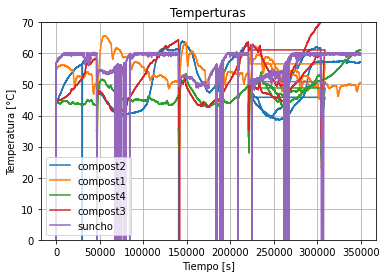

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

No handles with labels found to put in legend.


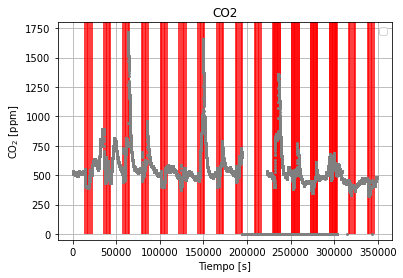

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(-50,1800)

plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

# Integración

In [11]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
#        inicio.append(pos[i])
        fin.append(pos[i + 1])

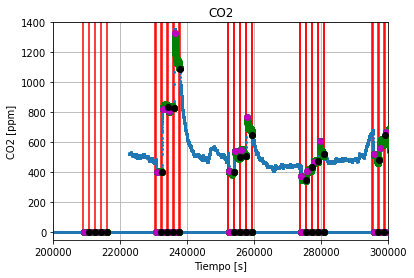

In [21]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

plt.xlim(200000,300000)
plt.ylim(-50,1400)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)
    
#plt.savefig(f"{PATH}/figuras/areas_pintadas-HASTA9.png")
plt.show()

In [14]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [15]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [16]:
promedio

[403.80161943319837,
 401.0688259109312,
 460.2024291497976,
 527.6437246963562,
 482.9068825910931,
 557.1417004048583,
 494.83805668016197,
 499.6275303643725,
 461.2631578947368,
 677.6801619433198,
 779.6275303643724,
 1509.6032388663969,
 482.20647773279353,
 537.1457489878543,
 608.8259109311741,
 829.82995951417,
 405.54655870445345,
 402.88663967611336,
 442.82995951417,
 551.3846153846154,
 403.4898785425101,
 437.834008097166,
 511.5991902834008,
 543.4696356275304,
 479.5668016194332,
 714.9352226720648,
 977.4291497975709,
 1298.2955465587045,
 415.7449392712551,
 522.8380566801619,
 598.1214574898786,
 720.6275303643724,
 462.30364372469637,
 514.1538461538462,
 629.5546558704453,
 684.2226720647774,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.02857142857142857,
 403.85483870967744,
 839.2177419354839,
 826.9516129032259,
 1153.1733870967741,
 401.18548387096774,
 507.616935483871,
 532.8427419

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [16]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [17]:
gramos(np.array(promedio))

array([ 2.86678521e-05,  2.31586587e-05,  2.81697340e-05,  7.51204096e-05,
        3.62675114e-05, -2.45382350e-08, -2.45382350e-08,  3.85277466e-05,
        4.89127753e-05,  4.87383700e-05,  7.85301852e-05,  3.16330620e-05,
        3.07680693e-05,  3.71229127e-05,  6.60375859e-05,  3.11488515e-05,
        3.52385041e-05,  4.03344641e-05,  5.72361126e-05,  2.22086214e-05,
        2.10143207e-05,  2.47238304e-05,  3.39545230e-05])